# CM 3070 Final Project

## CoCurricular Classification for University Advancement

Brian Van Steen 210182781

<a id='toc'></a>

### [1. Set Up](#setup)

### [2. Dataset](#dataset)

### [3. Visualizations](#visuals)

#### - [3.1 K-Means Clustering](#KMeans)

### [4. Binary Analysis](#binary)

#### - [4.1 Logistic Regression](#logreg)

#### - [4.2 Multi-Class Logistic Regression](#multilogreg)

#### - [4.3 Decision Tree](#dtree)

### [5. Categorical Analysis](#categorical)

#### - [5.1 Decision Tree](#catDT)

#### - [5.2 Naive Bayes](#catNB)

#### - [5.3 XGBoost](#catXGB)

### [6. Balanced Data](#balanced)

#### - [6.1 Datasets](#balancedData)

#### - [6.2 Random Forest Oversampled](#oversampledRF)

#### - [6.3 Random Forest Undersampled](#undersampledRF)

### [7. Deep Learning](#deep)

#### - [7.1 Manipulate into Tensors](#deep)

#### - [7.2 Baseline Model](#baseline)

#### - [7.3 Model Overfitting >> A](#overfitA)

#### - [7.3 Model Overfitting >> B](#overfitB)

#### - [7.4 Categorical Embedding](#embedding)

#### - [7.4 Categorical Model A](#embeddingA)

#### - [7.4 Categorical Model B](#embeddingB)

#### - [7.5 Model Tuning](#tuning)

<a id='setup'></a>
# 1. Set Up

This project is built using Anaconda JupyterLab, and a dedicated virtual environment was built for this notebook.

The following libraries were installed using 'pip' in the virtual environment terminal:

- NumPy
- Pandas
- Matplotlib
- Seaborn
- scikit-learn
- jupyterlab-git
- pyLDAvis
- TensorFlow
- openpyxl
- imblearn

Each of these libraries can now be imported for use.

In [1]:
# install all libraries

import numpy as np # Python library for working with arrays
from numpy.lib.function_base import vectorize
import pandas as pd # Python library for data processing, working with CSV files
import matplotlib.pyplot as plt # used for basic visualzations and graph creations
%matplotlib inline
import seaborn as sns # used for advanced visualizations and graph creations
import plotly.graph_objects as go

import nltk # import NLTK library for natural language processing
import gensim.downloader as gensim
import re # import regular expression library for text pre-processing
import tokenization # import tokenization library
import string # import string library for string pre-processing
from itertools import product
import copy

from sklearn.model_selection import train_test_split # use for splitting the data between training data and test data
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.preprocessing import PolynomialFeatures # for multivariate polynomial regression
from sklearn.tree import DecisionTreeClassifier # for cross-validation
from sklearn.tree import plot_tree # Decision Tree visual
import dtreeviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.linear_model import LogisticRegressionCV # logistic Regression
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes
from xgboost import XGBClassifier # xTreme Gradiant Boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans # K Means Clustering
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, precision_recall_curve, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from collections import Counter

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error # library for calculating metric
from sklearn.metrics import r2_score # library for calculating metric

import tensorflow as tf
import keras
from keras import backend as K
from keras import layers, models, optimizers
from keras.models import Sequential
from tensorflow.keras import preprocessing as kprocessing
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Embedding
from tensorflow.keras.models import Model, load_model
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import Callback
from keras.utils import plot_model
from IPython.display import Image

import gc
from datetime import datetime

# import pyLDAvis
# import pyLDAvis.lda_model
# pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# as there are 23 attributes, show all columns when examining all data
pd.set_option('display.max_columns', None)

In [3]:
w2v = gensim.load("word2vec-google-news-300")

_[Table of Contents](#toc)_

<a id='dataset'></a>
# 2. Dataset

The dataset is provided by a Canadian university, consisting of all students who completed a degree or are in the processing of completing a degree, and who participate in co-curricular activities.

This dataset is created in an Excel .xlsx format, and was pre-processed in Excel as part of initial exploratory data analysis (EDA). While examining the data, the following pre-processing was completed:

- there were students included that did not have any data except the first three columns, implying they were not actually a student, and so these rows were deleted
- multiple columns were deleted for fields that were not relevant to co-curricular or donation activities
- the data was anonymized
- the columns heading were re-named and shortened, for ease-of-use

To start, the co-curricular dataset will be imported.

In [4]:
# import university co-curricular dataset as DataFrame from .xlsx file
# this required the install of openpyxl from the virtual environment terminal
prelimDataset = pd.read_excel('..\\Preliminary\\preliminaryReportData.xlsx')

In [5]:
# initial summary view of the DataFrame, the preliminary report dataset
prelimDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60996 entries, 0 to 60995
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ClassifierCode       60996 non-null  object        
 1   ActivityYear         60996 non-null  object        
 2   ActivityCategory     60996 non-null  object        
 3   PostCode             55836 non-null  object        
 4   Constituent          60996 non-null  object        
 5   GraduationYear       56932 non-null  datetime64[ns]
 6   Faculty              56932 non-null  object        
 7   Degree               56932 non-null  object        
 8   Exclusions           2587 non-null   object        
 9   LifetimeDollars      15377 non-null  float64       
 10  LifetimeGifts        15377 non-null  float64       
 11  RFMRC                15409 non-null  float64       
 12  RFMFR                15409 non-null  float64       
 13  RFMMO                15409 non-

### 2.1 Preliminary Summary

After initial cleansing the data in Excel, the preliminary data set included 60,996 records that represent anonymized information for the university students.

The co-curricular data that will be analyzed in this study are in the second and third columns, AcitivityYear and ActivityCategory. These represent activities undertaken by students while studying at univeristy

The rest of the columns details information about the student, including a mailing postal code, faculty and degree completed, graduation year, and donation information.

An overview of the data is shown below.

In [6]:
prelimDataset.head()

ClassifierCode ActivityYear  \
0        6K223BZ    2010-2011   
1        KBZ43K4    2015-2016   
2        KBZ43K4    2014-2015   
3        KBZ43K4    2014-2015   
4        KKK0BZ0    2012-2013   

                                    ActivityCategory PostCode  \
0                   Education, Training and Outreach       K2   
1  Student Government and Student and Residence Life       K2   
2         Panels, Events, Committees and Conferences       K2   
3         Panels, Events, Committees and Conferences       K2   
4                     Academics, Awards and Research       K1   

               Constituent GraduationYear                         Faculty  \
0                  Alumnus     2008-10-24  Faculty:Arts & Social Sciences   
1  Alumnus Parent employee     2017-02-17          Faculty:Public Affairs   
2  Alumnus Parent employee     2017-02-17          Faculty:Public Affairs   
3  Alumnus Parent employee     2017-02-17          Faculty:Public Affairs   
4                  Alumnus     2016-05-27          Faculty:Public Affairs   

             Degree Exclusions  LifetimeDollars  LifetimeGifts  RFMRC  RFMFR  \
0  Bachelor of Arts        NaN              NaN            NaN    NaN    NaN   
1  Bachelor of Arts        NaN              NaN            NaN    NaN    NaN   
2  Bachelor of Arts        NaN              NaN            NaN    NaN    NaN   
3  Bachelor of Arts        NaN              NaN            NaN    NaN    NaN   
4  Bachelor of Arts        NaN              NaN            NaN    NaN    NaN   

   RFMMO  RFMTO FirstGiftYear  FirstAmount FirstArea FirstSolicitation  \
0    NaN    NaN           NaT          NaN       NaN               NaN   
1    NaN    NaN           NaT          NaN       NaN               NaN   
2    NaN    NaN           NaT          NaN       NaN               NaN   
3    NaN    NaN           NaT          NaN       NaN               NaN   
4    NaN    NaN           NaT          NaN       NaN               NaN   

  LargestGiftYear  LargestAmount LargestArea LargestSolicitation  
0             NaT            NaN         NaN                 NaN  
1             NaT            NaN         NaN                 NaN  
2             NaT            NaN         NaN                 NaN  
3             NaT            NaN         NaN                 NaN  
4             NaT            NaN         NaN                 NaN

### 2.2 Update

Based on additional analysis of the data, as well as the opportunity to append additional data, the dataset was updated and further **dataset type** pre-processing was applied.

In addition to the co-curricular activities, post graduation alumni activities were added to the dataset. Additionally, it was identified that an additional co-curricular field would be used that have previously been dropped.

Additionally, as each co-curricular activity undertaking by the student is represented by a single row, a student can appear in multiple rows. While this was useful for tracking the co-curricular activities, singular data for the student is then repeated. For example, in the overview above, student 'KBZ43K4' (annonymized) has three rows of co-curricular activities over two years (2014 - 2015, ad 2015 - 2016). But that student only has one postal code, graduation year, faculty, etc.

Therefore, the 60,996 needed to be collapsed based on the 'ClassifierCode' while retaining all the co-curricular data as well as the 'singular' datapoints. Based on research and given the data is in an Excel format, the best solution identified was using an Excel Power Query, to transform the data with a 'Group By' | 1 |. Using a Power Query script, all the rows were grouped using the ClassifiedCode, all co-curricular data was concatenated into a single columns (ActivityYear, ActivityCategory, and ActivityDepartment), and then the singular data were returned as single values using a 'max' evaluation.

In preparation for the Power Query script, further data cleansing was applied in Excel, since the Power Query effort was completed in Excel. This clenasing included rationalizing duplicated co-curricular values (i.e., equivalent values that used 'and' as well as '&') as well as anonymizing the ActivityDepartment co-curricular field.

Finally, all the concatenated data need to be split, to enable categorical encoding during the machine learning processes. While this can be easily done in pandas using string.split methods, this was completed in Excel since it was just a continuation of the Power Query process. In Excel, the 'Text to Column' function allows delimited data in one column to be split into multiple columns based on the delimiter.

As part of the research to identify a method to collapse the rows, it was attempted to identify a pandas method that would achieve the same result. While the functionality exists to collapsed rows based on an ID using pandas | 2 |, I could not identify a pandas method that would both concatenate multiple data points for some columns while also returning on a single value for singular data. A more recent dataframe library, Polars, may have additional functionality, but searches related to Polars did not return anything.

| 1 | https://community.fabric.microsoft.com/t5/Power-Query/Combining-Rows-based-on-the-ID-of-that-table/td-p/2374464

| 2 | https://stackoverflow.com/questions/70505040/pandas-collapse-rows-with-same-column-id-and-concatenate-multiple-columns-into

In [7]:
# import updated university co-curricular dataset as DataFrame from .xlsx file
studentDataset = pd.read_excel('..\\..\\Data\\coCurricularFinal.xlsx')

In [8]:
studentDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17714 entries, 0 to 17713
Data columns (total 66 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sort                 17714 non-null  object        
 1   RFMRC                17714 non-null  int64         
 2   RFMFR                17714 non-null  int64         
 3   RFMMO                17714 non-null  int64         
 4   RFMTO                17714 non-null  int64         
 5   Exclusions           707 non-null    object        
 6   Postal               17714 non-null  object        
 7   StartYear            17714 non-null  int64         
 8   Cat1                 17714 non-null  object        
 9   Cat2                 10712 non-null  object        
 10  Cat3                 7318 non-null   object        
 11  Cat4                 5314 non-null   object        
 12  Cat5                 4012 non-null   object        
 13  Cat6                 3115 non-n

### 2.3 Final Summary

Based on the updated dataset that was collapse, we now have the following records, as detailed above:

- 17,714 individual student records (versus 60,996 total records), implying each student on average participated in more than 3 co-curricular activities
- specific data for these 17,714 students, including PostalCode, StartYear and Constituent
- of these, there are 4,377 target labels for students that have made donations (RFMRC, RFMFR, RFMMO, RFMTO)
- the donation data for the 4,363 students that made donations (the discrepency is individuals who have donated through a company)
- the split co-curricular data is now captured in individual fields, Cat 1 - 16, and Dept 1 - 16
- the appended alumni activity data is also captured in individual fields, Activity 1 - 12

As shown above, all 17,714 students have a least one co-curricular activity shown in Cat1 and Dept1. But the number of students with greater number of activities drops off for the higher valued Cat and Dept fields.

Additionally, while a large number of alumni participated in post-graduation activities (10,445 for Activity1), the number decreases significantly for higher values Activity fields.

A summary of the dataset is shown below.

In [9]:
studentDataset.head()

Sort  RFMRC  RFMFR  RFMMO  RFMTO Exclusions Postal  StartYear  \
0  8g31t83     20     15      6     41        NaN     T2       2012   
1  8gX1t83      0      0      0      0        NaN     K1       2010   
2   ygz1t8     20     20      2     42        NaN     K1       2012   
3  6gZ1t83      0      0      0      0        NaN     J9       2010   
4  3g21t87      0      0      0      0        NaN     K2       2010   

                           Cat1                         Cat2  \
0              Academic Success             Academic Success   
1              Academic Success             Academic Success   
2              Academic Success             Academic Success   
3    Leadership and Development                          NaN   
4  Clubs/Societies/Associations   Leadership and Development   

                            Cat3                           Cat4  \
0       Athletics and Recreation       Athletics and Recreation   
1               Academic Success     Leadership and Development   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                            NaN                            NaN   
4                            NaN                            NaN   

                            Cat5                           Cat6  \
0       Athletics and Recreation       Athletics and Recreation   
1     Leadership and Development     Leadership and Development   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                            NaN                            NaN   
4                            NaN                            NaN   

                            Cat7                           Cat8  \
0       Athletics and Recreation         Education and Outreach   
1   Clubs/Societies/Associations   Clubs/Societies/Associations   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                            NaN                            NaN   
4                            NaN                            NaN   

                            Cat9                          Cat10  \
0          Student Life Programs                            NaN   
1   Clubs/Societies/Associations   Clubs/Societies/Associations   
2   Clubs/Societies/Associations               Competition Team   
3                            NaN                            NaN   
4                            NaN                            NaN   

                     Cat11            Cat12                   Cat13  \
0                      NaN              NaN                     NaN   
1   Education and Outreach   Special Events   Student Life Programs   
2         Competition Team   Special Events          Special Events   
3                      NaN              NaN                     NaN   
4                      NaN              NaN                     NaN   

             Cat14            Cat15                   Cat16  \
0              NaN              NaN                     NaN   
1              NaN              NaN                     NaN   
2   Special Events   Special Events   Student Life Programs   
3              NaN              NaN                     NaN   
4              NaN              NaN                     NaN   

                       Dept1                                  Dept2  \
0  Learning Support Services   University Administrative Department   
1  Learning Support Services              Learning Support Services   
2     Faculty of Engineering                 Faculty of Engineering   
3         Student Government                                    NaN   
4         School of Business                     School of Business   

                                   Dept3                    Dept4  \
0                              Athletics                Athletics   
1   University Administrative Department     Academic Improvement   
2                 Faculty of Engineering   Faculty of Engineering   
3                                    NaN                      NaN   
4   

### 2.4 Data Pre-processing

Based on the summary, a few fields require additional **data-oriented** preprocessing, as follows.

There are many 'NaN' values, since some students participated in many co-curricular activities, while most only participated in a few.

Additionally, there are 1,446 students who are currently studying at university, so data for graduation, factulty and degree at missing.

Finally, only students who have made a donation have RFM labels.

The only fields that should have numerical data are then shown with their statistical values.

In [10]:
studentDataset.describe()

RFMRC         RFMFR         RFMMO         RFMTO     StartYear  \
count  17714.000000  17714.000000  17714.000000  17714.000000  17714.000000   
mean       2.666987      2.937902      0.519702      6.124478   2015.039178   
min        0.000000      0.000000      0.000000      0.000000   2009.000000   
25%        0.000000      0.000000      0.000000      0.000000   2012.000000   
50%        0.000000      0.000000      0.000000      0.000000   2015.000000   
75%        0.000000      0.000000      0.000000      0.000000   2018.000000   
max       20.000000     20.000000     50.000000     70.000000   2023.000000   
std        6.214501      5.359001      1.053838     11.563263      3.444086   

                          Graduation  LifetimeDollars  LifetimeGifts  \
count                          16268     17714.000000   17714.000000   
mean   2018-04-09 14:55:26.481435904        61.817601       3.957435   
min              1981-11-15 00:00:00         0.000000       0.000000   
25%              2015-05-29 00:00:00         0.000000       0.000000   
50%              2018-06-01 00:00:00         0.000000       0.000000   
75%              2021-06-18 00:00:00         0.000000       0.000000   
max              2023-06-07 00:00:00     18724.000000     784.000000   
std                              NaN       301.921588      17.149681   

                           FirstYear   FirstAmount  \
count                           4363  17714.000000   
mean   2016-07-09 15:58:07.783635200     14.344981   
min              1985-04-15 00:00:00      0.000000   
25%              2013-04-09 00:00:00      0.000000   
50%              2017-03-13 00:00:00      0.000000   
75%              2020-01-16 12:00:00      0.000000   
max              2023-10-18 00:00:00   2250.000000   
std                              NaN     69.265709   

                         LargestYear  LargestAmount  
count                           4363   17714.000000  
mean   2017-12-15 23:20:23.653449728      24.266343  
min              2000-01-14 00:00:00       0.000000  
25%              2014-12-04 00:00:00       0.000000  
50%              2018-04-13 00:00:00       0.000000  
75%              2021-03-09 00:00:00       0.000000  
max              2023-10-18 00:00:00    6203.000000  
std                              NaN     144.244446

In [11]:
# checking for studentDataset cells with 'NaN' as value
studentDataset.isnull().sum()

Sort              0
RFMRC             0
RFMFR             0
RFMMO             0
RFMTO             0
              ...  
Activity8     17707
Activity9     17710
Activity10    17710
Activity11    17712
Activity12    17713
Length: 66, dtype: int64

In [12]:
# reset date-type columns using just the 'year' data from the existing datatime dtype columns, and set all as objects
studentDataset['StartYear'] = studentDataset['StartYear'].astype(object)
studentDataset['Graduation'] = pd.to_datetime(studentDataset['Graduation'], errors='coerce').dt.year.astype(object)
studentDataset['FirstYear'] = pd.to_datetime(studentDataset['FirstYear'], errors='coerce').dt.year.astype(object)
studentDataset['LargestYear'] = pd.to_datetime(studentDataset['LargestYear'], errors='coerce').dt.year.astype(object)

For the donation and RFM data, all 'NaN' values will be replaced with '0', as this accruately represents the situation.

In [13]:
studentDataset['RFMRC'].fillna(0, inplace = True)
studentDataset['RFMFR'].fillna(0, inplace = True)
studentDataset['RFMMO'].fillna(0, inplace = True)
studentDataset['RFMTO'].fillna(0, inplace = True)
studentDataset['LifetimeDollars'].fillna(0, inplace = True)
studentDataset['LifetimeGifts'].fillna(0, inplace = True)
studentDataset['FirstAmount'].fillna(0, inplace = True)
studentDataset['LargestAmount'].fillna(0, inplace = True)
studentDataset['LifetimeDollars'] = np.where(studentDataset['LifetimeDollars'] < 10, [0], studentDataset['LifetimeDollars'])

In [14]:
studentDataset.describe()

RFMRC         RFMFR         RFMMO         RFMTO  \
count  17714.000000  17714.000000  17714.000000  17714.000000   
mean       2.666987      2.937902      0.519702      6.124478   
std        6.214501      5.359001      1.053838     11.563263   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000   
max       20.000000     20.000000     50.000000     70.000000   

       LifetimeDollars  LifetimeGifts   FirstAmount  LargestAmount  
count     17714.000000   17714.000000  17714.000000   17714.000000  
mean         61.797204       3.957435     14.344981      24.266343  
std         301.925593      17.149681     69.265709     144.244446  
min           0.000000       0.000000      0.000000       0.000000  
25%           0.000000       0.000000      0.000000       0.000000  
50%           0.000000       0.000000      0.000000       0.000000  
75%           0.000000       0.000000      0.000000       0.000000  
max       18724.000000     784.000000   2250.000000    6203.000000

As shown in the statistical table above, there are now 8 fields of numerical data, with 4,377 records of the target lables relating to RFM and 4,363 records for donation amounts.

Some further data cleansing has been identified, as there are 173 records of total donations for less than $10. These are records where a student's payment account has a credit balance, and the student agrees to 'donate' the remaining balance to the university.

As this is more of a 'reactive' than 'proactive' donation, since the values are small in comparison to the 75% level, and since it is a small amount of records, these values will not be included in the analyses.

For all the categorical data, these 'NaN' values will need to be modified specific to the field.

In [15]:
studentDataset['Exclusions'].fillna('Contact', inplace = True) # for these students there are no 'exclusions' for not contacting them
studentDataset['Graduation'].fillna(2030, inplace = True) # for these students who are currently studying, a future year
studentDataset['Faculty'].fillna('NotGraduated', inplace = True) # for these students who are currently studying
studentDataset['Degree'].fillna('NotGraduated', inplace = True) # for these students who are currently studying

In [16]:
# before replacing all remaining 'NaN' value, concatenate all Category, Department and Activity values into individual columns, for TF-IDF analyses
cols1 = ['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat10', 'Cat11', 'Cat12', 'Cat13', 'Cat14', 'Cat15', 'Cat16']
cols2 = ['Dept1', 'Dept2', 'Dept3', 'Dept4', 'Dept5', 'Dept6', 'Dept7', 'Dept8', 'Dept9', 'Dept10', 'Dept10', 'Dept11', 'Dept12', 'Dept13', 'Dept14', 'Dept15', 'Dept16']
cols3 = ['Activity1', 'Activity2', 'Activity3', 'Activity4', 'Activity5', 'Activity6', 'Activity7', 'Activity8', 'Activity9', 'Activity10', 'Activity10', 'Activity11', 'Activity12']
studentDataset["AllCategories"] = studentDataset[cols1].apply(lambda x: ','.join(x.dropna()), axis=1)
studentDataset["AllDepartments"] = studentDataset[cols2].apply(lambda x: ','.join(x.dropna()), axis=1)
studentDataset["AllActivities"] = studentDataset[cols3].apply(lambda x: ','.join(x.dropna()), axis=1)

In [17]:
studentDataset.fillna("None", inplace = True) # replace all remaining 'NaN' values with 'None'

In [18]:
# confirming no 'NaN' values
studentDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17714 entries, 0 to 17713
Data columns (total 69 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sort                 17714 non-null  object 
 1   RFMRC                17714 non-null  int64  
 2   RFMFR                17714 non-null  int64  
 3   RFMMO                17714 non-null  int64  
 4   RFMTO                17714 non-null  int64  
 5   Exclusions           17714 non-null  object 
 6   Postal               17714 non-null  object 
 7   StartYear            17714 non-null  object 
 8   Cat1                 17714 non-null  object 
 9   Cat2                 17714 non-null  object 
 10  Cat3                 17714 non-null  object 
 11  Cat4                 17714 non-null  object 
 12  Cat5                 17714 non-null  object 
 13  Cat6                 17714 non-null  object 
 14  Cat7                 17714 non-null  object 
 15  Cat8                 17714 non-null 

In [19]:
studentDataset.head()

Sort  RFMRC  RFMFR  RFMMO  RFMTO Exclusions Postal StartYear  \
0  8g31t83     20     15      6     41    Contact     T2      2012   
1  8gX1t83      0      0      0      0    Contact     K1      2010   
2   ygz1t8     20     20      2     42    Contact     K1      2012   
3  6gZ1t83      0      0      0      0    Contact     J9      2010   
4  3g21t87      0      0      0      0    Contact     K2      2010   

                           Cat1                         Cat2  \
0              Academic Success             Academic Success   
1              Academic Success             Academic Success   
2              Academic Success             Academic Success   
3    Leadership and Development                         None   
4  Clubs/Societies/Associations   Leadership and Development   

                            Cat3                           Cat4  \
0       Athletics and Recreation       Athletics and Recreation   
1               Academic Success     Leadership and Development   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                           None                           None   
4                           None                           None   

                            Cat5                           Cat6  \
0       Athletics and Recreation       Athletics and Recreation   
1     Leadership and Development     Leadership and Development   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                           None                           None   
4                           None                           None   

                            Cat7                           Cat8  \
0       Athletics and Recreation         Education and Outreach   
1   Clubs/Societies/Associations   Clubs/Societies/Associations   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                           None                           None   
4                           None                           None   

                            Cat9                          Cat10  \
0          Student Life Programs                           None   
1   Clubs/Societies/Associations   Clubs/Societies/Associations   
2   Clubs/Societies/Associations               Competition Team   
3                           None                           None   
4                           None                           None   

                     Cat11            Cat12                   Cat13  \
0                     None             None                    None   
1   Education and Outreach   Special Events   Student Life Programs   
2         Competition Team   Special Events          Special Events   
3                     None             None                    None   
4                     None             None                    None   

             Cat14            Cat15                   Cat16  \
0             None             None                    None   
1             None             None                    None   
2   Special Events   Special Events   Student Life Programs   
3             None             None                    None   
4             None             None                    None   

                       Dept1                                  Dept2  \
0  Learning Support Services   University Administrative Department   
1  Learning Support Services              Learning Support Services   
2     Faculty of Engineering                 Faculty of Engineering   
3         Student Government                                   None   
4         School of Business                     School of Business   

                                   Dept3                    Dept4  \
0                              Athletics                Athletics   
1   University Administrative Department     Academic Improvement   
2                 Faculty of Engineering   Faculty of Engineering   
3                                   None                     None   
4         

In [20]:
studentDataset.loc[studentDataset['Graduation']==2030]

Sort  RFMRC  RFMFR  RFMMO  RFMTO Exclusions Postal StartYear  \
190     yg21t8pjp      0      0      0      0    Contact     K2      2013   
209    jgj1t878ZZ      0      0      0      0    Contact     M6      2019   
213     jg21t8489      0      0      0      0    Contact     N8      2020   
214    jgj1t85986      0      0      0      0    Contact     K2      2019   
286       8gW1t82      0      0      0      0    Contact     J0      2011   
...           ...    ...    ...    ...    ...        ...    ...       ...   
17561   jg21t88MW     20     10      2     32    Contact     N2      2019   
17562    cgZ1t825     20     10      2     32    Contact     ZZ      2019   
17563   cgj1t89Z8     20     10      2     32    Contact     K1      2019   
17564   cgj1t854Z     20     10      2     32    Contact     ZZ      2019   
17565    cg61t86Z     20     10      2     32    Contact     K2      2020   

                               Cat1                           Cat2  \
190    Clubs/Societies/Associations   Clubs/Societies/Associations   
209                Academic Success   Clubs/Societies/Associations   
213    Clubs/Societies/Associations   Clubs/Societies/Associations   
214                Academic Success               Academic Success   
286           Student Life Programs          Student Life Programs   
...                             ...                            ...   
17561         Student Life Programs                           None   
17562         Student Life Programs                           None   
17563         Student Life Programs                           None   
17564         Student Life Programs                           None   
17565         Student Life Programs                           None   

                                Cat3                           Cat4  \
190     Clubs/Societies/Associations   Clubs/Societies/Associations   
209     Clubs/Societies/Associations       Community Based Learning   
213     Clubs/Societies/Associations     Leadership and Development   
214     Clubs/Societies/Associations   Clubs/Societies/Associations   
286                             None                           None   
...                              ...                            ...   
17561                           None                           None   
17562                           None                           None   
17563                           None                           None   
17564                           None                           None   
17565                           None                           None   

                                Cat5                           Cat6  \
190     Clubs/Societies/Associations   Clubs/Societies/Associations   
209         Community Based Learning         Education and Outreach   
213       Leadership and Development     Leadership and Development   
214     Clubs/Societies/Associations       Athletics and Recreation   
286                             None                           None   
...                              ...                            ...   
17561                           None                           None   
17562                           None                           None   
17563                           None                           None   
17564                           None                           None   
17565                           None                           None   

                                Cat7                           Cat8  \
190     Clubs/Societies/Associations   Clubs/Societies/Associations   
209       Leadership and Development          Student Life Programs   
213               Student Government                           None   
214                 Competition Team                 Residence Life   
286                             None                           None   
...                              ...                            ...   
17561                           None        

### 2.6 Baseline Performance

For the dataset, there are 4,377 records with an RFMTO label greater than 0, out of a total of 17,714 records.

AT 24.7%, almost one-quarter of students who have made a donation, and therefore had RFM labels applied.

Nonetheless, the baseline accuracy would be much higher than this, as the dataset is imbalanced, with more than three-quarters of students who have not donated, and technically have an RFM Total label of '0'.

The baseline performance is calculated below.

In [21]:
test_copy = copy.copy(studentDataset['RFMTO'])
np.random.shuffle(test_copy)
match_array = np.array(studentDataset['RFMTO']) == np.array(test_copy)
match_array.mean()

0.5769447894320876

**Therefore, any classification model needs to perform better than random baseline of 57% accuracy to be considered an improvement, for using the model to make predictions that generalize with new data.**

_[Table of Contents](#toc)_

<a id='visuals'></a>
# 3. Visualizations

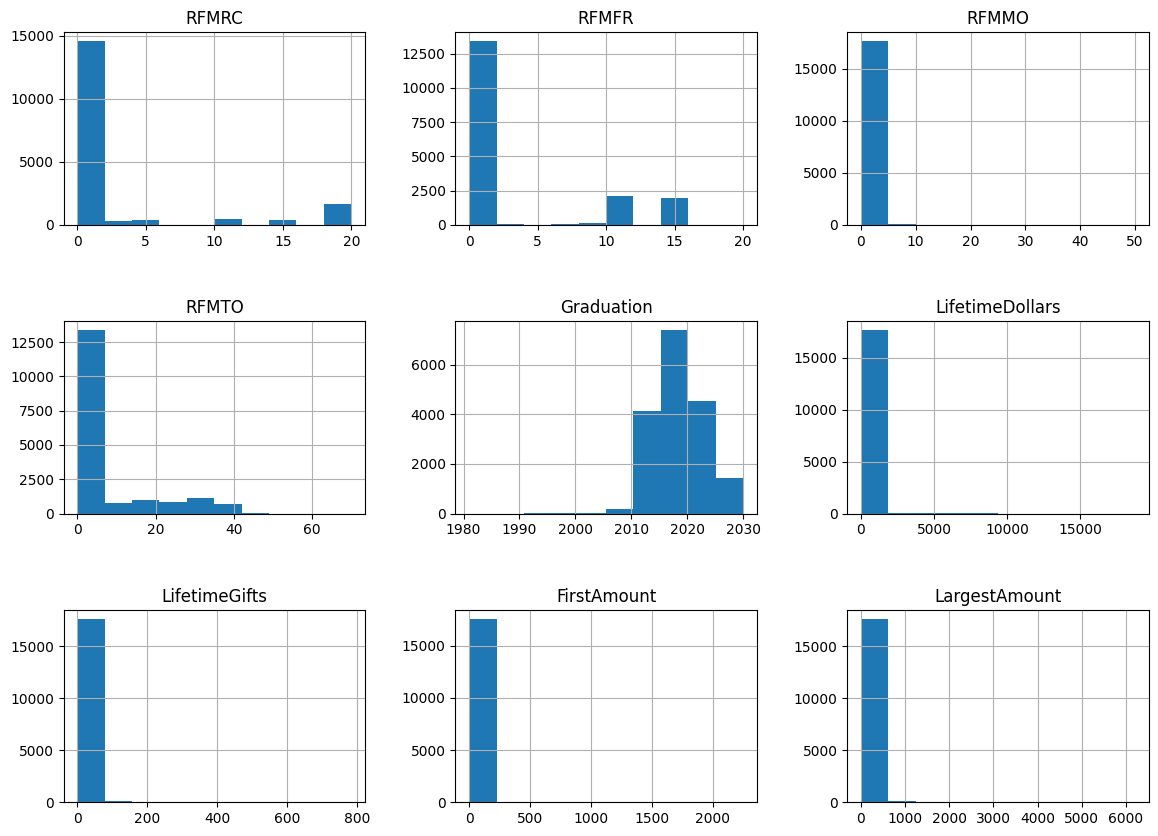

In [22]:
studentDataset.hist(figsize = (14, 10))
plt.subplots_adjust(hspace=0.5) 
plt.show()

The above histograms visually detail what the statistical table documented.

There is a lot of positive skew to the data for donation amounts, with a very small amount of high value outliers.

For the RFM score, aside from the Recency score that is shows many donations completed in the last year, again the data is positively skewed.

For all of these numerical values (except RFM Monetary), large standard deviations are calculated, as documented in the statistical table above.

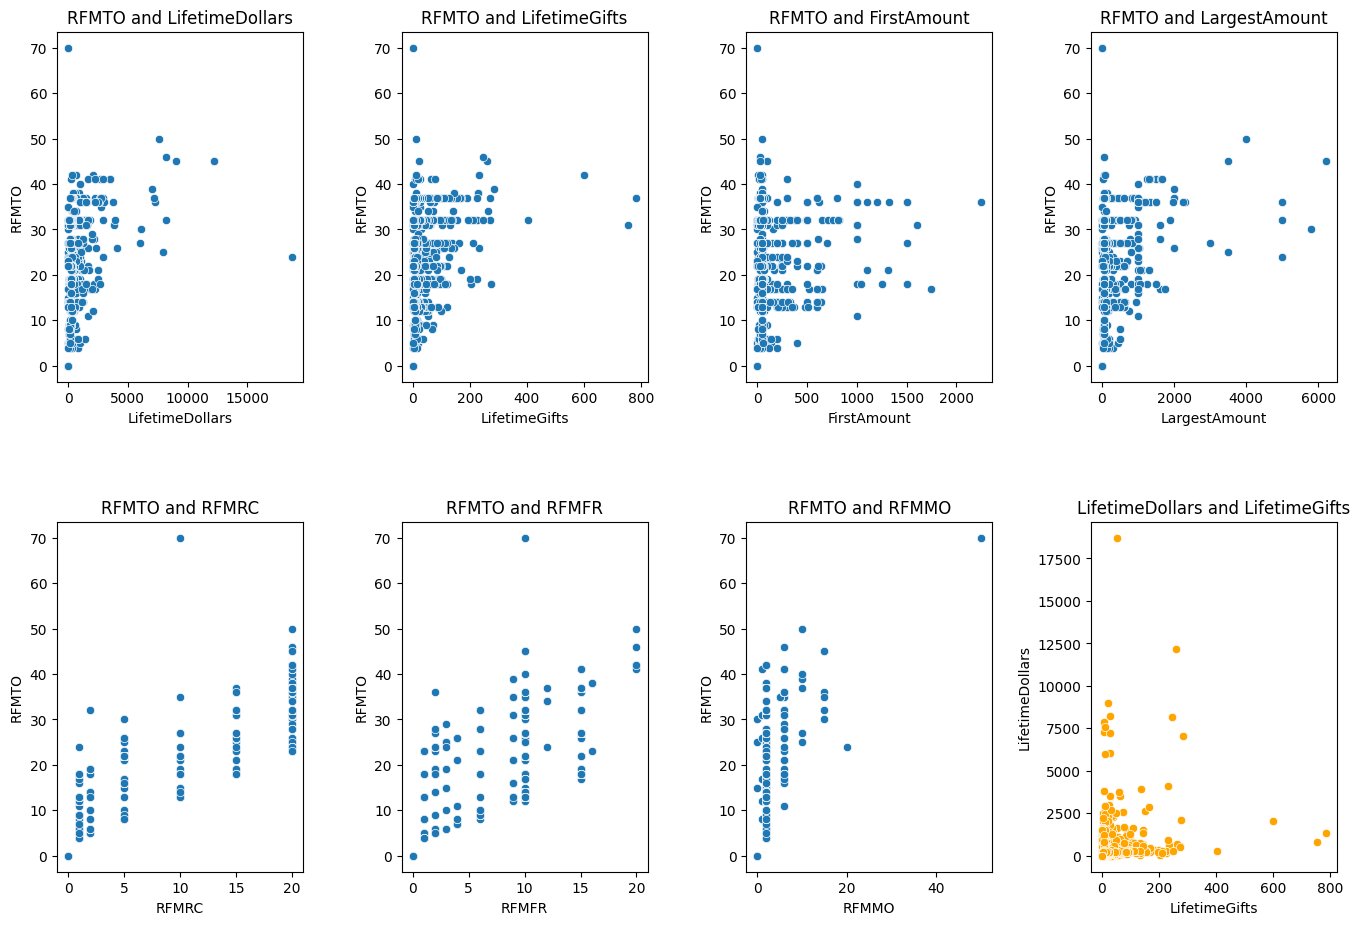

In [23]:
# scatter plots for 8 quantitative values

fig, axs = plt.subplots(2, 4, figsize=(16, 12)) # 8 scatterplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)

axs[0, 0].set_title('RFMTO and LifetimeDollars')
axs[0, 0].set_ylabel("RFMTO")
axs[0, 0].set_xlabel("LifetimeDollars")
sns.scatterplot(data = studentDataset, ax = axs[0, 0], x = "LifetimeDollars", y = "RFMTO")

axs[0, 1].set_title('RFMTO and LifetimeGifts')
axs[0, 1].set_ylabel("RFMTO")
axs[0, 1].set_xlabel("LifetimeGifts")
sns.scatterplot(data = studentDataset, ax = axs[0, 1], x = "LifetimeGifts", y = "RFMTO")

axs[0, 2].set_title("RFMTO and FirstAmount")
axs[0, 2].set_ylabel("RFMTO")
axs[0, 2].set_xlabel("FirstAmount")
sns.scatterplot(data = studentDataset, ax = axs[0, 2], x = "FirstAmount", y = "RFMTO")

axs[0, 3].set_title("RFMTO and LargestAmount")
axs[0, 3].set_ylabel("RFMTO")
axs[0, 3].set_xlabel("LargestAmount")
sns.scatterplot(data = studentDataset, ax = axs[0, 3], x = "LargestAmount", y = "RFMTO")

axs[1, 0].set_title("RFMTO and RFMRC")
axs[1, 0].set_ylabel("RFMTO")
axs[1, 0].set_xlabel("RFMRC")
sns.scatterplot(data = studentDataset, ax = axs[1, 0], x = "RFMRC", y = "RFMTO")

axs[1, 1].set_title("RFMTO and RFMFR")
axs[1, 1].set_ylabel("RFMTO")
axs[1, 1].set_xlabel("RFMFR")
sns.scatterplot(data = studentDataset, ax = axs[1, 1], x = "RFMFR", y = "RFMTO")

axs[1, 2].set_title("RFMTO and RFMMO")
axs[1, 2].set_ylabel("RFMTO")
axs[1, 2].set_xlabel("RFMMO")
sns.scatterplot(data = studentDataset, ax = axs[1, 2], x = "RFMMO", y = "RFMTO")

axs[1, 3].set_title("LifetimeDollars and LifetimeGifts")
axs[1, 3].set_ylabel("LifetimeDollars")
axs[1, 3].set_xlabel("LifetimeGifts")
sns.scatterplot(data = studentDataset, ax = axs[1, 3], c = 'orange', x = "LifetimeGifts", y = "LifetimeDollars")

plt.show()

### Pearson Correlation Coefficient

While the focus of this study is on classification, are part of basic EDA the Pearson Correlation Coefficients will be calculated for these numerical values, to evaluate linear correlation.

In [24]:
# calculate Peason correlation coefficient for Price, Year, Mileage and Owners
pearsoncorr = studentDataset[["RFMTO", "RFMRC", "RFMFR", "RFMMO", "LifetimeDollars", "LifetimeGifts", "FirstAmount", "LargestAmount"]].corr(method='pearson')
pearsoncorr

RFMTO     RFMRC     RFMFR     RFMMO  LifetimeDollars  \
RFMTO            1.000000  0.927611  0.921109  0.818505         0.364532   
RFMRC            0.927611  1.000000  0.713692  0.652312         0.282260   
RFMFR            0.921109  0.713692  1.000000  0.812996         0.343026   
RFMMO            0.818505  0.652312  0.812996  1.000000         0.589108   
LifetimeDollars  0.364532  0.282260  0.343026  0.589108         1.000000   
LifetimeGifts    0.418614  0.346310  0.427781  0.375601         0.335440   
FirstAmount      0.323275  0.253758  0.315850  0.444885         0.393890   
LargestAmount    0.296636  0.237962  0.253630  0.561940         0.868495   

                 LifetimeGifts  FirstAmount  LargestAmount  
RFMTO                 0.418614     0.323275       0.296636  
RFMRC                 0.346310     0.253758       0.237962  
RFMFR                 0.427781     0.315850       0.253630  
RFMMO                 0.375601     0.444885       0.561940  
LifetimeDollars       0.335440     0.393890       0.868495  
LifetimeGifts         1.000000     0.126920       0.183939  
FirstAmount           0.126920     1.000000       0.553722  
LargestAmount         0.183939     0.553722       1.000000

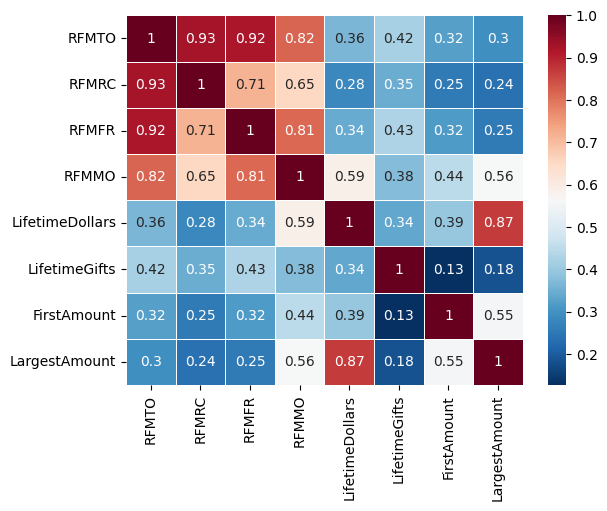

In [25]:
# visualize the correlation coefficient values from the table above
sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, yticklabels=pearsoncorr.columns, cmap='RdBu_r', annot=True, linewidth=0.5);

As shown in the red sections of the heat map, there is expected higher levels of correlation between RFM Monetary scores, lifetime dollars and large donation amounts.

_[Table of Contents](#toc)_

<a id='KMeans'></a>
### 3.1 K-Means Clustering

In [26]:
# numerical data for K-Means Clustering
X = studentDataset.loc[:, ["RFMTO", "RFMRC", "RFMFR", "RFMMO", "LifetimeDollars", "LifetimeGifts", "FirstAmount", "LargestAmount"]]
X.head()

RFMTO  RFMRC  RFMFR  RFMMO  LifetimeDollars  LifetimeGifts  FirstAmount  \
0     41     20     15      6          3525.00             63          300   
1      0      0      0      0             0.00              0            0   
2     42     20     20      2           654.75            234           50   
3      0      0      0      0             0.00              0            0   
4      0      0      0      0             0.00              0            0   

   LargestAmount  
0           1500  
1              0  
2             75  
3              0  
4              0

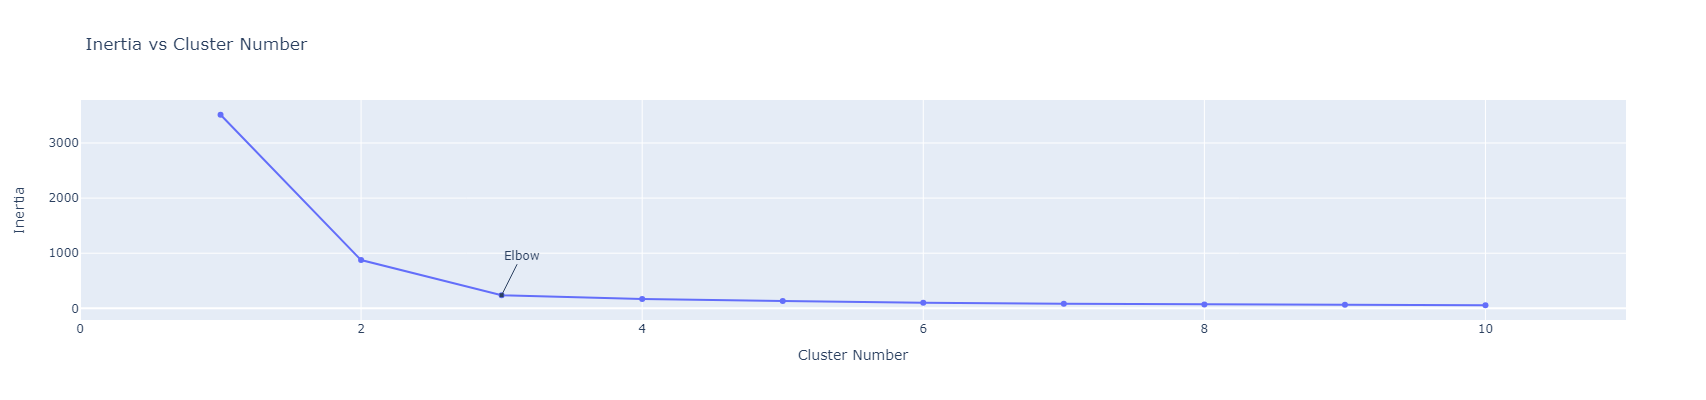

In [27]:
# determine the 'elbow', the optimal number of classes by measuring inertia
scaler = MinMaxScaler()
scaler.fit(X)
kmcX = scaler.transform(X)
inertia = []

for i in range(1,11):
    kmeans = KMeans(
        n_clusters = i, init = "k-means++",
        n_init = 10,
        tol = 1e-04, random_state = 42)
    kmeans.fit(kmcX)
    inertia.append(kmeans.inertia_)

fig = go.Figure(data=go.Scatter(x = np.arange(1,11), y = inertia))
fig.update_layout(title="Inertia vs Cluster Number",
                  xaxis = dict(range=[0,11], title = "Cluster Number"),
                  yaxis={'title':'Inertia'},
                  autosize=False, width=400, height=400,
                 annotations=[dict(
            x = 3,
            y = inertia[2],
            xref = "x",
            yref = "y",
            text = "Elbow",
            showarrow = True,
            arrowhead = 7,
            ax = 20,
            ay = -40
        )
    ])

In [28]:
# three clusters, based on 'elbow' calculation'
kmeans = KMeans(n_clusters = 3)
X["Cluster3"] = kmeans.fit_predict(X)
X["Cluster3"] = X["Cluster3"].astype("category")

X.head()

RFMTO  RFMRC  RFMFR  RFMMO  LifetimeDollars  LifetimeGifts  FirstAmount  \
0     41     20     15      6          3525.00             63          300   
1      0      0      0      0             0.00              0            0   
2     42     20     20      2           654.75            234           50   
3      0      0      0      0             0.00              0            0   
4      0      0      0      0             0.00              0            0   

   LargestAmount Cluster3  
0           1500        2  
1              0        0  
2             75        0  
3              0        0  
4              0        0

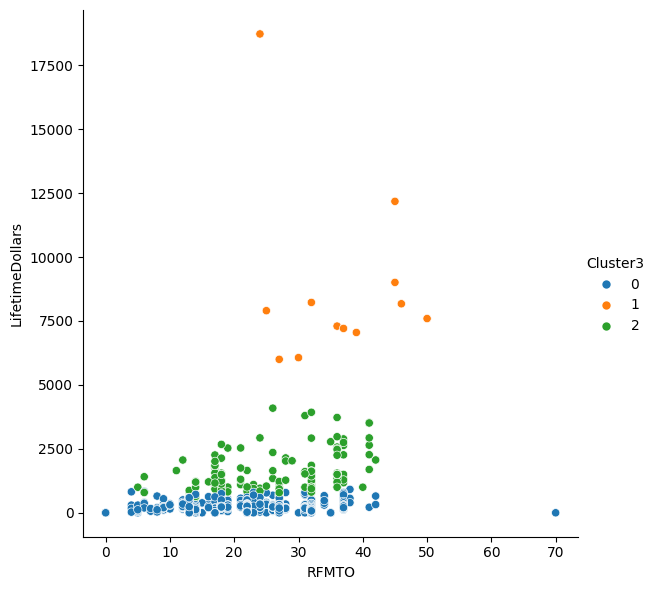

In [29]:
sns.relplot(x="RFMTO", y="LifetimeDollars", hue="Cluster3", data = X, height=6,)

In [30]:
# looking at 6 clusters
kmeans = KMeans(n_clusters = 6)
X["Cluster6"] = kmeans.fit_predict(X)
X["Cluster6"] = X["Cluster6"].astype("category")

X.head()

RFMTO  RFMRC  RFMFR  RFMMO  LifetimeDollars  LifetimeGifts  FirstAmount  \
0     41     20     15      6          3525.00             63          300   
1      0      0      0      0             0.00              0            0   
2     42     20     20      2           654.75            234           50   
3      0      0      0      0             0.00              0            0   
4      0      0      0      0             0.00              0            0   

   LargestAmount Cluster3 Cluster6  
0           1500        2        1  
1              0        0        0  
2             75        0        4  
3              0        0        0  
4              0        0        0

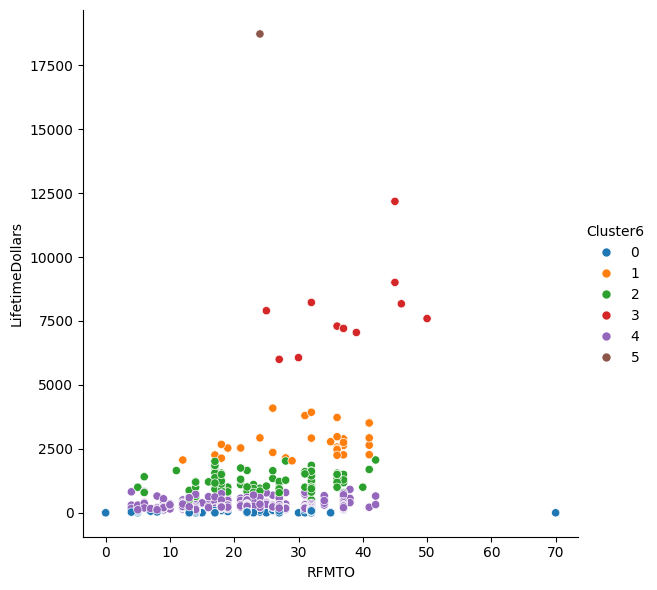

In [31]:
sns.relplot(x="RFMTO", y="LifetimeDollars", hue="Cluster6", data = X, height=6,)

_[Table of Contents](#toc)_

<a id='binary'></a>
# 4. Binary Analysis

In [32]:
# assign labels to RFM values
studentDataset['binaryRFMRC'] = np.select([studentDataset['RFMRC'] < 10], [0], 1).astype('int')
studentDataset['binaryRFMFR'] = np.select([studentDataset['RFMFR'] < 10], [0], 1).astype('int')
studentDataset['binaryRFMMO'] = np.select([studentDataset['RFMMO'] < 10], [0], 1).astype('int')
studentDataset['binaryRFMTO'] = np.select([studentDataset['RFMTO'] < 10], [0], 1).astype('int')
studentDataset['multiRFMRC'] = np.select([studentDataset['RFMRC'] < 5, studentDataset['RFMRC'].between(5, 10), studentDataset['RFMRC'].between(10, 14)], [0, 1, 2], 3)
studentDataset['multiRFMFR'] = np.select([studentDataset['RFMFR'] < 5, studentDataset['RFMFR'].between(5, 10), studentDataset['RFMFR'].between(10, 15), studentDataset['RFMFR'].between(15, 20)], [0, 1, 2, 3], 4).astype('int')
studentDataset['multiRFMMO'] = np.select([studentDataset['RFMMO'] < 10, studentDataset['RFMMO'].between(10, 20), studentDataset['RFMMO'].between(20, 30), studentDataset['RFMMO'].between(30, 40)], [0, 1, 2, 3], 4).astype('int')
studentDataset['multiRFMTO'] = np.select([studentDataset['RFMTO'] < 10, studentDataset['RFMTO'].between(10, 20), studentDataset['RFMTO'].between(20, 30), studentDataset['RFMTO'].between(30, 40)], [0, 1, 2, 3], 4).astype('int')

In [33]:
studentDataset.head()

Sort  RFMRC  RFMFR  RFMMO  RFMTO Exclusions Postal StartYear  \
0  8g31t83     20     15      6     41    Contact     T2      2012   
1  8gX1t83      0      0      0      0    Contact     K1      2010   
2   ygz1t8     20     20      2     42    Contact     K1      2012   
3  6gZ1t83      0      0      0      0    Contact     J9      2010   
4  3g21t87      0      0      0      0    Contact     K2      2010   

                           Cat1                         Cat2  \
0              Academic Success             Academic Success   
1              Academic Success             Academic Success   
2              Academic Success             Academic Success   
3    Leadership and Development                         None   
4  Clubs/Societies/Associations   Leadership and Development   

                            Cat3                           Cat4  \
0       Athletics and Recreation       Athletics and Recreation   
1               Academic Success     Leadership and Development   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                           None                           None   
4                           None                           None   

                            Cat5                           Cat6  \
0       Athletics and Recreation       Athletics and Recreation   
1     Leadership and Development     Leadership and Development   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                           None                           None   
4                           None                           None   

                            Cat7                           Cat8  \
0       Athletics and Recreation         Education and Outreach   
1   Clubs/Societies/Associations   Clubs/Societies/Associations   
2   Clubs/Societies/Associations   Clubs/Societies/Associations   
3                           None                           None   
4                           None                           None   

                            Cat9                          Cat10  \
0          Student Life Programs                           None   
1   Clubs/Societies/Associations   Clubs/Societies/Associations   
2   Clubs/Societies/Associations               Competition Team   
3                           None                           None   
4                           None                           None   

                     Cat11            Cat12                   Cat13  \
0                     None             None                    None   
1   Education and Outreach   Special Events   Student Life Programs   
2         Competition Team   Special Events          Special Events   
3                     None             None                    None   
4                     None             None                    None   

             Cat14            Cat15                   Cat16  \
0             None             None                    None   
1             None             None                    None   
2   Special Events   Special Events   Student Life Programs   
3             None             None                    None   
4             None             None                    None   

                       Dept1                                  Dept2  \
0  Learning Support Services   University Administrative Department   
1  Learning Support Services              Learning Support Services   
2     Faculty of Engineering                 Faculty of Engineering   
3         Student Government                                   None   
4         School of Business                     School of Business   

                                   Dept3                    Dept4  \
0                              Athletics                Athletics   
1   University Administrative Department     Academic Improvement   
2                 Faculty of Engineering   Faculty of Engineering   
3                                   None                     None   
4         

In [34]:
def preprocessTweets(text):

    '''
    Clean and join the text
    '''
    
    text = str(text).lower() # convert all text to lower case
    text = ' '.join(word for word in text.split(' ')) # split tweet, remove stop words, re-join words
    return text

In [35]:
# create new column of categoriesAnalysed, departmentsAnalysed, activitiesAnalysed
studentDataset['categoriesAnalysed'] = studentDataset['AllCategories'].apply(preprocessTweets)
studentDataset['departmentsAnalysed'] = studentDataset['AllDepartments'].apply(preprocessTweets)
studentDataset['activitiesAnalysed'] = studentDataset['AllActivities'].apply(preprocessTweets)

In [36]:
cols = ['categoriesAnalysed', 'departmentsAnalysed', 'activitiesAnalysed']
studentDataset['allAnalyzed'] = studentDataset[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [37]:
studentDataset['categoriesAnalysed'] = studentDataset['categoriesAnalysed'].apply(lambda x : x.replace(',',''))
studentDataset['departmentsAnalysed'] = studentDataset['departmentsAnalysed'].apply(lambda x : x.replace(',',''))
studentDataset['activitiesAnalysed'] = studentDataset['activitiesAnalysed'].apply(lambda x : x.replace(',',''))
studentDataset['allAnalyzed'] = studentDataset['allAnalyzed'].apply(lambda x : x.replace(',',''))

In [38]:
studentDataset['allAnalyzed']

0        academic success academic success athletics an...
1        academic success academic success academic suc...
2        academic success academic success clubs/societ...
3        leadership and development student government ...
4        clubs/societies/associations leadership and de...
                               ...                        
17709         volunteer/ambassadors school of linguistics 
17710         volunteer/ambassadors school of linguistics 
17711    volunteer/ambassadors school of public policy ...
17712    volunteer/ambassadors school of public policy ...
17713    volunteer/ambassadors school of public policy ...
Name: allAnalyzed, Length: 17714, dtype: object

In [39]:
studentDataset.sample(frac=1) # shuffle dataset

Sort  RFMRC  RFMFR  RFMMO  RFMTO      Exclusions Postal StartYear  \
4699   7gj1t84jp     15     10      2     27         Contact     K1      2012   
5986    9g71t8p2      0      0      0      0         Contact     L1      2015   
6423      7g71t8      1     15      2     18         Contact     H1      2009   
7066     9gW1t86      0      0      0      0         Contact     L6      2013   
7729   jgZ1t8Z94      0      0      0      0         Contact     N0      2017   
...          ...    ...    ...    ...    ...             ...    ...       ...   
1961      9g61t8      0      0      0      0         Contact     M4      2014   
1695     8g81t85      0      0      0      0  Do Not Contact     ZZ      2012   
13971    9g71t84      0      0      0      0         Contact     L1      2015   
15986    8g91t88      0      0      0      0         Contact     K1      2012   
14789    yg31t82      0      0      0      0         Contact     K1      2013   

                               Cat1                           Cat2  \
4699   Clubs/Societies/Associations                     Committees   
5986   Clubs/Societies/Associations   Clubs/Societies/Associations   
6423   Clubs/Societies/Associations   Clubs/Societies/Associations   
7066     Leadership and Development                           None   
7729               Academic Success          Student Life Programs   
...                             ...                            ...   
1961   Clubs/Societies/Associations                           None   
1695   Clubs/Societies/Associations                           None   
13971  Clubs/Societies/Associations         Education and Outreach   
15986        Education and Outreach         Education and Outreach   
14789  Clubs/Societies/Associations                           None   

                          Cat3                    Cat4  Cat5  Cat6  Cat7  \
4699                      None                    None  None  None  None   
5986    Education and Outreach                    None  None  None  None   
6423     Student Life Programs   Student Life Programs  None  None  None   
7066                      None                    None  None  None  None   
7729     Student Life Programs   Student Life Programs  None  None  None   
...                        ...                     ...   ...   ...   ...   
1961                      None                    None  None  None  None   
1695                      None                    None  None  None  None   
13971   Education and Outreach                    None  None  None  None   
15986                     None                    None  None  None  None   
14789                     None                    None  None  None  None   

       Cat8  Cat9 Cat10 Cat11 Cat12 Cat13 Cat14 Cat15 Cat16  \
4699   None  None  None  None  None  None  None  None  None   
5986   None  None  None  None  None  None  None  None  None   
6423   None  None  None  None  None  None  None  None  None   
7066   None  None  None  None  None  None  None  None  None   
7729   None  None  None  None  None  None  None  None  None   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   
1961   None  None  None  None  None  None  None  None  None   
1695   None  None  None  None  None  None  None  None  None   
13971  None  None  None  None  None  None  None  None  None   
15986  None  None  None  None  None  None  None  None  None   
14789  None  None  None  None  None  None  None  None  None   

                                      Dept1                        Dept2  \
4699                 Faculty of Engineering   School of Canadian Studies   
5986                     Student Government           Student Government   
6423                 Faculty of Engineering       Faculty of Engineering   
7066              Faculty of Public Affairs                         None   
7729   University Administrative Department       University Orientation   
...                                     ...                          ...

In [40]:
# create new dataframe with necessary columns for classification analyses
logregClassification = studentDataset[['Sort', 'binaryRFMRC', 'binaryRFMFR', 'binaryRFMMO', 'binaryRFMTO', 'multiRFMRC', 'multiRFMFR', 'multiRFMMO', 'multiRFMTO', 'categoriesAnalysed', 'departmentsAnalysed', 'activitiesAnalysed', 'allAnalyzed']].copy()

In [41]:
logregClassification.head()

Sort  binaryRFMRC  binaryRFMFR  binaryRFMMO  binaryRFMTO  multiRFMRC  \
0  8g31t83            1            1            0            1           3   
1  8gX1t83            0            0            0            0           0   
2   ygz1t8            1            1            0            1           3   
3  6gZ1t83            0            0            0            0           0   
4  3g21t87            0            0            0            0           0   

   multiRFMFR  multiRFMMO  multiRFMTO  \
0           2           0           4   
1           0           0           0   
2           3           0           4   
3           0           0           0   
4           0           0           0   

                                  categoriesAnalysed  \
0  academic success academic success athletics an...   
1  academic success academic success academic suc...   
2  academic success academic success clubs/societ...   
3                         leadership and development   
4  clubs/societies/associations leadership and de...   

                                 departmentsAnalysed  \
0  learning support services university administr...   
1  learning support services learning support ser...   
2  faculty of engineering faculty of engineering ...   
3                                 student government   
4              school of business school of business   

                                  activitiesAnalysed  \
0  alumni athletics volunteeralumni association e...   
1  alumni association executivealumni association...   
2      student volunteeralumni association executive   
3  alumni award winneralumni award winner winnera...   
4                         alumni award winner winner   

                                         allAnalyzed  
0  academic success academic success athletics an...  
1  academic success academic success academic suc...  
2  academic success academic success clubs/societ...  
3  leadership and development student government ...  
4  clubs/societies/associations leadership and de...

In [42]:
logregClassification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17714 entries, 0 to 17713
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sort                 17714 non-null  object
 1   binaryRFMRC          17714 non-null  int32 
 2   binaryRFMFR          17714 non-null  int32 
 3   binaryRFMMO          17714 non-null  int32 
 4   binaryRFMTO          17714 non-null  int32 
 5   multiRFMRC           17714 non-null  int32 
 6   multiRFMFR           17714 non-null  int32 
 7   multiRFMMO           17714 non-null  int32 
 8   multiRFMTO           17714 non-null  int32 
 9   categoriesAnalysed   17714 non-null  object
 10  departmentsAnalysed  17714 non-null  object
 11  activitiesAnalysed   17714 non-null  object
 12  allAnalyzed          17714 non-null  object
dtypes: int32(8), object(5)
memory usage: 1.2+ MB


In [43]:
logregClassification.sample(frac=1)

Sort  binaryRFMRC  binaryRFMFR  binaryRFMMO  binaryRFMTO  \
3558      9g21t83            0            0            0            0   
13630    8gv1t8jp            0            1            0            1   
11579     8g21t82            0            0            0            0   
10270    8g81t8jp            1            1            0            1   
15158     8g91t8Z            0            0            0            0   
...           ...          ...          ...          ...          ...   
3797      9g51t89            1            1            0            1   
11946     8g51t83            0            0            0            0   
15269  jgP1t8jp44            1            1            0            1   
11847   cg71t8jpZ            1            1            0            1   
14376     7gc1t83            0            0            0            0   

       multiRFMRC  multiRFMFR  multiRFMMO  multiRFMTO  \
3558            0           0           0           0   
13630           1           2           0           2   
11579           0           0           0           0   
10270           3           2           0           4   
15158           0           0           0           0   
...           ...         ...         ...         ...   
3797            3           1           0           3   
11946           0           0           0           0   
15269           3           2           0           3   
11847           3           1           0           3   
14376           0           0           0           0   

                                      categoriesAnalysed  \
3558   clubs/societies/associations leadership and de...   
13630                       clubs/societies/associations   
11579  academic success academic success academic suc...   
10270                           athletics and recreation   
15158    community based learning education and outreach   
...                                                  ...   
3797   academic success academic success athletics an...   
11946  committees committees clubs/societies/associat...   
15269             competition team student life programs   
11847                                   academic success   
14376                       clubs/societies/associations   

                                     departmentsAnalysed  \
3558               student government school of business   
13630                                 student government   
11579  academic improvement academic improvement acad...   
10270               university administrative department   
15158  university administrative department accessibi...   
...                                                  ...   
3797   university administrative department universit...   
11946  academic improvement academic improvement facu...   
15269  university student engineering society univers...   
11847                             university orientation   
14376                                 student government   

                    activitiesAnalysed  \
3558    alumni volunteerstudent sports   
13630                                    
11579                                    
10270                   student sports   
15158                                    
...                                ...   
3797   student residencestudent sports   
11946                                    
15269                                    
11847                                    
14376                                    

                                             allAnalyzed  
3558   clubs/societies/associations leadership and de...  
13630   clubs/societies/associations student government   
11579  academic success academic success academic suc...  
10270  athletics and recreation university administra...  
15158  community based learning education and outreac...  
...                                                  ...  
3797   academic success academic success athletics an...  
11946  committees committees clu

_[Table of Contents](#toc)_

<a id='logreg'></a>
## Logistic Regression

In [44]:
allAnalyzed = logregClassification['allAnalyzed'].tolist()
categoriesAnalysed = logregClassification['categoriesAnalysed'].tolist()
departmentsAnalysed = logregClassification['departmentsAnalysed'].tolist()
activitiesAnalysed = logregClassification['activitiesAnalysed'].tolist()

In [45]:
binaryRFMTO = logregClassification['binaryRFMTO']
binaryRFMRC = logregClassification['binaryRFMRC']
binaryRFMFR = logregClassification['binaryRFMFR']
binaryRFMMO = logregClassification['binaryRFMMO']

In [46]:
data = [categoriesAnalysed, departmentsAnalysed, activitiesAnalysed, allAnalyzed]
labels = [binaryRFMRC, binaryRFMFR, binaryRFMMO, binaryRFMTO]
dataType = ['categoriesAnalysed', 'departmentsAnalysed', 'activitiesAnalysed', 'allAnalyzed']
labelType = ['binaryRFMRC', 'binaryRFMFR', 'binaryRFMMO', 'binaryRFMTO']

In [47]:
# create dataframe as a product of the two lists, for adding the Logistic Regression accuracy results
LogRegDF = pd.DataFrame(product(dataType, labelType), columns = ['Co-Curricular', 'Labels'])

In [48]:
# function for calculating logistic regression

def binaryLogReg(xTrain, yTrain, xTest, yTest):
    
    '''
    paramter xTrain, yTrain, xTest, yTest
    initiate logistic regression model
    fit logistic regression model
    predict y, calculate accuracy
    return accuracy
    '''

    logRegression = LogisticRegressionCV(random_state = 42) # Hitchhiker's Guide to the Galaxy
    logRegression.fit(xTrain, yTrain)
    y_predLR = logRegression.predict(xTest)
    accLR = accuracy_score(yTest, y_predLR)
    return accLR

In [49]:
# calculate logistic regression accuracy for all combinations of co-curricular data and binary labels, appending resuts to list
binaryAccLR = []
for indexX, x in enumerate(data): # iterate through the four columns of co-curricular data (categoriesAnalysed, departmentsAnalysed, activitiesAnalysed, allAnalyzed)
    for indexY, y in enumerate(labels): # iterate through the four columns of labels (RFMRC, RFMFR, RFMMO, RFMTO)
        trainLabel = y[ : 14000] # split the training data, to be first 14,000 values
        testLabel = y[14000 : ] # split the test data, to be first 14,000 values
        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform(x) # vectorize the co-curricular data
        trainData = tfidf_matrix[ : 14000] # split the training data, to be first 14,000 values
        testData = tfidf_matrix[14000 : ] # split the test data, to be first 14,000 values
        xTrain, xTest, yTrain, yTest = train_test_split(trainData, trainLabel, test_size = 0.2, random_state = 42) # split the training data into training and validation
        le = LabelEncoder()
        y_trainLE = le.fit_transform(yTrain)
        accLR = binaryLogReg(xTrain, yTrain, xTest, yTest) # call binary logistic regression function defined above
        print(accLR)
        binaryAccLR.append(accLR) # append returned accuracy score from each binary logistic regression model

# binaryAccLR

0.8503571428571428
0.7632142857142857
0.9989285714285714
0.7496428571428572
0.8567857142857143
0.8175
0.9989285714285714
0.8110714285714286
0.85
0.7521428571428571
0.9989285714285714
0.7378571428571429
0.8667857142857143
0.8214285714285714
0.9989285714285714
0.8139285714285714


In [50]:
# add accuracy results to dataframe
LogRegDF['BinaryAccuracy'] = binaryAccLR
LogRegDF.sort_values('BinaryAccuracy', ascending=False)

Co-Curricular       Labels  BinaryAccuracy
2    categoriesAnalysed  binaryRFMMO        0.998929
6   departmentsAnalysed  binaryRFMMO        0.998929
10   activitiesAnalysed  binaryRFMMO        0.998929
14          allAnalyzed  binaryRFMMO        0.998929
12          allAnalyzed  binaryRFMRC        0.866786
4   departmentsAnalysed  binaryRFMRC        0.856786
0    categoriesAnalysed  binaryRFMRC        0.850357
8    activitiesAnalysed  binaryRFMRC        0.850000
13          allAnalyzed  binaryRFMFR        0.821429
5   departmentsAnalysed  binaryRFMFR        0.817500
15          allAnalyzed  binaryRFMTO        0.813929
7   departmentsAnalysed  binaryRFMTO        0.811071
1    categoriesAnalysed  binaryRFMFR        0.763214
9    activitiesAnalysed  binaryRFMFR        0.752143
3    categoriesAnalysed  binaryRFMTO        0.749643
11   activitiesAnalysed  binaryRFMTO        0.737857

In [51]:
# print(logregClassification['binaryRFMTO'].value_counts()[1])

Repeat the logistic regression process for the best results for the RFM Total value labels, using all co-curricular data.

In [52]:
trainLabel = binaryRFMTO[ : 14000] # split the training data, to be first 14,000 values
testLabel = binaryRFMTO[14000 : ] # split the test data, to be first 14,000 values
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(allAnalyzed) # vectorize the co-curricular data
trainData = tfidf_matrix[ : 14000] # split the training data, to be first 14,000 values
testData = tfidf_matrix[14000 : ] # split the test data, to be first 14,000 values
xTrain, xTest, yTrain, yTest = train_test_split(trainData, trainLabel, test_size = 0.2, random_state = 42) # split the training data into training and validation
le = LabelEncoder()
y_trainLE = le.fit_transform(yTrain)
logRegressionAll = LogisticRegressionCV(random_state = 42) # Hitchhiker's Guide to the Galaxy
logRegressionAll.fit(xTrain, yTrain)
y_predLR = logRegressionAll.predict(xTest)
accLR = accuracy_score(yTest, y_predLR)
print(accLR)

0.8139285714285714


In [53]:
tfidf_matrix[2]

<1x241 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [54]:
len(y_predLR)

2800

In [55]:
logRegressionAll.predict_proba(xTest)[:, 1]

array([0.1985346 , 0.34329665, 0.07239046, ..., 0.42110055, 0.35174727,
       0.09439014])

In [56]:
cmBLR = confusion_matrix(yTest, y_predLR)

print('Confusion matrix\n\n', cmBLR)
print('\nTrue Positives (TP) = ', cmBLR[0,0])
print('\nTrue Negatives (TN) = ', cmBLR[1,1])
print('\nFalse Positives (FP) = ', cmBLR[0,1])
print('\nFalse Negatives (FN) = ', cmBLR[1,0])

Confusion matrix

 [[2012   32]
 [ 489  267]]

True Positives (TP) =  2012

True Negatives (TN) =  267

False Positives (FP) =  32

False Negatives (FN) =  489


<Axes: >

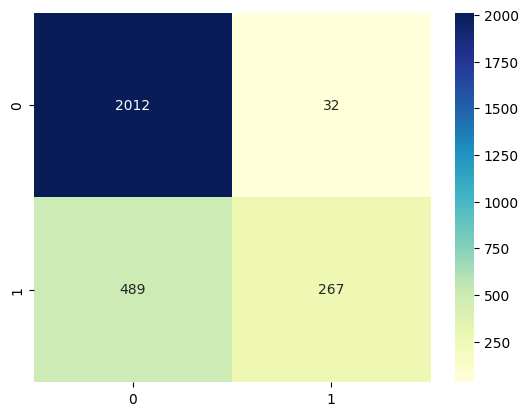

In [57]:
sns.heatmap(cmBLR, annot=True, fmt='d', cmap='YlGnBu')

In [58]:
print(classification_report(yTest, y_predLR))

              precision    recall  f1-score   support

           0       0.80      0.98      0.89      2044
           1       0.89      0.35      0.51       756

    accuracy                           0.81      2800
   macro avg       0.85      0.67      0.70      2800
weighted avg       0.83      0.81      0.78      2800



In [59]:
BLRreport = classification_report(yTest, y_predLR, output_dict=True)
# print(BLRreport)

In [60]:
precisionBLRweighted = BLRreport['weighted avg']['precision']
recallBLRweighted = BLRreport['weighted avg']['recall']
f1scoreBLRweighted = BLRreport['weighted avg']['f1-score']
errorBLR = 1 - accLR

In [61]:
# print classification accuracy
print('Classification accuracy: {0:0.4f}'.format(accLR))

# print classification error
print('Classification error: {0:0.4f}'.format(errorBLR))

precisionBLR  = precision_score(yTest, y_predLR)
recallBLR  = recall_score(yTest, y_predLR)

# print precision score
# precisionBLR = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precisionBLR))

# print recall score
# recallBLR = TP / float(TP + FN)
print('Recall: {0:0.4f}'.format(recallBLR))

# print specificity
# specificityBLR = TN / (TN + FP)
# print('Specificity : {0:0.4f}'.format(specificityBLR))

Classification accuracy: 0.8139
Classification error: 0.1861
Precision: 0.8930
Recall: 0.3532


In [62]:
print(np.unique(y_predLR))
maeLR = mean_absolute_error(y_predLR, yTest)

[0 1]


_[Table of Contents](#toc)_

<a id='multilogreg'></a>
## Multi-Class Logistic Regression

In [63]:
multiRFMTO = logregClassification['multiRFMTO']
multiRFMRC = logregClassification['multiRFMRC']
multiRFMFR = logregClassification['multiRFMFR']
multiRFMMO = logregClassification['multiRFMMO']

In [64]:
mData = [categoriesAnalysed, departmentsAnalysed, activitiesAnalysed, allAnalyzed]
mLabels = [multiRFMRC, multiRFMFR, multiRFMMO, multiRFMTO]
mDataType = ['categoriesAnalysed', 'departmentsAnalysed', 'activitiesAnalysed', 'allAnalyzed']
mLabelType = ['multiRFMRC', 'multiRFMFR', 'multiRFMMO', 'multiRFMTO']

In [65]:
# function for calculating multi-class logistic regression

'''
paramter xTrain, yTrain, xTest, yTest
initiate logistic regression model
fit logistic regression model
predict y, calculate accuracy
return accuracy
'''

def multiLogReg(xTrain, yTrain, xTest, yTest):
    multiLogRegression = LogisticRegression(multi_class="multinomial", random_state = 42) # Hitchhiker's Guide to the Galaxy
    multiLogRegression.fit(xTrain, yTrain)
    y_predLR = multiLogRegression.predict(xTest)
    accMLR = accuracy_score(yTest, y_predLR)
    return accMLR

In [66]:
# calculate logistic regression accuracy for all combinations of co-curricular data and binary labels, appending resuts to list
multiAccLR = []
for indexX, x in enumerate(mData): # iterate through the four columns of co-curricular data (categoriesAnalysed, departmentsAnalysed, activitiesAnalysed, allAnalyzed)
    for indexY, y in enumerate(mLabels): # iterate through the four columns of labels (RFMRC, RFMFR, RFMMO, RFMTO)
        trainLabel = y[ : 14000] # split the training data, to be first 14,000 values
        testLabel = y[14000 : ] # split the test data, to be first 14,000 values
        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform(x) # vectorize the co-curricular data
        trainData = tfidf_matrix[ : 14000] # split the training data, to be first 14,000 values
        testData = tfidf_matrix[14000 : ] # split the test data, to be first 14,000 values
        xTrain, xTest, yTrain, yTest = train_test_split(trainData, trainLabel, test_size = 0.2, random_state = 42) # split the training data into training and validation
        le = LabelEncoder()
        y_trainLE = le.fit_transform(yTrain)
        accMLR = multiLogReg(xTrain, yTrain, xTest, yTest) # call binary logistic regression function defined above
        print(accMLR)
        multiAccLR.append(accMLR) # append returned accuracy score from eac binary logistic regression model

# multiAccLR

0.8278571428571428
0.7485714285714286
0.9989285714285714
0.7367857142857143
0.8325
0.7853571428571429
0.9989285714285714
0.765
0.8289285714285715
0.7396428571428572
0.9989285714285714
0.7310714285714286
0.8367857142857142
0.7903571428571429
0.9989285714285714
0.7717857142857143


In [67]:
LogRegDF['multiLabels'] = LogRegDF['Labels']
LogRegDF['multiLabels'] = LogRegDF['multiLabels'].str.replace('binary', 'multi')

In [68]:
# add accuracy results to dataframe
LogRegDF['MultiNomialAccuracy'] = multiAccLR
LogRegDF.sort_values('BinaryAccuracy', ascending=False)

Co-Curricular       Labels  BinaryAccuracy multiLabels  \
2    categoriesAnalysed  binaryRFMMO        0.998929  multiRFMMO   
6   departmentsAnalysed  binaryRFMMO        0.998929  multiRFMMO   
10   activitiesAnalysed  binaryRFMMO        0.998929  multiRFMMO   
14          allAnalyzed  binaryRFMMO        0.998929  multiRFMMO   
12          allAnalyzed  binaryRFMRC        0.866786  multiRFMRC   
4   departmentsAnalysed  binaryRFMRC        0.856786  multiRFMRC   
0    categoriesAnalysed  binaryRFMRC        0.850357  multiRFMRC   
8    activitiesAnalysed  binaryRFMRC        0.850000  multiRFMRC   
13          allAnalyzed  binaryRFMFR        0.821429  multiRFMFR   
5   departmentsAnalysed  binaryRFMFR        0.817500  multiRFMFR   
15          allAnalyzed  binaryRFMTO        0.813929  multiRFMTO   
7   departmentsAnalysed  binaryRFMTO        0.811071  multiRFMTO   
1    categoriesAnalysed  binaryRFMFR        0.763214  multiRFMFR   
9    activitiesAnalysed  binaryRFMFR        0.752143  multiRFMFR   
3    categoriesAnalysed  binaryRFMTO        0.749643  multiRFMTO   
11   activitiesAnalysed  binaryRFMTO        0.737857  multiRFMTO   

    MultiNomialAccuracy  
2              0.998929  
6              0.998929  
10             0.998929  
14             0.998929  
12             0.836786  
4              0.832500  
0              0.827857  
8              0.828929  
13             0.790357  
5              0.785357  
15             0.771786  
7              0.765000  
1              0.748571  
9              0.739643  
3              0.736786  
11             0.731071

In [69]:
mData = allAnalyzed
mLabels = multiRFMTO
trainLabel = mLabels[ : 14000] # split the training data, to be first 14,000 values
testLabel = mLabels[14000 : ] # split the test data, to be first 14,000 values
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(mData) # vectorize the co-curricular data
trainData = tfidf_matrix[ : 14000] # split the training data, to be first 14,000 values
testData = tfidf_matrix[14000 : ] # split the test data, to be first 14,000 values
xTrain, xTest, yTrain, yTest = train_test_split(trainData, trainLabel, test_size = 0.2, random_state = 42) # split the training data into training and validation
le = LabelEncoder()
y_trainLE = le.fit_transform(yTrain)
multiLogRegression = LogisticRegression(multi_class="multinomial", random_state = 42) # Hitchhiker's Guide to the Galaxy
multiLogRegression.fit(xTrain, yTrain)
y_predMLR = multiLogRegression.predict(xTest)
accMLR = accuracy_score(yTest, y_predMLR)

In [70]:
accMLR

0.7717857142857143

In [71]:
len(y_predMLR)

2800

In [72]:
cmMLR = confusion_matrix(yTest, y_predMLR)

print('Confusion matrix\n\n', cmMLR)

Confusion matrix

 [[2019    9    0   16    0]
 [ 215   53    1   45    0]
 [ 114   10    0   25    0]
 [ 174   28    0   89    0]
 [   1    1    0    0    0]]


<Axes: >

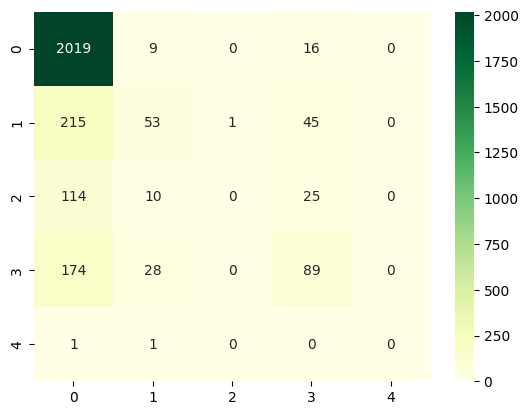

In [73]:
sns.heatmap(cmMLR, annot=True, fmt='d', cmap='YlGn')

In [74]:
print(classification_report(yTest, y_predMLR))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      2044
           1       0.52      0.17      0.26       314
           2       0.00      0.00      0.00       149
           3       0.51      0.31      0.38       291
           4       0.00      0.00      0.00         2

    accuracy                           0.77      2800
   macro avg       0.37      0.29      0.30      2800
weighted avg       0.70      0.77      0.71      2800



In [75]:
MLRreport = classification_report(yTest, y_predMLR, output_dict=True)
# MLRreport

In [76]:
# recallMLR = np.diag(cmMLR) / np.sum(cmMLR, axis = 1)
# precisionMLR = np.diag(cmMLR) / np.sum(cmMLR, axis = 0)
# recallMLR = np.nanmean(recallMLR)
# precisionMLR = np.nanmean(precisionMLR)

In [77]:
# # print classification accuracy
# print('Classification accuracy: {0:0.4f}'.format(accMLR))

# # print classification error
# print('Classification error: {0:0.4f}'.format(errorMLR))

# # print precision score
# print('Precision: ', precisionMLR)

# # print recall score
# print('Recall: ', recallMLR)

In [78]:
errorMLR = 1 - accMLR
precisionMLRweighted = MLRreport['weighted avg']['precision']
recallMLRweighted = MLRreport['weighted avg']['recall']
f1scoreMLRweighted = MLRreport['weighted avg']['f1-score']

In [79]:
print(np.unique(y_predMLR))
maeMLR = mean_absolute_error(y_predMLR, yTest)

[0 1 2 3]


In [80]:
# # print classification accuracy
# accuracyMLR = (TP + TN) / float(TP + TN + FP + FN)
# print('Classification accuracy : {0:0.4f}'.format(accuracyMLR))

# # print classification error
# errorMLR = (FP + FN) / float(TP + TN + FP + FN)
# print('Classification error : {0:0.4f}'.format(errorMLR))

# # print precision score
# precisionMLR = TP / float(TP + FP)
# print('Precision : {0:0.4f}'.format(precisionMLR))

# # print recall score
# recallMLR = TP / float(TP + FN)
# print('Recall or Sensitivity : {0:0.4f}'.format(recallMLR))

# # print specificity
# specificityMLR = TN / (TN + FP)
# print('Specificity : {0:0.4f}'.format(specificityMLR))

In [81]:
rowDict = [{'Data':'Imbalanced', 'Algorithm':'Univariate LogisticRegression', 'Co-Curricular':'allAnalyzed', 'Label':'binaryRFMTO', 'Prediction Accuracy':accLR , 'Error':errorBLR, 'Weighted Precision':precisionBLRweighted, 'Weighted Recall':recallBLRweighted, 'Weighted f1-Score':f1scoreBLRweighted, 'Mean Absolute Error':maeLR},
           {'Data':'Imbalanced', 'Algorithm':'Multinomial LogisticRegression','Co-Curricular':'allAnalyzed', 'Label':'multiRFMTO', 'Prediction Accuracy':accMLR , 'Error':errorMLR, 'Weighted Precision':precisionMLRweighted, 'Weighted Recall':recallMLRweighted, 'Weighted f1-Score':f1scoreMLRweighted, 'Mean Absolute Error':maeMLR}]
logReg = pd.DataFrame.from_dict(rowDict)
logReg

Data                       Algorithm Co-Curricular        Label  \
0  Imbalanced   Univariate LogisticRegression   allAnalyzed  binaryRFMTO   
1  Imbalanced  Multinomial LogisticRegression   allAnalyzed   multiRFMTO   

   Prediction Accuracy     Error  Weighted Precision  Weighted Recall  \
0             0.813929  0.186071            0.828373         0.813929   
1             0.771786  0.228214            0.695876         0.771786   

   Weighted f1-Score  Mean Absolute Error  
0           0.782983             0.186071  
1           0.713785             0.432500

### Summary

For a simple start, logistic regression analysed the four sets of co-curricular values (categories, departments, activities and all), for the four sets of labels (Recency, Frequency, Monetary and Total).

As shown in the table above, the results are very high for Monetary scores, which is expected given that these students have made donations. The Recency scores are also high, and not unexpected, given that the data is mostly recent, and students are more likely to give recently.

**The most relevant analysis is therefore 'allAnalyzed' with RFMTO, which achieved a multinomial accuracy score of 0.771.**

But this analysis shows that the focus can be on classification of the 'allAnalyzed' data, with the target labels to be the RFM Total values.

_[Table of Contents](#toc)_

<a id='dtree'></a>
## Decision Tree

In [82]:
dtClassification = pd.DataFrame(columns = ['Algorithm', 'Label', 'Accuracy'])

In [83]:
# create new dataframe for the classification analysis
studentClassification = studentDataset.copy()

In [84]:
studentClassification.drop(['StartYear', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'Cat13', 'Cat14', 'Cat15', 'Cat16', 'Dept1', 'Dept2', 'Dept3', 'Dept4', 'Dept5', 'Dept6', 'Dept7', 'Dept8', 'Dept9', 'Dept10', 'Dept11', 'Dept12', 'Dept13', 'Dept14', 'Dept15', 'Dept16', 'LifetimeDollars', 'LifetimeGifts', 'FirstAmount', 'LargestAmount', 'Activity1', 'Activity2', 'Activity3', 'Activity4', 'Activity5', 'Activity6', 'Activity7', 'Activity8', 'Activity9', 'Activity10', 'Activity11', 'Activity12', 'AllCategories', 'AllDepartments', 'AllActivities', 'binaryRFMRC', 'binaryRFMFR', 'binaryRFMMO', 'binaryRFMTO', 'multiRFMRC', 'multiRFMFR', 'multiRFMMO', 'multiRFMTO'], axis = 1, inplace = True)

In [85]:
# create bins for RFMTO labels
Mbins = 10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Mlabels = []
for i in range(1, Mbins):
    Mlabels.append(i)
    studentClassification['binlabelRFMTO'] = pd.cut(studentClassification['RFMTO'], bins = i, labels = Mlabels)

In [86]:
studentClassification

Sort  RFMRC  RFMFR  RFMMO  RFMTO Exclusions Postal  \
0        8g31t83     20     15      6     41    Contact     T2   
1        8gX1t83      0      0      0      0    Contact     K1   
2         ygz1t8     20     20      2     42    Contact     K1   
3        6gZ1t83      0      0      0      0    Contact     J9   
4        3g21t87      0      0      0      0    Contact     K2   
...          ...    ...    ...    ...    ...        ...    ...   
17709    9g91t88      0      0      0      0    Contact     K1   
17710  jgj1t8Z3f      0      0      0      0    Contact     K1   
17711  jgZ1t8454      0      0      0      0    Contact     S7   
17712  jgZ1t8693      0      0      0      0    Contact     N0   
17713  jgZ1t8yr7      0      0      0      0    Contact     J8   

            Constituent  Graduation                 Faculty  \
0               Alumnus      2017.0          Public Affairs   
1      Alumnus Employee      2014.0          Public Affairs   
2               Alumnus      2017.0    Engineering & Design   
3               Alumnus      2009.0      School of Business   
4               Alumnus      2011.0      School of Business   
...                 ...         ...                     ...   
17709           Alumnus      2019.0  Arts & Social Sciences   
17710           Alumnus      2020.0  Arts & Social Sciences   
17711           Alumnus      2019.0          Public Affairs   
17712           Alumnus      2019.0          Public Affairs   
17713           Alumnus      2019.0          Public Affairs   

                        Degree FirstYear                     FirstArea  \
0             Bachelor of Arts    2017.0                     Athletics   
1             Bachelor of Arts      None                          None   
2      Bachelor of Engineering    2013.0  Faculty:Engineering & Design   
3         Bachelor of Commerce      None                          None   
4         Bachelor of Commerce      None                          None   
...                        ...       ...                           ...   
17709                 Master's      None                          None   
17710                 Master's      None                          None   
17711                 Master's      None                          None   
17712                 Master's      None                          None   
17713                 Master's      None                          None   

      FirstSolicitation LargestYear      LargestArea LargestSolicitation  \
0                 Email      2021.0        Athletics               Email   
1                  None        None             None                None   
2                  Levy      2019.0  University Wide               Email   
3                  None        None             None                None   
4                  None        None             None                None   
...                 ...         ...              ...                 ...   
17709              None        None             None                None   
17710              None        None             None                None   
17711              None        None             None                None   
17712              None        None             None                None   
17713              None        None             None                None   

                                      categoriesAnalysed  \
0      academic success academic success athletics an...   
1      academic success academic success academic suc...   
2      academic success academic success clubs/societ...   
3                             leadership and development   
4      clubs/societies/associations leadership and de...   
...                                                  ...   
17709                              volunteer/ambassadors   
17710                              volunteer/ambassadors   
17711                              volunteer/ambassadors   
17712                              volunteer/ambassadors   


In [87]:
unique_binlabelRFMTO = studentClassification['binlabelRFMTO'].unique()
unique_binlabelRFMTO
# unique = studentClassification['Faculty'].unique()
# len(unique)

[6, 1, 5, 2, 3, 4, 9, 7]
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [88]:
# unique_RFMTO = studentClassification['RFMTO'].unique()
# unique_RFMTO

In [89]:
# len(unique_RFMTO)

In [90]:
# len(unique_binlabelRFMTO)

In [91]:
allAnalyzed = studentClassification['allAnalyzed'].tolist()
categoriesAnalysed = studentClassification['categoriesAnalysed'].tolist()
departmentsAnalysed = studentClassification['departmentsAnalysed'].tolist()
activitiesAnalysed = studentClassification['activitiesAnalysed'].tolist()
binlabelRFMTO = studentClassification['binlabelRFMTO']
data = [categoriesAnalysed, departmentsAnalysed, activitiesAnalysed, allAnalyzed]
dataType = ['categoriesAnalysed', 'departmentsAnalysed', 'activitiesAnalysed', 'allAnalyzed']

In [92]:
# function for calculating Decision Tree

def dTree(xTrain, yTrain, xTest, yTest):
    
    '''
    paramters xTrain, yTrain, xTest, yTest
    initiate Decision Tree model
    fit Decision Tree model
    predict y, calculate accuracy
    return accuracy
    '''

    dtCLF = DecisionTreeClassifier(criterion = 'entropy', random_state = 42) # Hitchhiker's Guide to the Galaxy
    dtCLF.fit(xTrain, yTrain)
    y_predDT = dtCLF.predict(xTest)
    acc = accuracy_score(yTest, y_predDT)
    return acc

In [93]:
# calculate logistic regression accuracy for all combinations of co-curricular data and binary labels, appending resuts to list
DTacc = []
for indexX, x in enumerate(data): # iterate through the four columns of co-curricular data (categoriesAnalysed, departmentsAnalysed, activitiesAnalysed, allAnalyzed)
    trainLabel = binlabelRFMTO[ : 14000] # split the training data, to be first 14,000 values
    testLabel = binlabelRFMTO[14000 : ] # split the test data, to be first 14,000 values
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(x) # vectorize the co-curricular data
    trainData = tfidf_matrix[ : 14000] # split the training data, to be first 14,000 values
    testData = tfidf_matrix[14000 : ] # split the test data, to be first 14,000 values
    xTrain, xTest, yTrain, yTest = train_test_split(trainData, trainLabel, test_size = 0.2, random_state = 42) # split the training data into training and validation
    le = LabelEncoder()
    y_trainLE = le.fit_transform(yTrain)
    accDT = dTree(xTrain, yTrain, xTest, yTest) # call binary logistic regression function defined above
    print(accDT)
    rowDict = {'Data':'Imbalanced', 'Algorithm':'Univariate DecisionTree', 'Co-Curricular':dataType[indexX], 'Label':'binlabelRFMTO', 'Prediction Accuracy':accDT, 'Error':(1-accDT)}
    DTacc.append(rowDict) # append returned accuracy score from each binary logistic regression model


0.6989285714285715
0.7260714285714286
0.7242857142857143
0.71


In [94]:
trainLabel = binlabelRFMTO[ : 14000] # split the training data, to be first 14,000 values
testLabel = binlabelRFMTO[14000 : ] # split the test data, to be first 14,000 values
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(allAnalyzed) # vectorize the co-curricular data
xTrain, xTest, yTrain, yTest = train_test_split(trainData, trainLabel, test_size = 0.2, random_state = 42) # split the training data into training and validation
dtCLF = DecisionTreeClassifier(criterion = 'entropy', random_state = 42) # Hitchhiker's Guide to the Galaxy
dtCLF.fit(xTrain, yTrain)
y_predDT = dtCLF.predict(xTest)
accDTall = accuracy_score(yTest, y_predDT)
accDTall

0.71

In [95]:
# create pandas dataframe with univeriate DecisionTree accuracy values; precision and recall not calculated for this step
dtClassification = pd.DataFrame.from_dict(DTacc)

In [96]:
dtClassification

Data                Algorithm        Co-Curricular          Label  \
0  Imbalanced  Univariate DecisionTree   categoriesAnalysed  binlabelRFMTO   
1  Imbalanced  Univariate DecisionTree  departmentsAnalysed  binlabelRFMTO   
2  Imbalanced  Univariate DecisionTree   activitiesAnalysed  binlabelRFMTO   
3  Imbalanced  Univariate DecisionTree          allAnalyzed  binlabelRFMTO   

   Prediction Accuracy     Error  
0             0.698929  0.301071  
1             0.726071  0.273929  
2             0.724286  0.275714  
3             0.710000  0.290000

In [97]:
cmDT = confusion_matrix(yTest, y_predDT)

print('Confusion matrix\n\n', cmDT)

Confusion matrix

 [[1870   36   54   20   56    1    1]
 [ 109   17   19    4   15    1    0]
 [ 141   14   24    6   39    0    0]
 [  56    7    5    4   16    0    0]
 [ 151   15   27   17   73    0    0]
 [   1    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]


<Axes: >

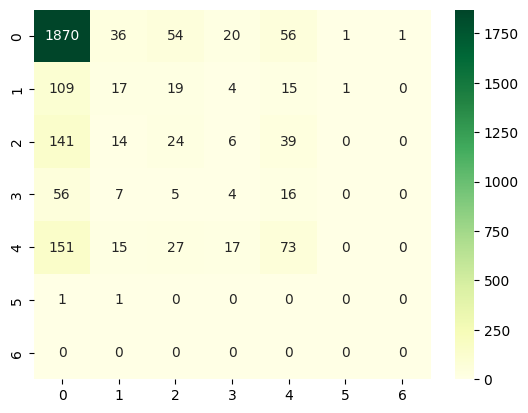

In [98]:
sns.heatmap(cmDT, annot=True, fmt='d', cmap='YlGn')

In [99]:
print(classification_report(yTest, y_predDT))

              precision    recall  f1-score   support

           1       0.80      0.92      0.86      2038
           2       0.19      0.10      0.13       165
           3       0.19      0.11      0.14       224
           4       0.08      0.05      0.06        88
           5       0.37      0.26      0.30       283
           6       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.71      2800
   macro avg       0.23      0.20      0.21      2800
weighted avg       0.65      0.71      0.67      2800



In [100]:
DTreport = classification_report(yTest, y_predDT, output_dict=True)
# DTreport

In [101]:
precisionDTweighted = DTreport['weighted avg']['precision']
recallDTweighted = DTreport['weighted avg']['recall']
f1scoreDTweighted = DTreport['weighted avg']['f1-score']

In [102]:
print(np.unique(y_predDT))
maeDT = mean_absolute_error(y_predDT, yTest)

[1 2 3 4 5 6 9]


In [103]:
# create cocurricularClassification
cocurricularClassification = pd.concat([logReg, dtClassification], ignore_index=True)
cocurricularClassification.loc[5, 'Weighted Precision'] = precisionDTweighted
cocurricularClassification.loc[5, 'Weighted Recall'] = recallDTweighted
cocurricularClassification.loc[5, 'Weighted f1-Score'] = f1scoreDTweighted
cocurricularClassification.loc[5, 'Mean Absolute Error'] = maeDT
cocurricularClassification

Data                       Algorithm        Co-Curricular  \
0  Imbalanced   Univariate LogisticRegression          allAnalyzed   
1  Imbalanced  Multinomial LogisticRegression          allAnalyzed   
2  Imbalanced         Univariate DecisionTree   categoriesAnalysed   
3  Imbalanced         Univariate DecisionTree  departmentsAnalysed   
4  Imbalanced         Univariate DecisionTree   activitiesAnalysed   
5  Imbalanced         Univariate DecisionTree          allAnalyzed   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0    binaryRFMTO             0.813929  0.186071            0.828373   
1     multiRFMTO             0.771786  0.228214            0.695876   
2  binlabelRFMTO             0.698929  0.301071                 NaN   
3  binlabelRFMTO             0.726071  0.273929                 NaN   
4  binlabelRFMTO             0.724286  0.275714                 NaN   
5  binlabelRFMTO             0.710000  0.290000            0.650218   

   Weighted Recall  Weighted f1-Score  Mean Absolute Error  
0         0.813929           0.782983             0.186071  
1         0.771786           0.713785             0.432500  
2              NaN                NaN                  NaN  
3              NaN                NaN                  NaN  
4              NaN                NaN                  NaN  
5         0.710000           0.674656             0.692143

### Summary

The Decision Tree algorithm did not perform better than the Logistic Regression algoritm, using the same data.

As such, categorical analysis will be applied to the other dependent variables, such as Exclusions, Constituents, etc.

For these analyses, only the 'allAnalyzed' data will be used.

_[Table of Contents](#toc)_

<a id='categorical'></a>
# 5. Categorical Analysis

In [104]:
# create new dataframe for the categorical analysis
studentCategorical = studentClassification.copy()

In [105]:
studentCategorical.drop(['categoriesAnalysed', 'departmentsAnalysed', 'activitiesAnalysed'], axis = 1, inplace = True)

In [106]:
studentCategorical

Sort  RFMRC  RFMFR  RFMMO  RFMTO Exclusions Postal  \
0        8g31t83     20     15      6     41    Contact     T2   
1        8gX1t83      0      0      0      0    Contact     K1   
2         ygz1t8     20     20      2     42    Contact     K1   
3        6gZ1t83      0      0      0      0    Contact     J9   
4        3g21t87      0      0      0      0    Contact     K2   
...          ...    ...    ...    ...    ...        ...    ...   
17709    9g91t88      0      0      0      0    Contact     K1   
17710  jgj1t8Z3f      0      0      0      0    Contact     K1   
17711  jgZ1t8454      0      0      0      0    Contact     S7   
17712  jgZ1t8693      0      0      0      0    Contact     N0   
17713  jgZ1t8yr7      0      0      0      0    Contact     J8   

            Constituent  Graduation                 Faculty  \
0               Alumnus      2017.0          Public Affairs   
1      Alumnus Employee      2014.0          Public Affairs   
2               Alumnus      2017.0    Engineering & Design   
3               Alumnus      2009.0      School of Business   
4               Alumnus      2011.0      School of Business   
...                 ...         ...                     ...   
17709           Alumnus      2019.0  Arts & Social Sciences   
17710           Alumnus      2020.0  Arts & Social Sciences   
17711           Alumnus      2019.0          Public Affairs   
17712           Alumnus      2019.0          Public Affairs   
17713           Alumnus      2019.0          Public Affairs   

                        Degree FirstYear                     FirstArea  \
0             Bachelor of Arts    2017.0                     Athletics   
1             Bachelor of Arts      None                          None   
2      Bachelor of Engineering    2013.0  Faculty:Engineering & Design   
3         Bachelor of Commerce      None                          None   
4         Bachelor of Commerce      None                          None   
...                        ...       ...                           ...   
17709                 Master's      None                          None   
17710                 Master's      None                          None   
17711                 Master's      None                          None   
17712                 Master's      None                          None   
17713                 Master's      None                          None   

      FirstSolicitation LargestYear      LargestArea LargestSolicitation  \
0                 Email      2021.0        Athletics               Email   
1                  None        None             None                None   
2                  Levy      2019.0  University Wide               Email   
3                  None        None             None                None   
4                  None        None             None                None   
...                 ...         ...              ...                 ...   
17709              None        None             None                None   
17710              None        None             None                None   
17711              None        None             None                None   
17712              None        None             None                None   
17713              None        None             None                None   

                                             allAnalyzed binlabelRFMTO  
0      academic success academic success athletics an...             6  
1      academic success academic success academic suc...             1  
2      academic success academic success clubs/societ...             6  
3      leadership and development student government ...             1  
4      clubs/societies/associations leadership and de...             1  
...                                                  ...           ...  
17709       volunteer/ambassadors school of linguistics              1  
17710       volunteer/ambassadors school of linguistics              1  
177

In [107]:
studentTFIDF = studentCategorical.copy()

In [108]:
studentTFIDF.columns

Index(['Sort', 'RFMRC', 'RFMFR', 'RFMMO', 'RFMTO', 'Exclusions', 'Postal',
       'Constituent', 'Graduation', 'Faculty', 'Degree', 'FirstYear',
       'FirstArea', 'FirstSolicitation', 'LargestYear', 'LargestArea',
       'LargestSolicitation', 'allAnalyzed', 'binlabelRFMTO'],
      dtype='object')

In [109]:
studentTFIDF.drop(['Sort', 'RFMRC', 'RFMFR', 'RFMMO', 'RFMTO', 'Graduation', 'FirstYear', 'LargestYear', 'binlabelRFMTO'], axis = 1, inplace = True)

In [110]:
studentTFIDF

Exclusions Postal       Constituent                 Faculty  \
0        Contact     T2           Alumnus          Public Affairs   
1        Contact     K1  Alumnus Employee          Public Affairs   
2        Contact     K1           Alumnus    Engineering & Design   
3        Contact     J9           Alumnus      School of Business   
4        Contact     K2           Alumnus      School of Business   
...          ...    ...               ...                     ...   
17709    Contact     K1           Alumnus  Arts & Social Sciences   
17710    Contact     K1           Alumnus  Arts & Social Sciences   
17711    Contact     S7           Alumnus          Public Affairs   
17712    Contact     N0           Alumnus          Public Affairs   
17713    Contact     J8           Alumnus          Public Affairs   

                        Degree                     FirstArea  \
0             Bachelor of Arts                     Athletics   
1             Bachelor of Arts                          None   
2      Bachelor of Engineering  Faculty:Engineering & Design   
3         Bachelor of Commerce                          None   
4         Bachelor of Commerce                          None   
...                        ...                           ...   
17709                 Master's                          None   
17710                 Master's                          None   
17711                 Master's                          None   
17712                 Master's                          None   
17713                 Master's                          None   

      FirstSolicitation      LargestArea LargestSolicitation  \
0                 Email        Athletics               Email   
1                  None             None                None   
2                  Levy  University Wide               Email   
3                  None             None                None   
4                  None             None                None   
...                 ...              ...                 ...   
17709              None             None                None   
17710              None             None                None   
17711              None             None                None   
17712              None             None                None   
17713              None             None                None   

                                             allAnalyzed  
0      academic success academic success athletics an...  
1      academic success academic success academic suc...  
2      academic success academic success clubs/societ...  
3      leadership and development student government ...  
4      clubs/societies/associations leadership and de...  
...                                                  ...  
17709       volunteer/ambassadors school of linguistics   
17710       volunteer/ambassadors school of linguistics   
17711  volunteer/ambassadors school of public policy ...  
17712  volunteer/ambassadors school of public policy ...  
17713  volunteer/ambassadors school of public policy ...  

[17714 rows x 10 columns]

In [111]:
studentTFIDF.columns

Index(['Exclusions', 'Postal', 'Constituent', 'Faculty', 'Degree', 'FirstArea',
       'FirstSolicitation', 'LargestArea', 'LargestSolicitation',
       'allAnalyzed'],
      dtype='object')

In [112]:
cols = ['Exclusions', 'Postal', 'Constituent', 'Faculty', 'Degree', 'FirstArea', 'FirstSolicitation', 'LargestArea', 'LargestSolicitation', 'allAnalyzed']
studentTFIDF["allCategorical"] = studentTFIDF[cols].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [113]:
studentTFIDF

Exclusions Postal       Constituent                 Faculty  \
0        Contact     T2           Alumnus          Public Affairs   
1        Contact     K1  Alumnus Employee          Public Affairs   
2        Contact     K1           Alumnus    Engineering & Design   
3        Contact     J9           Alumnus      School of Business   
4        Contact     K2           Alumnus      School of Business   
...          ...    ...               ...                     ...   
17709    Contact     K1           Alumnus  Arts & Social Sciences   
17710    Contact     K1           Alumnus  Arts & Social Sciences   
17711    Contact     S7           Alumnus          Public Affairs   
17712    Contact     N0           Alumnus          Public Affairs   
17713    Contact     J8           Alumnus          Public Affairs   

                        Degree                     FirstArea  \
0             Bachelor of Arts                     Athletics   
1             Bachelor of Arts                          None   
2      Bachelor of Engineering  Faculty:Engineering & Design   
3         Bachelor of Commerce                          None   
4         Bachelor of Commerce                          None   
...                        ...                           ...   
17709                 Master's                          None   
17710                 Master's                          None   
17711                 Master's                          None   
17712                 Master's                          None   
17713                 Master's                          None   

      FirstSolicitation      LargestArea LargestSolicitation  \
0                 Email        Athletics               Email   
1                  None             None                None   
2                  Levy  University Wide               Email   
3                  None             None                None   
4                  None             None                None   
...                 ...              ...                 ...   
17709              None             None                None   
17710              None             None                None   
17711              None             None                None   
17712              None             None                None   
17713              None             None                None   

                                             allAnalyzed  \
0      academic success academic success athletics an...   
1      academic success academic success academic suc...   
2      academic success academic success clubs/societ...   
3      leadership and development student government ...   
4      clubs/societies/associations leadership and de...   
...                                                  ...   
17709       volunteer/ambassadors school of linguistics    
17710       volunteer/ambassadors school of linguistics    
17711  volunteer/ambassadors school of public policy ...   
17712  volunteer/ambassadors school of public policy ...   
17713  volunteer/ambassadors school of public policy ...   

                                          allCategorical  
0      Contact T2 Alumnus Public Affairs Bachelor of ...  
1      Contact K1 Alumnus Employee Public Affairs Bac...  
2      Contact K1 Alumnus Engineering & Design Bachel...  
3      Contact J9 Alumnus School of Business Bachelor...  
4      Contact K2 Alumnus School of Business Bachelor...  
...                                                  ...  
17709  Contact K1 Alumnus Arts & Social Sciences Mast...  
17710  Contact K1 Alumnus Arts & Social Sciences Mast...  
17711  Contact S7 Alumnus Public Affairs Master's Non...  
17712  Contact N0 Alumnus Public Affairs Master's Non...  
17713  Contact J8 Alumnus Public Affairs Master's Non...  

[17714 rows x 11 columns]

In [114]:
# define categorical values for all classification algoritms
X = studentTFIDF['allCategorical'] # all categorical values
y = studentCategorical['binlabelRFMTO']

In [115]:
trainLabel = y[ : 14000] # split the training data, to be first 14,000 values
testLabel = y[14000 : ] # split the test data, to be first 14,000 values
trainData = X[ : 14000] # split the training data, to be first 14,000 values
testData = X[14000 : ] # split the test data, to be first 14,000 values

In [116]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(trainData) # vectorize the 'allCategorical' data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, trainLabel, test_size= 0.2, random_state= 1) # split the 'allCategorical' and RFMTO labels between trianing and validation
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (11200, 410)
X_test dimension=  (2800, 410)
y_train dimension=  (11200,)
y_train dimension=  (2800,)


_[Table of Contents](#toc)_

<a id='catDT'></a>
## Decision Tree

In [118]:
dtCatCLF = DecisionTreeClassifier(criterion = 'entropy', random_state = 42) # Hitchhiker's Guide to the Galaxy

In [119]:
dtCatCLF.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [120]:
y_predCatDT = dtCatCLF.predict(X_test)
accCatDT = accuracy_score(y_test, y_predCatDT)
accCatDT

0.8467857142857143

In [121]:
cmCatDT = confusion_matrix(y_test, y_predCatDT)

print('Confusion matrix\n\n', cmCatDT)

Confusion matrix

 [[2056    0    2    2    4    0]
 [   2   54   55    9   19    1]
 [   2   49   92   23   44    0]
 [   2   16   28   10   29    0]
 [   3   34   66   36  159    1]
 [   0    0    0    1    1    0]]


<Axes: >

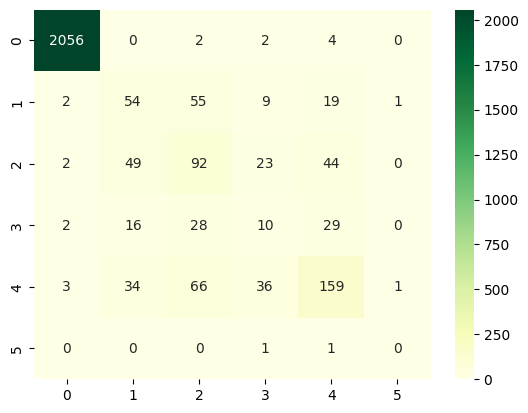

In [122]:
sns.heatmap(cmCatDT, annot=True, fmt='d', cmap='YlGn')

In [123]:
print(classification_report(y_test, y_predCatDT))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2064
           2       0.35      0.39      0.37       140
           3       0.38      0.44      0.41       210
           4       0.12      0.12      0.12        85
           5       0.62      0.53      0.57       299
           6       0.00      0.00      0.00         2

    accuracy                           0.85      2800
   macro avg       0.41      0.41      0.41      2800
weighted avg       0.85      0.85      0.85      2800



In [124]:
CatDTreport = classification_report(y_test, y_predCatDT, output_dict=True)
# CatDTreport

In [125]:
errorCatDT = 1 - accCatDT
precisionCatDTweighted = CatDTreport['weighted avg']['precision']
recallCatDTweighted = CatDTreport['weighted avg']['recall']
f1scoreCatDTweighted = CatDTreport['weighted avg']['f1-score']

In [126]:
print(np.unique(y_predCatDT))
maeCatDT = mean_absolute_error(y_predCatDT, y_test)

[1 2 3 4 5 6]


In [127]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', 'TFIDF DecisionTree', 'allAnalyzed', 'binlabelRFMTO', accCatDT, errorCatDT, precisionCatDTweighted, recallCatDTweighted, f1scoreCatDTweighted, maeCatDT]
cocurricularClassification

Data                       Algorithm        Co-Curricular  \
0  Imbalanced   Univariate LogisticRegression          allAnalyzed   
1  Imbalanced  Multinomial LogisticRegression          allAnalyzed   
2  Imbalanced         Univariate DecisionTree   categoriesAnalysed   
3  Imbalanced         Univariate DecisionTree  departmentsAnalysed   
4  Imbalanced         Univariate DecisionTree   activitiesAnalysed   
5  Imbalanced         Univariate DecisionTree          allAnalyzed   
6  Imbalanced              TFIDF DecisionTree          allAnalyzed   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0    binaryRFMTO             0.813929  0.186071            0.828373   
1     multiRFMTO             0.771786  0.228214            0.695876   
2  binlabelRFMTO             0.698929  0.301071                 NaN   
3  binlabelRFMTO             0.726071  0.273929                 NaN   
4  binlabelRFMTO             0.724286  0.275714                 NaN   
5  binlabelRFMTO             0.710000  0.290000            0.650218   
6  binlabelRFMTO             0.846786  0.153214            0.850044   

   Weighted Recall  Weighted f1-Score  Mean Absolute Error  
0         0.813929           0.782983             0.186071  
1         0.771786           0.713785             0.432500  
2              NaN                NaN                  NaN  
3              NaN                NaN                  NaN  
4              NaN                NaN                  NaN  
5         0.710000           0.674656             0.692143  
6         0.846786           0.847844             0.252500

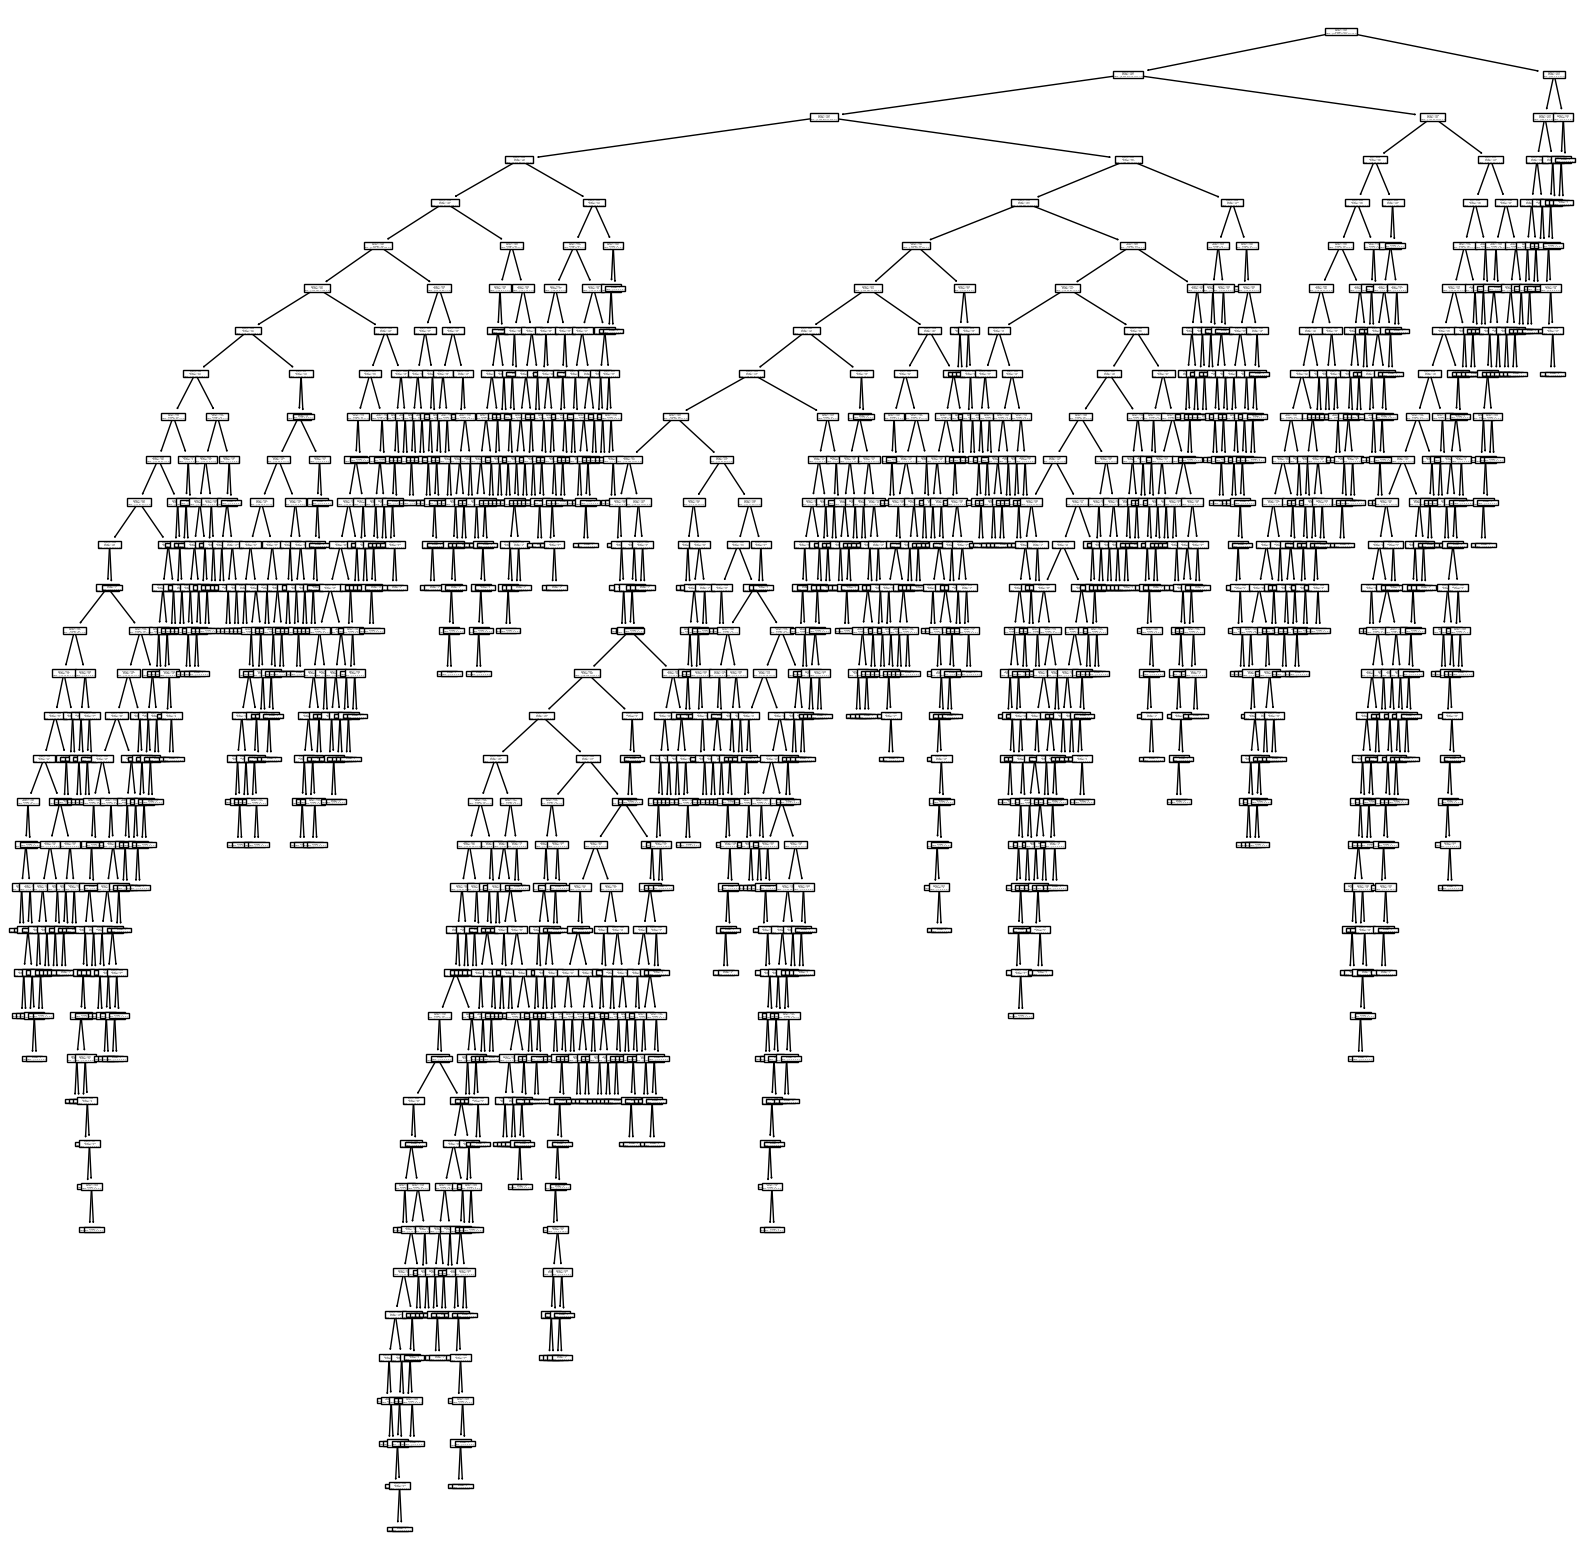

In [128]:
width = 20
height = 20
plt.figure(figsize=(width, height))
plot_tree(dtCatCLF)
plt.show()

_[Table of Contents](#toc)_

<a id='catNB'></a>
## Multinomial Naive Bayes

In [129]:
mnbCLF = MultinomialNB()
mnbCLF.fit(X_train, y_train)

MultinomialNB()

In [130]:
y_predMNB = mnbCLF.predict(X_test)
accMNB = accuracy_score(y_test, y_predMNB)
accMNB

0.8521428571428571

In [131]:
cmMNB = confusion_matrix(y_test, y_predMNB)

print('Confusion matrix\n\n', cmMNB)

Confusion matrix

 [[2061    0    1    0    2    0]
 [  31   13   46    0   50    0]
 [  28    9   60    0  113    0]
 [  19    4    9    0   53    0]
 [  21   12   13    1  252    0]
 [   0    0    1    0    1    0]]


<Axes: >

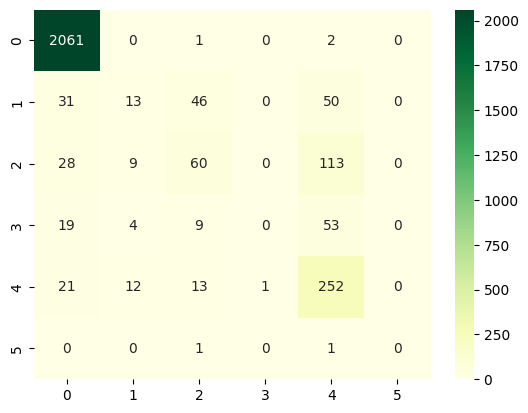

In [132]:
sns.heatmap(cmMNB, annot=True, fmt='d', cmap='YlGn')

In [133]:
print(metrics.classification_report(y_test, y_predMNB))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98      2064
           2       0.34      0.09      0.15       140
           3       0.46      0.29      0.35       210
           4       0.00      0.00      0.00        85
           5       0.54      0.84      0.65       299
           6       0.00      0.00      0.00         2

    accuracy                           0.85      2800
   macro avg       0.38      0.37      0.35      2800
weighted avg       0.81      0.85      0.82      2800



In [134]:
MNBreport = classification_report(y_test, y_predMNB, output_dict=True)
# MNBreport

In [135]:
errorMNB = 1 - accMNB
precisionMNBweighted = MNBreport['weighted avg']['precision']
recallMNBweighted = MNBreport['weighted avg']['recall']
f1scoreMNBweighted = MNBreport['weighted avg']['f1-score']

In [136]:
print(np.unique(y_predMNB))
maeMNB = mean_absolute_error(y_predMNB, y_test)

[1 2 3 4 5]


In [137]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', 'TFIDF Multinomial Naive Bayes', 'allActivities', 'binlabelRFMTO', accMNB, errorMNB, precisionMNBweighted, recallMNBweighted, f1scoreMNBweighted, maeMNB]
cocurricularClassification

Data                       Algorithm        Co-Curricular  \
0  Imbalanced   Univariate LogisticRegression          allAnalyzed   
1  Imbalanced  Multinomial LogisticRegression          allAnalyzed   
2  Imbalanced         Univariate DecisionTree   categoriesAnalysed   
3  Imbalanced         Univariate DecisionTree  departmentsAnalysed   
4  Imbalanced         Univariate DecisionTree   activitiesAnalysed   
5  Imbalanced         Univariate DecisionTree          allAnalyzed   
6  Imbalanced              TFIDF DecisionTree          allAnalyzed   
7  Imbalanced   TFIDF Multinomial Naive Bayes        allActivities   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0    binaryRFMTO             0.813929  0.186071            0.828373   
1     multiRFMTO             0.771786  0.228214            0.695876   
2  binlabelRFMTO             0.698929  0.301071                 NaN   
3  binlabelRFMTO             0.726071  0.273929                 NaN   
4  binlabelRFMTO             0.724286  0.275714                 NaN   
5  binlabelRFMTO             0.710000  0.290000            0.650218   
6  binlabelRFMTO             0.846786  0.153214            0.850044   
7  binlabelRFMTO             0.852143  0.147857            0.812212   

   Weighted Recall  Weighted f1-Score  Mean Absolute Error  
0         0.813929           0.782983             0.186071  
1         0.771786           0.713785             0.432500  
2              NaN                NaN                  NaN  
3              NaN                NaN                  NaN  
4              NaN                NaN                  NaN  
5         0.710000           0.674656             0.692143  
6         0.846786           0.847844             0.252500  
7         0.852143           0.823013             0.287857

_[Table of Contents](#toc)_

<a id='catRF'></a>
## Random Forest

In [138]:
rfCLF = RandomForestClassifier(n_estimators=100, random_state = 42) # Hitchhiker's Guide to the Galaxy
rfCLF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [139]:
y_predRF = rfCLF.predict(X_test)
accRF = accuracy_score(y_test, y_predRF)
accRF

0.875

In [140]:
cmRF = confusion_matrix(y_test, y_predRF)

print('Confusion matrix\n\n', cmRF)

Confusion matrix

 [[2061    1    2    0    0    0]
 [   5   54   49    3   29    0]
 [   0   25  126    3   56    0]
 [   1    9   37    4   34    0]
 [   3   19   61   11  205    0]
 [   0    1    0    1    0    0]]


<Axes: >

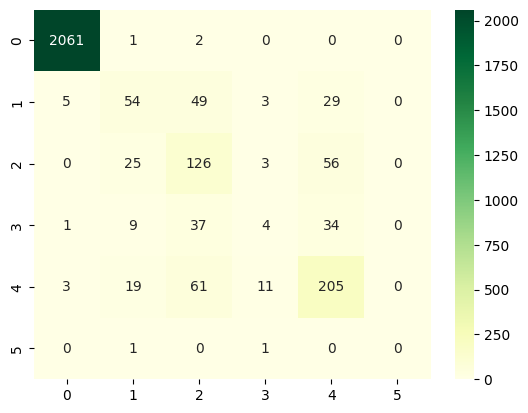

In [141]:
sns.heatmap(cmRF, annot=True, fmt='d', cmap='YlGn')

In [142]:
print(metrics.classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2064
           2       0.50      0.39      0.43       140
           3       0.46      0.60      0.52       210
           4       0.18      0.05      0.07        85
           5       0.63      0.69      0.66       299
           6       0.00      0.00      0.00         2

    accuracy                           0.88      2800
   macro avg       0.46      0.45      0.45      2800
weighted avg       0.87      0.88      0.87      2800



In [143]:
RFreport = classification_report(y_test, y_predRF, output_dict=True)
# RFreport

In [144]:
errorRF = 1 - accRF
precisionRFweighted = RFreport['weighted avg']['precision']
recallRFweighted = RFreport['weighted avg']['recall']
f1scoreRFweighted = RFreport['weighted avg']['f1-score']

In [145]:
print(np.unique(y_predRF))
maeRF = mean_absolute_error(y_predRF, y_test)

[1 2 3 4 5]


In [146]:
# print("Mean Absolute Error : " + str(maeRF))

In [147]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', 'TFIDF Random Forest', 'allActivities', 'binlabelRFMTO', accRF, errorRF, precisionRFweighted, recallRFweighted, f1scoreRFweighted, maeRF]
cocurricularClassification

Data                       Algorithm        Co-Curricular  \
0  Imbalanced   Univariate LogisticRegression          allAnalyzed   
1  Imbalanced  Multinomial LogisticRegression          allAnalyzed   
2  Imbalanced         Univariate DecisionTree   categoriesAnalysed   
3  Imbalanced         Univariate DecisionTree  departmentsAnalysed   
4  Imbalanced         Univariate DecisionTree   activitiesAnalysed   
5  Imbalanced         Univariate DecisionTree          allAnalyzed   
6  Imbalanced              TFIDF DecisionTree          allAnalyzed   
7  Imbalanced   TFIDF Multinomial Naive Bayes        allActivities   
8  Imbalanced             TFIDF Random Forest        allActivities   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0    binaryRFMTO             0.813929  0.186071            0.828373   
1     multiRFMTO             0.771786  0.228214            0.695876   
2  binlabelRFMTO             0.698929  0.301071                 NaN   
3  binlabelRFMTO             0.726071  0.273929                 NaN   
4  binlabelRFMTO             0.724286  0.275714                 NaN   
5  binlabelRFMTO             0.710000  0.290000            0.650218   
6  binlabelRFMTO             0.846786  0.153214            0.850044   
7  binlabelRFMTO             0.852143  0.147857            0.812212   
8  binlabelRFMTO             0.875000  0.125000            0.866157   

   Weighted Recall  Weighted f1-Score  Mean Absolute Error  
0         0.813929           0.782983             0.186071  
1         0.771786           0.713785             0.432500  
2              NaN                NaN                  NaN  
3              NaN                NaN                  NaN  
4              NaN                NaN                  NaN  
5         0.710000           0.674656             0.692143  
6         0.846786           0.847844             0.252500  
7         0.852143           0.823013             0.287857  
8         0.875000           0.868205             0.211429

_[Table of Contents](#toc)_

<a id='catXGB'></a>
## XGBoost

In [148]:
xgbCLF = XGBClassifier(n_estimators = 400, learning_rate = 0.1)

In [149]:
le = LabelEncoder()
y_trainLE = le.fit_transform(y_train)

In [150]:
y_trainLE

array([0, 0, 0, ..., 0, 2, 0], dtype=int64)

In [151]:
# Verbose = False, to avoid printing out updates with each cycle
xgbCLF.fit(X_train, y_trainLE, verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [152]:
y_testLE = le.fit_transform(y_test)

In [153]:
y_predXGB = xgbCLF.predict(X_test)
accXGB = accuracy_score(y_testLE, y_predXGB)
accXGB

0.8767857142857143

In [154]:
cmXGB = confusion_matrix(y_testLE, y_predXGB)

print('Confusion matrix\n\n', cmXGB)

Confusion matrix

 [[2061    1    1    0    1    0]
 [   1   64   42    4   29    0]
 [   0   32  116    6   56    0]
 [   0    7   39    4   35    0]
 [   2   22   53   12  210    0]
 [   0    0    0    0    2    0]]


<Axes: >

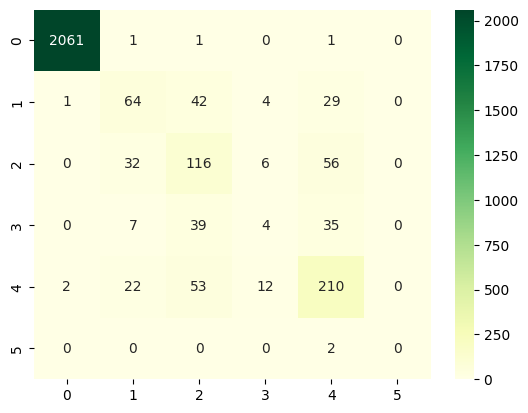

In [155]:
sns.heatmap(cmXGB, annot=True, fmt='d', cmap='YlGn')

In [156]:
print(metrics.classification_report(y_testLE, y_predXGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2064
           1       0.51      0.46      0.48       140
           2       0.46      0.55      0.50       210
           3       0.15      0.05      0.07        85
           4       0.63      0.70      0.66       299
           5       0.00      0.00      0.00         2

    accuracy                           0.88      2800
   macro avg       0.46      0.46      0.45      2800
weighted avg       0.87      0.88      0.87      2800



In [157]:
XGBreport = classification_report(y_testLE, y_predXGB, output_dict=True)

In [158]:
errorXGB = 1 - accXGB
precisionXGBweighted = XGBreport['weighted avg']['precision']
recallXGBweighted = XGBreport['weighted avg']['recall']
f1scoreXGBweighted = XGBreport['weighted avg']['f1-score']

In [159]:
print(np.unique(y_predXGB))
maeXGB = mean_absolute_error(y_predXGB, y_testLE)

[0 1 2 3 4]


In [160]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', 'TFIDF XGBoost', 'allActivities', 'binlabelRFMTO', accXGB, errorXGB, precisionXGBweighted, recallXGBweighted, f1scoreXGBweighted, maeXGB]
cocurricularClassification

Data                       Algorithm        Co-Curricular  \
0  Imbalanced   Univariate LogisticRegression          allAnalyzed   
1  Imbalanced  Multinomial LogisticRegression          allAnalyzed   
2  Imbalanced         Univariate DecisionTree   categoriesAnalysed   
3  Imbalanced         Univariate DecisionTree  departmentsAnalysed   
4  Imbalanced         Univariate DecisionTree   activitiesAnalysed   
5  Imbalanced         Univariate DecisionTree          allAnalyzed   
6  Imbalanced              TFIDF DecisionTree          allAnalyzed   
7  Imbalanced   TFIDF Multinomial Naive Bayes        allActivities   
8  Imbalanced             TFIDF Random Forest        allActivities   
9  Imbalanced                   TFIDF XGBoost        allActivities   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0    binaryRFMTO             0.813929  0.186071            0.828373   
1     multiRFMTO             0.771786  0.228214            0.695876   
2  binlabelRFMTO             0.698929  0.301071                 NaN   
3  binlabelRFMTO             0.726071  0.273929                 NaN   
4  binlabelRFMTO             0.724286  0.275714                 NaN   
5  binlabelRFMTO             0.710000  0.290000            0.650218   
6  binlabelRFMTO             0.846786  0.153214            0.850044   
7  binlabelRFMTO             0.852143  0.147857            0.812212   
8  binlabelRFMTO             0.875000  0.125000            0.866157   
9  binlabelRFMTO             0.876786  0.123214            0.868142   

   Weighted Recall  Weighted f1-Score  Mean Absolute Error  
0         0.813929           0.782983             0.186071  
1         0.771786           0.713785             0.432500  
2              NaN                NaN                  NaN  
3              NaN                NaN                  NaN  
4              NaN                NaN                  NaN  
5         0.710000           0.674656             0.692143  
6         0.846786           0.847844             0.252500  
7         0.852143           0.823013             0.287857  
8         0.875000           0.868205             0.211429  
9         0.876786           0.871029             0.206071

_[Table of Contents](#toc)_

<a id='balanced'></a>
## 6. Balanced Data

<a id='balancedData'></a>
### 6.1 Datasets

1. Random Oversampling
2. Random Undersampling

In [161]:
randomOS = RandomOverSampler(random_state = 42)
X_train_ros, y_train_ros = randomOS.fit_resample(X_train, y_train)

# Confirm the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(1, 8215), (2, 8215), (3, 8215), (4, 8215), (5, 8215), (6, 8215), (9, 8215)]


In [162]:
randomUS = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus= randomUS.fit_resample(X_train, y_train)

# Confirm the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (9, 1)]


<a id='oversampledRF'></a>
### 6.2 Random Forest with Oversampled Balanced Data

In [163]:
rfROS = RandomForestClassifier(n_estimators=100, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [164]:
# Verbose = False, to avoid printing out updates with each cycle
rfROS.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=42)

In [165]:
y_predRFROS = rfROS.predict(X_test)
accRFROS = accuracy_score(y_test, y_predRFROS)
accRFROS

0.8703571428571428

In [166]:
cmRFROS = confusion_matrix(y_test, y_predRFROS)

print('Confusion matrix\n\n', cmRFROS)

Confusion matrix

 [[2061    2    1    0    0    0]
 [   8   58   47    2   25    0]
 [   0   35  117   12   46    0]
 [   1   12   34   10   28    0]
 [   3   22   63   20  191    0]
 [   0    1    0    1    0    0]]


<Axes: >

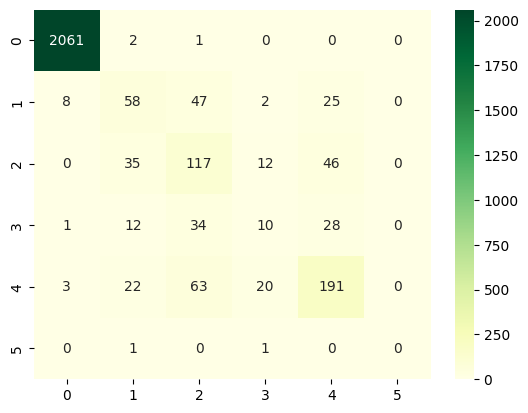

In [167]:
sns.heatmap(cmRFROS, annot=True, fmt='d', cmap='YlGn')

In [168]:
print(metrics.classification_report(y_test, y_predRFROS))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2064
           2       0.45      0.41      0.43       140
           3       0.45      0.56      0.50       210
           4       0.22      0.12      0.15        85
           5       0.66      0.64      0.65       299
           6       0.00      0.00      0.00         2

    accuracy                           0.87      2800
   macro avg       0.46      0.45      0.45      2800
weighted avg       0.87      0.87      0.87      2800



In [169]:
RFROSreport = classification_report(y_test, y_predRFROS, output_dict=True)

In [170]:
errorRFROS = 1 - accRFROS
precisionRFROSweighted = RFROSreport['weighted avg']['precision']
recallRFROSweighted = RFROSreport['weighted avg']['recall']
f1scoreRFROSweighted = RFROSreport['weighted avg']['f1-score']

In [171]:
print(np.unique(y_predRFROS))
maeRFROS = mean_absolute_error(y_predRFROS, y_test)

[1 2 3 4 5]


In [172]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Oversampled Balanced', 'TFIDF Random Forest', 'allActivities', 'binlabelRFMTO', accRFROS, errorRFROS, precisionRFROSweighted, recallRFROSweighted, f1scoreRFROSweighted, maeRFROS]
cocurricularClassification

Data                       Algorithm        Co-Curricular  \
0             Imbalanced   Univariate LogisticRegression          allAnalyzed   
1             Imbalanced  Multinomial LogisticRegression          allAnalyzed   
2             Imbalanced         Univariate DecisionTree   categoriesAnalysed   
3             Imbalanced         Univariate DecisionTree  departmentsAnalysed   
4             Imbalanced         Univariate DecisionTree   activitiesAnalysed   
5             Imbalanced         Univariate DecisionTree          allAnalyzed   
6             Imbalanced              TFIDF DecisionTree          allAnalyzed   
7             Imbalanced   TFIDF Multinomial Naive Bayes        allActivities   
8             Imbalanced             TFIDF Random Forest        allActivities   
9             Imbalanced                   TFIDF XGBoost        allActivities   
10  Oversampled Balanced             TFIDF Random Forest        allActivities   

            Label  Prediction Accuracy     Error  Weighted Precision  \
0     binaryRFMTO             0.813929  0.186071            0.828373   
1      multiRFMTO             0.771786  0.228214            0.695876   
2   binlabelRFMTO             0.698929  0.301071                 NaN   
3   binlabelRFMTO             0.726071  0.273929                 NaN   
4   binlabelRFMTO             0.724286  0.275714                 NaN   
5   binlabelRFMTO             0.710000  0.290000            0.650218   
6   binlabelRFMTO             0.846786  0.153214            0.850044   
7   binlabelRFMTO             0.852143  0.147857            0.812212   
8   binlabelRFMTO             0.875000  0.125000            0.866157   
9   binlabelRFMTO             0.876786  0.123214            0.868142   
10  binlabelRFMTO             0.870357  0.129643            0.865753   

    Weighted Recall  Weighted f1-Score  Mean Absolute Error  
0          0.813929           0.782983             0.186071  
1          0.771786           0.713785             0.432500  
2               NaN                NaN                  NaN  
3               NaN                NaN                  NaN  
4               NaN                NaN                  NaN  
5          0.710000           0.674656             0.692143  
6          0.846786           0.847844             0.252500  
7          0.852143           0.823013             0.287857  
8          0.875000           0.868205             0.211429  
9          0.876786           0.871029             0.206071  
10         0.870357           0.867061             0.212857

<a id='undersampledRF'></a>
### 6.2 Random Forest with Undersampled Balanced Data

In [173]:
rfRUS = RandomForestClassifier(n_estimators=100, random_state = 42) # Hitchhiker's Guide to the Galaxy

In [174]:
# Verbose = False, to avoid printing out updates with each cycle
rfRUS.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [175]:
y_predRFRUS = rfROS.predict(X_test)
accRFRUS = accuracy_score(y_test, y_predRFRUS)
accRFRUS

0.8703571428571428

In [176]:
cmRFRUS = confusion_matrix(y_test, y_predRFRUS)

print('Confusion matrix\n\n', cmRFRUS)

Confusion matrix

 [[2061    2    1    0    0    0]
 [   8   58   47    2   25    0]
 [   0   35  117   12   46    0]
 [   1   12   34   10   28    0]
 [   3   22   63   20  191    0]
 [   0    1    0    1    0    0]]


<Axes: >

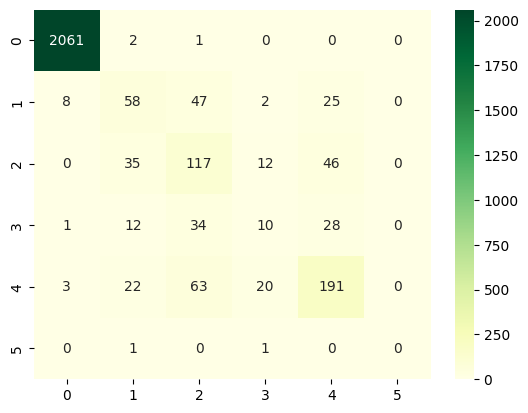

In [177]:
sns.heatmap(cmRFRUS, annot=True, fmt='d', cmap='YlGn')

In [178]:
print(metrics.classification_report(y_test, y_predRFRUS))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      2064
           2       0.45      0.41      0.43       140
           3       0.45      0.56      0.50       210
           4       0.22      0.12      0.15        85
           5       0.66      0.64      0.65       299
           6       0.00      0.00      0.00         2

    accuracy                           0.87      2800
   macro avg       0.46      0.45      0.45      2800
weighted avg       0.87      0.87      0.87      2800



In [179]:
RFRUSreport = classification_report(y_test, y_predRFRUS, output_dict=True)

In [180]:
errorRFRUS = 1 - accRFRUS
precisionRFRUSweighted = RFROSreport['weighted avg']['precision']
recallRFRUSweighted = RFROSreport['weighted avg']['recall']
f1scoreRFRUSweighted = RFROSreport['weighted avg']['f1-score']

In [181]:
print(np.unique(y_predRFRUS))
maeRFRUS = mean_absolute_error(y_predRFRUS, y_test)

[1 2 3 4 5]


In [182]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Undersampled Balanced', 'TFIDF Random Forest', 'allActivities', 'binlabelRFMTO', accRFRUS, errorRFRUS, precisionRFRUSweighted, recallRFRUSweighted, f1scoreRFRUSweighted, maeRFRUS]
cocurricularClassification

Data                       Algorithm  \
0              Imbalanced   Univariate LogisticRegression   
1              Imbalanced  Multinomial LogisticRegression   
2              Imbalanced         Univariate DecisionTree   
3              Imbalanced         Univariate DecisionTree   
4              Imbalanced         Univariate DecisionTree   
5              Imbalanced         Univariate DecisionTree   
6              Imbalanced              TFIDF DecisionTree   
7              Imbalanced   TFIDF Multinomial Naive Bayes   
8              Imbalanced             TFIDF Random Forest   
9              Imbalanced                   TFIDF XGBoost   
10   Oversampled Balanced             TFIDF Random Forest   
11  Undersampled Balanced             TFIDF Random Forest   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   

    Weighted Precision  Weighted Recall  Weighted f1-Score  \
0             0.828373         0.813929           0.782983   
1             0.695876         0.771786           0.713785   
2                  NaN              NaN                NaN   
3                  NaN              NaN                NaN   
4                  NaN              NaN                NaN   
5             0.650218         0.710000           0.674656   
6             0.850044         0.846786           0.847844   
7             0.812212         0.852143           0.823013   
8             0.866157         0.875000           0.868205   
9             0.868142         0.876786           0.871029   
10            0.865753         0.870357           0.867061   
11            0.865753         0.870357           0.867061   

    Mean Absolute Error  
0              0.186071  
1              0.432500  
2                   NaN  
3                   NaN  
4                   NaN  
5              0.692143  
6              0.252500  
7              0.287857  
8              0.211429  
9              0.206071  
10             0.212857  
11             0.212857

_[Table of Contents](#toc)_

<a id='deep'></a>
## 7. Deep Learning

### 7.1 Manipulte into Tensors

For the multinomial multi-class co-curricular data, the data and the labels need to be vectorized. This will be completed using the Keras Tokenizer method for the text and the Scikit-learn LabelBinarizer for the labels.

All data and text will be embedded as an all-zero vector with the value of '1' in the place of the label index, for the representative class.

In [183]:
# define categorical values for all classification algoritms
deepX = studentTFIDF['allCategorical'] # all categorical values
deepLabels = studentCategorical['binlabelRFMTO'] # labels
numCategories = len(studentCategorical['binlabelRFMTO'].unique())
numCategories # categories for deep learning models

8

In [184]:
# confirm matching shape
deepX.shape, deepLabels.shape

((17714,), (17714,))

In [185]:
# split data into training and test
deepXtrain = deepX[:14000]
deepXtest = deepX[14000:]
print(len(deepXtrain), len(deepXtest))

14000 3714


In [186]:
# binary encode the labels using scikit-learn LabelBinarizer
labels = LabelBinarizer()
labels.fit(deepLabels)
deepY = labels.transform(deepLabels) # convert label data into vectorized labels

In [187]:
deepY

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [188]:
# split binary encoded labels into training and test
deepYtrain = deepY[:14000]
deepYtest = deepY[14000:]
print(len(deepYtrain), len(deepYtest))

14000 3714


In [189]:
# xDeepTrain, xDeepTest, yDeepTrain, yDeepTest = train_test_split(deepX, deepY, test_size = 0.2, random_state = 42) # split the training data into training and validation

In [190]:
xDeepTrain, xDeepVal, yDeepTrain, yDeepVal = train_test_split(deepXtrain, deepYtrain, test_size = 0.2, random_state = 42) # split the training data into training and validation

In [191]:
xDeepTrain.shape

(11200,)

In [192]:
# create dictionary of all data words, using Keras Tokenizer
max_words = 200
tokenizer = kprocessing.text.Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(xDeepTrain)
vocab = tokenizer.word_index
reverse_vocab = dict([(value, key) for (key, value) in vocab.items()])

In [193]:
# length of the dictionary
vocabLen = len(reverse_vocab)
vocabLen

399

In [194]:
# view dictionary
reverse_vocab

{1: 'none',
 2: 'student',
 3: 'of',
 4: 'clubs',
 5: 'societies',
 6: 'associations',
 7: 'university',
 8: 'and',
 9: 'department',
 10: 'engineering',
 11: 'contact',
 12: 'government',
 13: 'alumnus',
 14: 'faculty',
 15: 'bachelor',
 16: 'administrative',
 17: 'arts',
 18: 'residence',
 19: 'design',
 20: 'school',
 21: 'leadership',
 22: 'development',
 23: 'education',
 24: 'outreach',
 25: 'academic',
 26: 'accessibility',
 27: 'levy',
 28: 'affairs',
 29: 'public',
 30: 'science',
 31: 'life',
 32: 'business',
 33: 'programs',
 34: 'orientation',
 35: 'learning',
 36: 'success',
 37: 'residencestudent',
 38: 'social',
 39: 'sciences',
 40: 'athletics',
 41: 'k1',
 42: 'community',
 43: 'based',
 44: 'k2',
 45: 'notgraduated',
 46: 'recreation',
 47: 'improvement',
 48: 'alumni',
 49: 'card',
 50: 'zz',
 51: 'commerce',
 52: 'services',
 53: 'email',
 54: 'society',
 55: 'employee',
 56: 'certificate',
 57: 'holder',
 58: 'competition',
 59: 'sports',
 60: 'committees',
 61: 't

In [195]:
# max_words = 200
# tokenizer2 = kprocessing.text.Tokenizer(num_words = max_words)
# tokenizer2.fit_on_texts(xDeepTrain2)
# vocab2 = tokenizer.word_index
# reverse_vocab2 = dict([(value, key) for (key, value) in vocab2.items()])

In [196]:
# use Keras tokenizer to vectorize the text corpus using ordinal encoding, using 'text_to_sequences' method
sequencesTrain = tokenizer.texts_to_sequences(xDeepTrain)

xDeepTrain_seq = kprocessing.sequence.pad_sequences(sequencesTrain) # pad sequences to same length

xDeepVal_seq = kprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(xDeepVal), maxlen = 146) # # pad sequences to same length (146)

n = 40
print('Shape: ',xDeepTrain_seq.shape)
print(100*'-')
print('Example: ',xDeepTrain_seq[n,:])
print(100*'-')
print('Shape: ',xDeepVal_seq.shape)
print(100*'-')
print('Example: ',xDeepVal_seq[n,:])

Shape:  (11200, 146)
----------------------------------------------------------------------------------------------------
Example:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 11 84 13 29 28 15  3 17  1  1  1  1 21  8 22  2 12  7 16  9  2 12  2
 37 59]
----------------------------------------------------------------------------------------------------
Shape:  (2800, 146)
----------------------------------------------------------------------------------------------------
Example:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0

In [197]:
# use Keras tokenizer to vectorize the text corpus using ordinal encoding, using 'text_to_sequences' method
sequencesTest = tokenizer.texts_to_sequences(deepXtest)
xDeepTest_seq = kprocessing.sequence.pad_sequences(sequencesTest, maxlen = 146) # pad sequences to same length

n = 40
print('Shape: ',xDeepTrain_seq.shape)
print(100*'-')
print('Example: ',xDeepTrain_seq[n,:])
print(100*'-')

Shape:  (11200, 146)
----------------------------------------------------------------------------------------------------
Example:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 11 84 13 29 28 15  3 17  1  1  1  1 21  8 22  2 12  7 16  9  2 12  2
 37 59]
----------------------------------------------------------------------------------------------------


In [198]:
# sequencesTrain2 = tokenizer.texts_to_sequences(xDeepTrain2)

# xDeepTrain_seq2 = kprocessing.sequence.pad_sequences(sequencesTrain2)

# xDeepVal_seq2 = kprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(xDeepVal), maxlen=146)

# n=10 # You can adjust n
# print('Shape: ',xDeepTrain_seq2.shape)
# print(100*'-')
# print('Example: ',xDeepTrain_seq2[n,:])
# print(100*'-')
# print('Shape: ',xDeepVal_seq2.shape)
# print(100*'-')
# print('Example: ',xDeepVal_seq2[n,:])

In [199]:
emb_matrix = np.zeros((vocabLen + 1, 300))
emb_matrix.shape

(400, 300)

In [200]:
# emb_matrix2 = np.zeros((vocabLen2 + 1, 300))
# emb_matrix2.shape

In [201]:
for i in range(vocabLen):
    w = reverse_vocab[i + 1]
    if w in w2v:
        emb_matrix[i + 1, :] = w2v[w]

emb_size = emb_matrix.shape[1]
emb_size

300

In [202]:
# for i in range(vocabLen2):
#     w = reverse_vocab2[i + 1]
#     if w in w2v:
#         emb_matrix2[i + 1, :] = w2v[w]

# emb_size2 = emb_matrix2.shape[1]

_[Table of Contents](#toc)_

<a id='baseline'></a>
### 7.2 Baseline Model

To develop the smallest model that beats the common-sense baseline for this single-lable, multi-class classification problem.

#### **Last Layer Activation**

As RFM Total is a single-label, multi-class classification problem, the best last-layer activation method to use is **softmax**. Softmax is a last layer activation function that assigns probabilities to each possible class. These probabilities will sum to '1', and therefore the goal is to have one of the 8 possible classes (from the binlabelRFMTO bins alloation) having a significantly higher probability for the correct class than the other 8 classes, and as close to '1' as possible.

Activation functions **not suitable** for this problem are:

- Sigmoid similarly has prediction values that range between 0 and 1, but will not constrain the summation to 1. Sigmoid is best used with  binary label classification problem, and therefore will not attempt to predict one answer that 'softmax' will do.
- ReLU (rectified linear units) can be used as an activation layer, but it generally used as a hidden layer, and is used to avoid 'the vanishing gradient problem' when gradients become unusably small for backpropagation.

#### **Loss Function**

As this is a single-label, multi-class classification problem, the best loss function to use is **categorical cross-entropy**. This loss function is also known as 'softmax loss', so it therefore appropriate to use with the softmax activation. With categorical cross-entropy, the output probability distributions calculated by the softmax activation are measured against the 'truth values'.

Using the softmax activitation, the probabilities will be a range of the 8 classes. If the model has strong generalization predictive power, then the predicted class value will be very close to '1', the remaining 7 classes will have values very close to '0', and then the categorical cross-entory loss function will be close to 0.

Binary cross-entropy would not be a suitable loss function, as this is not a binary classification problem. Additionally, mean-squared error or mean absolute error would not be a suitable loss functions as those are best for regression problems comparing the prediction with the regression line.

#### **Optimiser**

**RMSprop**  (root mean square propagation) will be used to build the models, is an algorithm introduced by Geoff Hinton, and is calculated using a moving average of the squared gradient for each weight.

As needed, other gradient descent optimizers will be explored, including:

- SGD (stochastic gradient descent), a simple baseline gradient descent algorithm that updates learning rate and momentum betweeen batches to optimize the model's weights
- Adam (Adaptive Moment Estimation), which is similar to RMSprop, but it also tracks the gradient averages
- Adagrad, an improvement of SGD, by updating learning rates differently for frequently occurring features versus infrequent features
- Adadelta, which is very similar to RMSprop, and is an extension of Adagrad

#### **Baseline Model**

To develop a smallest model possible, there will be one hidden layer and then the final layer will have an outpout size of 8 (for the 8 classes). For the hidden layer, **'softplus' is used instead of 'ReLU'**, providing a smoothed equivelent of ReLU where the output is always positive. For this layer, an output size of 2 will be defined.

The main difference is that ReLU will output the input directly if it is positive, otherwise, it will output '0'. The idea is that any inputs that do not impact the following layer will be 'switched off'. In comparison, with 'softplus' as outputs approach '0' the function is smooth and differentiable. Additionally, low impacting inputs still have positive values, although these become asymptotic to '0'.

Therefore, ReLU and versions of ReLU are preferred to 'softplus', and 'softplus' is generally not used often anymore. For the purpose of generating the smallest model possible, 'softplus' will however be used.

For the compile step, to achieve the smallest model possible, **stochastic gradient descent (SGD)** will be used with a learning rate of 1.0. SGD is a simpler algorithm than RMSprop, converges slower than RMSprop, and so is better for this baseline model. Additionally, the incorrectly high learning rate of 1.0 is used, which can lead to overshooting the proper fit.

In [203]:
# helper functions to calculated recall, precision and f1-score from Keras models
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [204]:
# Basesline code found on Stack Overflow, updated and modified for this requirement

class EpochOutput(Callback):
    def __init__(self, interval=10):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (int(epoch) % self.interval) == 0:
            print(
                f"Epoch: {epoch:>3}"
                + f" | Loss: {logs['loss']:.4e}"
                + f" | Accuracy: {logs['accuracy']:.4e}"
                + f" | Validation loss: {logs['val_loss']:.4e}"
                + f" | Validation accuracy: {logs['val_accuracy']:.4e}"
            )

In [205]:
modelSmallest = keras.Sequential ([
    layers.Dense(8, activation = "softplus"),
    layers.Dense(8, activation = "softmax")
])

In [206]:
modelSmallest.compile(optimizer = keras.optimizers.SGD(1.), loss = "categorical_crossentropy", metrics = ["accuracy", f1_m,precision_m, recall_m])

In [207]:
historySmallest = modelSmallest.fit(xDeepTrain_seq, yDeepTrain, epochs = 20, batch_size = 4, validation_data = (xDeepVal_seq, yDeepVal), verbose = 0, callbacks=[EpochOutput(interval = 10)])



Epoch:   0 | Loss: 9.7005e-01 | Accuracy: 7.3536e-01 | Validation loss: 9.7353e-01 | Validation accuracy: 7.2786e-01
Epoch:  10 | Loss: 9.5614e-01 | Accuracy: 7.3563e-01 | Validation loss: 9.7288e-01 | Validation accuracy: 7.2786e-01


In [208]:
lossSmall = historySmallest.history["loss"]
accSmall = historySmallest.history["accuracy"]
valLossSmall = historySmallest.history["val_loss"]
valAccSmall = historySmallest.history["val_accuracy"]
# epochs = range(1, len(historySmallest) + 1)

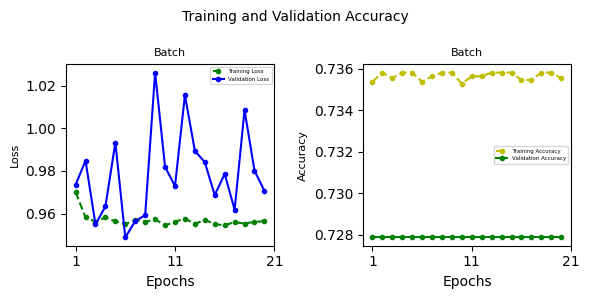

In [209]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(lossSmall) + 1), lossSmall, "g.--", label = "Training Loss")
plt.plot(range(1, len(lossSmall) + 1), valLossSmall, "b.-", label = "Validation Loss")
plt.suptitle("Training and Validation Loss: softplus and softmax", fontsize=10)
plt.title("Batch", fontsize=8)
plt.xlabel("Epochs")
plt.xticks(np.arange(1, len(lossSmall) + 2, 10))
plt.ylabel("Loss", fontsize = 8)
plt.legend(fontsize = 4)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(lossSmall) + 1), accSmall, "y.--", label = "Training Accuracy")
plt.plot(range(1, len(lossSmall) + 1), valAccSmall, "g.-", label = "Validation Accuracy")
plt.suptitle("Training and Validation Accuracy", fontsize=10)
plt.title("Batch", fontsize=8)
plt.xlabel("Epochs")
plt.xticks(np.arange(1, len(lossSmall) + 2, 10))
plt.ylabel("Accuracy", fontsize = 8)
plt.legend(fontsize = 4)

plt.tight_layout()
plt.show()


In [210]:
valSmall = min(valAccSmall)
errorSmall = 1 - valSmall

In [211]:
loss, accuracy, f1_scoreSmall, precisionSmall, recallSmall = modelSmallest.evaluate(xDeepTest_seq, deepYtest, verbose=0)

In [212]:
recallSmall

0.8327991366386414

In [213]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', 'Keras baseline: Softplus, Softmax, SGD', 'allActivities', 'binlabelRFMTO', valSmall, errorSmall, precisionSmall, recallSmall, f1_scoreSmall, '-']
cocurricularClassification

Data                               Algorithm  \
0              Imbalanced           Univariate LogisticRegression   
1              Imbalanced          Multinomial LogisticRegression   
2              Imbalanced                 Univariate DecisionTree   
3              Imbalanced                 Univariate DecisionTree   
4              Imbalanced                 Univariate DecisionTree   
5              Imbalanced                 Univariate DecisionTree   
6              Imbalanced                      TFIDF DecisionTree   
7              Imbalanced           TFIDF Multinomial Naive Bayes   
8              Imbalanced                     TFIDF Random Forest   
9              Imbalanced                           TFIDF XGBoost   
10   Oversampled Balanced                     TFIDF Random Forest   
11  Undersampled Balanced                     TFIDF Random Forest   
12             Imbalanced  Keras baseline: Softplus, Softmax, SGD   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   
12        allActivities  binlabelRFMTO             0.727857  0.272143   

    Weighted Precision  Weighted Recall  Weighted f1-Score Mean Absolute Error  
0             0.828373         0.813929           0.782983            0.186071  
1             0.695876         0.771786           0.713785              0.4325  
2                  NaN              NaN                NaN                 NaN  
3                  NaN              NaN                NaN                 NaN  
4                  NaN              NaN                NaN                 NaN  
5             0.650218         0.710000           0.674656            0.692143  
6             0.850044         0.846786           0.847844              0.2525  
7             0.812212         0.852143           0.823013            0.287857  
8             0.866157         0.875000           0.868205            0.211429  
9             0.868142         0.876786           0.871029            0.206071  
10            0.865753         0.870357           0.867061            0.212857  
11            0.865753         0.870357           0.867061            0.212857  
12            0.832799         0.832799           0.832799                   -

_[Table of Contents](#toc)_

<a id='overfitA'></a>
### 7.3 Model Overfitting >> A

To scale up the model, and to demonstrate over-fitting for the training and validation during the fit step.

For the scale-up step, two hidden layers will be used for deep learning,  improved activation functions will be used, and the layers will be made larger with greater output size. For the compile step, improved optimizers will be used, and for the fit step, larger batch sizes will be leveraged.

In [214]:
def modelBuildScale(L1, L2, L3, act1, act2, act3):
    
    '''
    Build the model, using three layers.
    The compile step can use different optimizers.
    The loss function will be 'categorical cross-entropy.
    Accuracy will be the metric used.
    '''
    
    modelSmallest = keras.Sequential ([
        layers.Dense(L1, activation = act1), # relu and selu
        layers.Dense(L2, activation = act2), # relu and selu
        layers.Dense(L3, activation = act3) # softmax
    ])

    modelSmallest.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m]) # only using RMSprop
    return modelSmallest

In [215]:
def modelTrainScale(model, epochs, batch_size):
    '''
    Train the model, using training data and training labels.
    Epochs and batch size defined when function is called.
    Validation data and validation labels then used to validate the model.
    Callback defined to print outputs every 20 epochs.
    '''

    return model.fit(xDeepTrain_seq, yDeepTrain, epochs = epochs, batch_size = batch_size, validation_data = (xDeepVal_seq, yDeepVal), verbose = 0, callbacks=[EpochOutput(interval = 10)])

In [216]:
def plotScale(phase, sub):
    '''
    Create two vertical plots showing the training and validation loss and accuracy.
    A super title details the loss versus accuracy results, and the title shows the batch size.
    '''

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(lossScaled) + 1), lossScaled, "g.--", label = "Training Loss")
    plt.plot(range(1, len(lossScaled) + 1), valLossScaled, "b.-", label = "Validation Loss")
    plt.suptitle("Training and Validation Loss: " + phase, fontsize=10)
    plt.title("Batch: " + sub, fontsize=8)
    plt.xlabel("Epochs")
    plt.xticks(np.arange(1, len(lossScaled) + 2, 10))
    plt.ylabel("Loss", fontsize = 8)
    plt.legend(fontsize = 4)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(lossScaled) + 1), accScaled, "y.--", label = "Training Accuracy")
    plt.plot(range(1, len(lossScaled) + 1), valAccScaled, "g.-", label = "Validation Accuracy")
    plt.suptitle("Training and Validation Accuracy: " + phase, fontsize=10)
    plt.title("Batch: " + sub, fontsize=8)
    plt.xlabel("Epochs")
    plt.xticks(np.arange(1, len(lossScaled) + 2, 10))
    plt.ylabel("Accuracy", fontsize = 8)
    plt.legend(fontsize = 4)

    plt.tight_layout()
    plt.show()

# Basesline code found on Stack Overflow, updated and modified for this requirement

class EpochOutput(Callback):
    def __init__(self, interval=10):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (int(epoch) % self.interval) == 0:
            print(
                f"Epoch: {epoch:>3}"
                + f" | Loss: {logs['loss']:.4e}"
                + f" | Accuracy: {logs['accuracy']:.4e}"
                + f" | Validation loss: {logs['val_loss']:.4e}"
                + f" | Validation accuracy: {logs['val_accuracy']:.4e}"
            )

**Iterative process** to evaluate the scaled up model:

- various output unit sizes for layers
- SELU versus ReLU activation functions
- number of epochs set to 40, since over-fitting always occurs by epoch 10
- various batch sizings

These evaluation criteria are defined in lists to allow the functions to iterate through each list to evaluate the model.

In [217]:
layer1 = [128, 128, 256, 256, 512, 512]
layer2 = [128, 128, 256, 256, 512, 512]
activation1 = ['relu', 'selu', 'relu', 'selu', 'relu', 'selu'] # first layer
activation2 = ['relu', 'selu', 'relu', 'selu', 'relu', 'selu'] # second layer
activation3 = ['softmax', 'softmax', 'softmax', 'softmax', 'softmax', 'softmax'] # activation layer
numEpochs = [40, 40, 40, 40, 40, 40]
batchSizing = [128, 128, 256, 256, 512, 512]


------------------------------------------------------------------------------------------------
STAGE: 0
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.2232e+00 | Accuracy: 7.2938e-01 | Validation loss: 9.2513e-01 | Validation accuracy: 7.2786e-01
Epoch:  10 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01
Epoch:  20 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01
Epoch:  30 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               18816     
                                                    

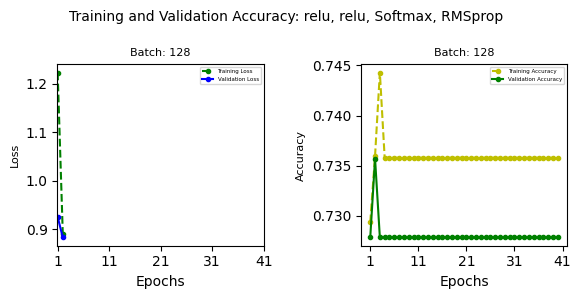


Minimum validation loss at: 3 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 1
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 2.4796e+00 | Accuracy: 6.6054e-01 | Validation loss: 3.5262e+00 | Validation accuracy: 5.2321e-01
Epoch:  10 | Loss: 4.1041e+00 | Accuracy: 5.3196e-01 | Validation loss: 6.1861e+00 | Validation accuracy: 3.7750e-01
Epoch:  20 | Loss: 2.8934e+00 | Accuracy: 6.0661e-01 | Validation loss: 3.7087e+00 | Validation accuracy: 5.4214e-01
Epoch:  30 | Loss: 4.2972e+00 | Accuracy: 5.2232e-01 | Validation loss: 8.7502e+00 | Validation accuracy: 2.0929e-01

Model: "sequential_2"
_________________________________________________________________
 Layer

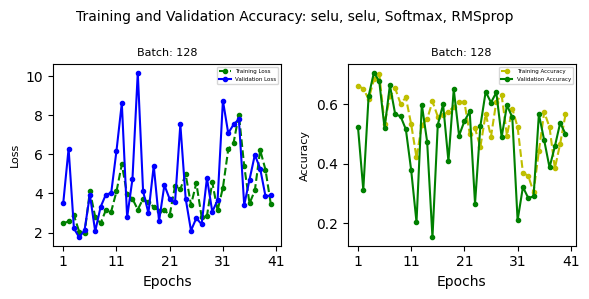


Minimum validation loss at: 4 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 2
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.5055e+00 | Accuracy: 7.2268e-01 | Validation loss: 9.5067e-01 | Validation accuracy: 7.2786e-01
Epoch:  10 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01
Epoch:  20 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01
Epoch:  30 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape       

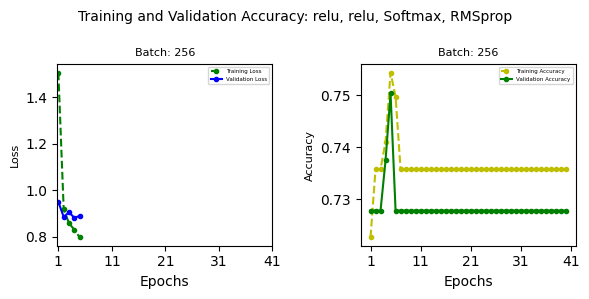


Minimum validation loss at: 6 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 3
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 2.6681e+00 | Accuracy: 6.2982e-01 | Validation loss: 9.6595e-01 | Validation accuracy: 7.2786e-01
Epoch:  10 | Loss: 9.5339e-01 | Accuracy: 7.3036e-01 | Validation loss: 1.3633e+00 | Validation accuracy: 7.2107e-01
Epoch:  20 | Loss: 2.4078e+00 | Accuracy: 6.5054e-01 | Validation loss: 1.5887e+00 | Validation accuracy: 7.0321e-01
Epoch:  30 | Loss: 1.2315e+00 | Accuracy: 7.5714e-01 | Validation loss: 2.2967e+00 | Validation accuracy: 6.7607e-01

Model: "sequential_4"
_________________________________________________________________
 Layer

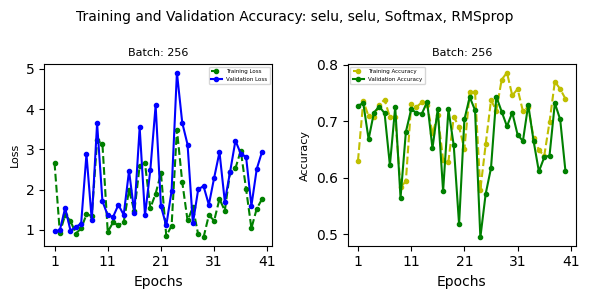


Minimum validation loss at: 1 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 4
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.5988e+00 | Accuracy: 7.0268e-01 | Validation loss: 9.3830e-01 | Validation accuracy: 7.2786e-01
Epoch:  10 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01
Epoch:  20 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01
Epoch:  30 | Loss: nan | Accuracy: 7.3580e-01 | Validation loss: nan | Validation accuracy: 7.2786e-01

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape       

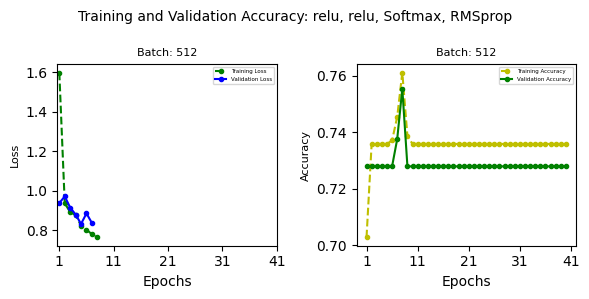


Minimum validation loss at: 8 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 5
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 1.2305e+01 | Accuracy: 1.1027e-01 | Validation loss: 1.2085e+01 | Validation accuracy: 9.7857e-02
Epoch:  10 | Loss: 9.4345e-01 | Accuracy: 7.4063e-01 | Validation loss: 1.0222e+00 | Validation accuracy: 7.4179e-01
Epoch:  20 | Loss: 1.0109e+00 | Accuracy: 7.6214e-01 | Validation loss: 1.5889e+00 | Validation accuracy: 7.4714e-01
Epoch:  30 | Loss: 1.2386e+00 | Accuracy: 7.5357e-01 | Validation loss: 1.5628e+00 | Validation accuracy: 7.4393e-01

Model: "sequential_6"
_________________________________________________________________
 Layer

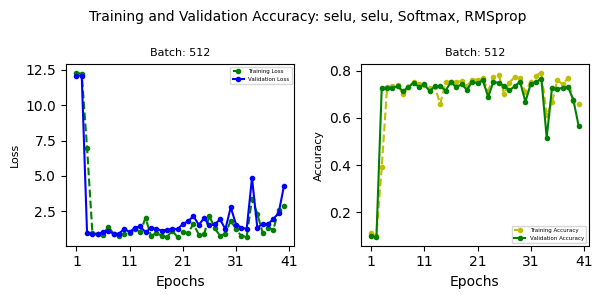


Minimum validation loss at: 5 epochs.

------------------------------------------------------------------------------------------------


In [218]:
epochsDict = {} # dictionary to store the minimum validation losses for each iteration loop

deepScaling = []

# the following code is my original code
for x in range(6):
    # Layer 1 outputs, Layer 2 outputs, Layer 3 outputs, Layer 1 activation, Layer 2 activation, Layer 3 activation, optimizer, model version
    model = modelBuildScale(layer1[x], layer2[x], 8, activation1[x], activation2[x], activation2[x])
    print("------------------------------------------------------------------------------------------------")
    print("STAGE: " + str(x))
    print("------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------")
    # model, epochs, batch size
    historyScaled = modelTrainScale(model, numEpochs[x], batchSizing[x])

    lossScaled = historyScaled.history["loss"]
    accScaled = historyScaled.history["accuracy"]
    valLossScaled = historyScaled.history["val_loss"]
    valAccScaled = historyScaled.history["val_accuracy"]
    epochs = range(1, len(lossScaled) + 1)

    print()
    model.summary()
    print()
    plotTitle = str(activation1[x]) + ", " + str(activation2[x]) + ", Softmax" +  ", RMSprop"
    batchSize = str(batchSizing[x])
    plotScale(plotTitle, batchSize)
    print()
    minValLoss = str(np.argmin(valLossScaled) + 1)
    maxValAcc = max(valAccScaled)
    minErrorLoss = 1 - maxValAcc

    loss, accuracy, f1scoreScaled, precisionScaled, recallScaled = model.evaluate(xDeepTest_seq, deepYtest, verbose=0)
    algo = "Keras scaled: " + activation1[x] + ", " + activation2[x] + ", " + activation3[x]
    
    rowDict = {'Data':'Imbalanced', 'Algorithm':algo, 'Co-Curricular':'allActivities', 'Label':'binlabelRFMTO', 'Prediction Accuracy':maxValAcc, 'Error':minErrorLoss, 'Weighted Precision':precisionScaled, 'Weighted Recall':recallScaled, 'Weighted f1-Score':f1scoreScaled, 'Mean Absolute Error':'-'}
    deepScaling.append(rowDict) # append returned accuracy score from each binary logistic regression model
    
    print("Minimum validation loss at: " + minValLoss + " epochs.")

    epochsDict["minValLoss{0}".format(x)] = minValLoss

    # minValLoss = str(np.argmin(valLossScaled) + 1)
    print()
    print("------------------------------------------------------------------------------------------------")

# print("Results: ", deepScaling)

In [219]:
scaledDeep = pd.DataFrame.from_dict(deepScaling)
scaledDeep

Data                          Algorithm  Co-Curricular  \
0  Imbalanced  Keras scaled: relu, relu, softmax  allActivities   
1  Imbalanced  Keras scaled: selu, selu, softmax  allActivities   
2  Imbalanced  Keras scaled: relu, relu, softmax  allActivities   
3  Imbalanced  Keras scaled: selu, selu, softmax  allActivities   
4  Imbalanced  Keras scaled: relu, relu, softmax  allActivities   
5  Imbalanced  Keras scaled: selu, selu, softmax  allActivities   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0  binlabelRFMTO             0.735714  0.264286            0.000000   
1  binlabelRFMTO             0.705714  0.294286            0.235403   
2  binlabelRFMTO             0.750357  0.249643            0.000000   
3  binlabelRFMTO             0.743571  0.256429            0.295623   
4  binlabelRFMTO             0.755357  0.244643            0.000000   
5  binlabelRFMTO             0.766786  0.233214            0.274000   

   Weighted Recall  Weighted f1-Score Mean Absolute Error  
0         0.000000           0.000000                   -  
1         0.664530           0.346817                   -  
2         0.000000           0.000000                   -  
3         0.679487           0.405849                   -  
4         0.000000           0.000000                   -  
5         0.515759           0.352001                   -

In [220]:
cocurricularClassification = pd.concat([cocurricularClassification, scaledDeep], ignore_index=True)
cocurricularClassification

Data                               Algorithm  \
0              Imbalanced           Univariate LogisticRegression   
1              Imbalanced          Multinomial LogisticRegression   
2              Imbalanced                 Univariate DecisionTree   
3              Imbalanced                 Univariate DecisionTree   
4              Imbalanced                 Univariate DecisionTree   
5              Imbalanced                 Univariate DecisionTree   
6              Imbalanced                      TFIDF DecisionTree   
7              Imbalanced           TFIDF Multinomial Naive Bayes   
8              Imbalanced                     TFIDF Random Forest   
9              Imbalanced                           TFIDF XGBoost   
10   Oversampled Balanced                     TFIDF Random Forest   
11  Undersampled Balanced                     TFIDF Random Forest   
12             Imbalanced  Keras baseline: Softplus, Softmax, SGD   
13             Imbalanced       Keras scaled: relu, relu, softmax   
14             Imbalanced       Keras scaled: selu, selu, softmax   
15             Imbalanced       Keras scaled: relu, relu, softmax   
16             Imbalanced       Keras scaled: selu, selu, softmax   
17             Imbalanced       Keras scaled: relu, relu, softmax   
18             Imbalanced       Keras scaled: selu, selu, softmax   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   
12        allActivities  binlabelRFMTO             0.727857  0.272143   
13        allActivities  binlabelRFMTO             0.735714  0.264286   
14        allActivities  binlabelRFMTO             0.705714  0.294286   
15        allActivities  binlabelRFMTO             0.750357  0.249643   
16        allActivities  binlabelRFMTO             0.743571  0.256429   
17        allActivities  binlabelRFMTO             0.755357  0.244643   
18        allActivities  binlabelRFMTO             0.766786  0.233214   

    Weighted Precision  Weighted Recall  Weighted f1-Score Mean Absolute Error  
0             0.828373         0.813929           0.782983            0.186071  
1             0.695876         0.771786           0.713785              0.4325  
2                  NaN              NaN                NaN                 NaN  
3                  NaN              NaN                NaN                 NaN  
4                  NaN              NaN                NaN                 NaN  
5             0.650218         0.710000           0.674656            0.692143  
6             0.850044         0.846786           0.847844              0.2525  
7             0.812212         0.852143           0.823013            0.287857  
8             0.866157         0.875000           0.868205            0.211429  
9             0.868142         0.876786           0.871029            0.206071  
10            0.865753         0.870357           0.867061            0.212857  
11            0.865753         0.870357           0.867061            0.212857  
12            0.832799         0.832799           0.832799                   -  
13            0.000000         0.000000      

_[Table of Contents](#toc)_

<a id='overfitB'></a>
### 7.3 Model Overfitting >> B

In [221]:
layer1 = [128, 256, 512, 512]
layer2 = [128, 256, 512, 512]
activation1 = ['tanh', 'selu', 'tanh'] # first layer
activation2 = ['selu', 'tanh', 'tanh'] # second layer
activation3 = ['softmax', 'softmax', 'softmax'] # activation layer
numEpochs = [40, 40, 40]
batchSizing = [128, 256, 512]

------------------------------------------------------------------------------------------------
STAGE: 0
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 4.8906e+00 | Accuracy: 4.4268e-01 | Validation loss: 5.5892e+00 | Validation accuracy: 1.9929e-01
Epoch:  10 | Loss: 9.3600e+00 | Accuracy: 7.9018e-02 | Validation loss: 1.0285e+01 | Validation accuracy: 7.8571e-02
Epoch:  20 | Loss: 4.5636e+00 | Accuracy: 3.0321e-01 | Validation loss: 4.2657e+00 | Validation accuracy: 3.0250e-01
Epoch:  30 | Loss: 6.9546e+00 | Accuracy: 1.4679e-01 | Validation loss: 7.5782e+00 | Validation accuracy: 9.3214e-02

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               18816     
           

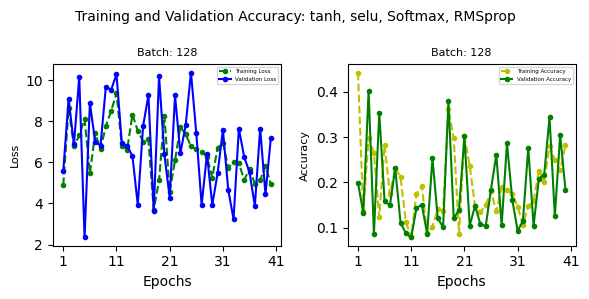


Minimum validation loss at: 5 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 1
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 9.2081e+00 | Accuracy: 8.8482e-02 | Validation loss: 9.8994e+00 | Validation accuracy: 7.1786e-02
Epoch:  10 | Loss: 7.6710e+00 | Accuracy: 2.2321e-01 | Validation loss: 1.1874e+01 | Validation accuracy: 3.5286e-01
Epoch:  20 | Loss: 7.5517e+00 | Accuracy: 1.1518e-01 | Validation loss: 7.5570e+00 | Validation accuracy: 1.2464e-01
Epoch:  30 | Loss: 8.9817e+00 | Accuracy: 3.6759e-01 | Validation loss: 8.4548e+00 | Validation accuracy: 4.9857e-01

Model: "sequential_8"
_________________________________________________________________
 Layer

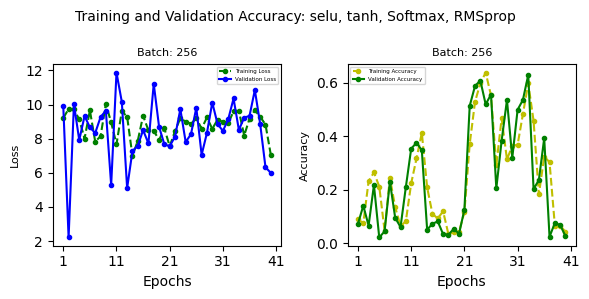


Minimum validation loss at: 2 epochs.

------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
STAGE: 2
------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
Epoch:   0 | Loss: 9.3532e+00 | Accuracy: 4.6821e-01 | Validation loss: 1.2920e+01 | Validation accuracy: 6.6357e-01
Epoch:  10 | Loss: 1.1778e+01 | Accuracy: 6.9259e-01 | Validation loss: 1.1351e+01 | Validation accuracy: 6.6143e-01
Epoch:  20 | Loss: 1.2362e+01 | Accuracy: 7.3509e-01 | Validation loss: 1.2244e+01 | Validation accuracy: 7.2714e-01
Epoch:  30 | Loss: 1.2361e+01 | Accuracy: 7.3509e-01 | Validation loss: 1.2244e+01 | Validation accuracy: 7.2714e-01

Model: "sequential_9"
_________________________________________________________________
 Layer

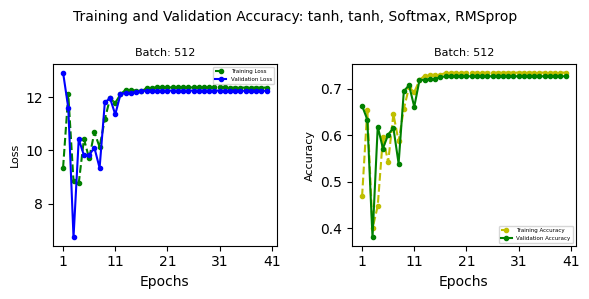


Minimum validation loss at: 3 epochs.

------------------------------------------------------------------------------------------------


In [222]:
epochsDict = {} # dictionary to store the minimum validation losses for each iteration loop

deepScaling2 = []
# the following code is my original code
for x in range(3):
    # Layer 1 outputs, Layer 2 outputs, Layer 3 outputs, Layer 1 activation, Layer 2 activation, Layer 3 activation, optimizer, model version
    model = modelBuildScale(layer1[x], layer2[x], 8, activation1[x], activation2[x], activation2[x])
    print("------------------------------------------------------------------------------------------------")
    print("STAGE: " + str(x))
    print("------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------")
    # model, epochs, batch size
    historyScaled = modelTrainScale(model, numEpochs[x], batchSizing[x])

    lossScaled = historyScaled.history["loss"]
    accScaled = historyScaled.history["accuracy"]
    valLossScaled = historyScaled.history["val_loss"]
    valAccScaled = historyScaled.history["val_accuracy"]
    epochs = range(1, len(lossScaled) + 1)

    print()
    model.summary()
    print()
    plotTitle = str(activation1[x]) + ", " + str(activation2[x]) + ", Softmax" +  ", RMSprop"
    batchSize = str(batchSizing[x])
    plotScale(plotTitle, batchSize)
    print()
    minValLoss = str(np.argmin(valLossScaled) + 1)

    loss, accuracy, f1scoreScaled, precisionScaled, recallScaled = model.evaluate(xDeepTest_seq, deepYtest, verbose=0)
    algo = "Keras scaled: " + activation1[x] + ", " + activation2[x] + ", " + activation3[x]
    
    rowDict = {'Data':'Imbalanced', 'Algorithm':algo, 'Co-Curricular':'allActivities', 'Label':'binlabelRFMTO', 'Prediction Accuracy':maxValAcc, 'Error':minErrorLoss, 'Weighted Precision':precisionScaled, 'Weighted Recall':recallScaled, 'Weighted f1-Score':f1scoreScaled, 'Mean Absolute Error':'-'}
    deepScaling2.append(rowDict) # append returned accuracy score from each binary logistic regression model
    
    print("Minimum validation loss at: " + minValLoss + " epochs.")

    epochsDict["minValLoss{0}".format(x)] = minValLoss

    minValLoss = str(np.argmin(valLossScaled) + 1)
    print()
    print("------------------------------------------------------------------------------------------------")


In [223]:
scaledDeep2 = pd.DataFrame.from_dict(deepScaling2)
scaledDeep2

Data                          Algorithm  Co-Curricular  \
0  Imbalanced  Keras scaled: tanh, selu, softmax  allActivities   
1  Imbalanced  Keras scaled: selu, tanh, softmax  allActivities   
2  Imbalanced  Keras scaled: tanh, tanh, softmax  allActivities   

           Label  Prediction Accuracy     Error  Weighted Precision  \
0  binlabelRFMTO             0.766786  0.233214            0.087587   
1  binlabelRFMTO             0.766786  0.233214            0.057654   
2  binlabelRFMTO             0.766786  0.233214            0.214009   

   Weighted Recall  Weighted f1-Score Mean Absolute Error  
0         0.313568           0.136856                   -  
1         0.208066           0.090241                   -  
2         0.855769           0.342393                   -

In [224]:
cocurricularClassification = pd.concat([cocurricularClassification, scaledDeep2], ignore_index=True)
cocurricularClassification

Data                               Algorithm  \
0              Imbalanced           Univariate LogisticRegression   
1              Imbalanced          Multinomial LogisticRegression   
2              Imbalanced                 Univariate DecisionTree   
3              Imbalanced                 Univariate DecisionTree   
4              Imbalanced                 Univariate DecisionTree   
5              Imbalanced                 Univariate DecisionTree   
6              Imbalanced                      TFIDF DecisionTree   
7              Imbalanced           TFIDF Multinomial Naive Bayes   
8              Imbalanced                     TFIDF Random Forest   
9              Imbalanced                           TFIDF XGBoost   
10   Oversampled Balanced                     TFIDF Random Forest   
11  Undersampled Balanced                     TFIDF Random Forest   
12             Imbalanced  Keras baseline: Softplus, Softmax, SGD   
13             Imbalanced       Keras scaled: relu, relu, softmax   
14             Imbalanced       Keras scaled: selu, selu, softmax   
15             Imbalanced       Keras scaled: relu, relu, softmax   
16             Imbalanced       Keras scaled: selu, selu, softmax   
17             Imbalanced       Keras scaled: relu, relu, softmax   
18             Imbalanced       Keras scaled: selu, selu, softmax   
19             Imbalanced       Keras scaled: tanh, selu, softmax   
20             Imbalanced       Keras scaled: selu, tanh, softmax   
21             Imbalanced       Keras scaled: tanh, tanh, softmax   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   
12        allActivities  binlabelRFMTO             0.727857  0.272143   
13        allActivities  binlabelRFMTO             0.735714  0.264286   
14        allActivities  binlabelRFMTO             0.705714  0.294286   
15        allActivities  binlabelRFMTO             0.750357  0.249643   
16        allActivities  binlabelRFMTO             0.743571  0.256429   
17        allActivities  binlabelRFMTO             0.755357  0.244643   
18        allActivities  binlabelRFMTO             0.766786  0.233214   
19        allActivities  binlabelRFMTO             0.766786  0.233214   
20        allActivities  binlabelRFMTO             0.766786  0.233214   
21        allActivities  binlabelRFMTO             0.766786  0.233214   

    Weighted Precision  Weighted Recall  Weighted f1-Score Mean Absolute Error  
0             0.828373         0.813929           0.782983            0.186071  
1             0.695876         0.771786           0.713785              0.4325  
2                  NaN              NaN                NaN                 NaN  
3                  NaN              NaN                NaN                 NaN  
4                  NaN              NaN                NaN                 NaN  
5             0.650218         0.710000           0.674656            0.692143  
6             0.850044         0.846786           0.847844              0.2525  
7             0.812212         0.852143           0.823013            0.287857  
8             0.866157  

_[Table of Contents](#toc)_

In [225]:
# input_ = layers.Input(shape = xDeepTrain_seq[0,:].shape, name='input')

# # Embedding layer (vocab size plus 1), using the pre-trained emb_matrix obtained from Word2Vec

# x = layers.Embedding(vocabLen + 1, emb_size, weights=[emb_matrix], trainable = False, name = 'embedding')(input_)
# x = layers.Bidirectional(layers.LSTM(15, dropout = 0.2), name = 'bidirectional-lstm')(x) # LSTM layer
# x = layers.Dropout(0.2, name = 'dropout')(x)
# x = layers.Dense(64, activation = 'relu', name = 'dense')(x)
# output = layers.Dense(numCategories, activation = 'softmax', name = 'classification')(x)

# modelLSTM = models.Model(input_, output)

# opt = optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9)
# modelLSTM.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])

In [226]:
# modelLSTM.summary()

In [227]:
# start_time = datetime.now()
# historyLSTM = modelLSTM.fit(xDeepTrain_seq, yDeepTrain, batch_size=64, shuffle=True, epochs = 40, validation_data = (xDeepVal_seq, yDeepVal), verbose = 0, callbacks=[EpochOutput(interval = 10)])
# end_time = datetime.now()

In [228]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# ax[0].set(title='Loss')
# ax[0].plot(historyLSTM.history['loss'], label='Training')
# ax[0].plot(historyLSTM.history['val_loss'], label='Validation')
# ax[0].legend(loc="upper right")

# ax[1].set(title='Accuracy')
# ax[1].plot(historyLSTM.history['accuracy'], label='Training')
# ax[1].plot(historyLSTM.history['val_accuracy'], label='Validation')
# ax[1].legend(loc="lower right")

In [229]:
# lossLSTM = historyLSTM.history["loss"]
# accLSTM = historyLSTM.history["accuracy"]
# valLossLSTM = historyLSTM.history["val_loss"]
# valAccLSTM = historyLSTM.history["val_accuracy"]
# valLSTM = max(valAccLSTM)
# loss, accuracy, f1scoreLSTM, precisionLSTM, recallLSTM = modelLSTM.evaluate(xDeepVal_seq, yDeepVal, verbose=0)
# errLSTM = 1 - valLSTM
# algo = "Keras scaled: LSTM"

In [230]:
# cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', algo, 'allActivities', 'binlabelRFMTO', valLSTM, errLSTM, precisionLSTM, recallLSTM, f1scoreLSTM, '-']
# cocurricularClassification

In [231]:
# feature_scores = pd.Series(rfCLF.feature_importances_, index = X_train.columns).sort_values(ascending=False)

# feature_scores

_[Table of Contents](#toc)_

<a id='embedding'></a>
### 7.4 Categorical Embedding

In [232]:
studentTFIDF

Exclusions Postal       Constituent                 Faculty  \
0        Contact     T2           Alumnus          Public Affairs   
1        Contact     K1  Alumnus Employee          Public Affairs   
2        Contact     K1           Alumnus    Engineering & Design   
3        Contact     J9           Alumnus      School of Business   
4        Contact     K2           Alumnus      School of Business   
...          ...    ...               ...                     ...   
17709    Contact     K1           Alumnus  Arts & Social Sciences   
17710    Contact     K1           Alumnus  Arts & Social Sciences   
17711    Contact     S7           Alumnus          Public Affairs   
17712    Contact     N0           Alumnus          Public Affairs   
17713    Contact     J8           Alumnus          Public Affairs   

                        Degree                     FirstArea  \
0             Bachelor of Arts                     Athletics   
1             Bachelor of Arts                          None   
2      Bachelor of Engineering  Faculty:Engineering & Design   
3         Bachelor of Commerce                          None   
4         Bachelor of Commerce                          None   
...                        ...                           ...   
17709                 Master's                          None   
17710                 Master's                          None   
17711                 Master's                          None   
17712                 Master's                          None   
17713                 Master's                          None   

      FirstSolicitation      LargestArea LargestSolicitation  \
0                 Email        Athletics               Email   
1                  None             None                None   
2                  Levy  University Wide               Email   
3                  None             None                None   
4                  None             None                None   
...                 ...              ...                 ...   
17709              None             None                None   
17710              None             None                None   
17711              None             None                None   
17712              None             None                None   
17713              None             None                None   

                                             allAnalyzed  \
0      academic success academic success athletics an...   
1      academic success academic success academic suc...   
2      academic success academic success clubs/societ...   
3      leadership and development student government ...   
4      clubs/societies/associations leadership and de...   
...                                                  ...   
17709       volunteer/ambassadors school of linguistics    
17710       volunteer/ambassadors school of linguistics    
17711  volunteer/ambassadors school of public policy ...   
17712  volunteer/ambassadors school of public policy ...   
17713  volunteer/ambassadors school of public policy ...   

                                          allCategorical  
0      Contact T2 Alumnus Public Affairs Bachelor of ...  
1      Contact K1 Alumnus Employee Public Affairs Bac...  
2      Contact K1 Alumnus Engineering & Design Bachel...  
3      Contact J9 Alumnus School of Business Bachelor...  
4      Contact K2 Alumnus School of Business Bachelor...  
...                                                  ...  
17709  Contact K1 Alumnus Arts & Social Sciences Mast...  
17710  Contact K1 Alumnus Arts & Social Sciences Mast...  
17711  Contact S7 Alumnus Public Affairs Master's Non...  
17712  Contact N0 Alumnus Public Affairs Master's Non...  
17713  Contact J8 Alumnus Public Affairs Master's Non...  

[17714 rows x 11 columns]

In [233]:
exclusion_dummies = pd.get_dummies(studentTFIDF['Exclusions'], dtype='int')
faculty_dummies = pd.get_dummies(studentTFIDF['Faculty'], dtype='int')
degree_dummies = pd.get_dummies(studentTFIDF['Degree'], dtype='int')
largest_dummies = pd.get_dummies(studentTFIDF['LargestArea'], dtype='int')
largestSol_dummies = pd.get_dummies(studentTFIDF['LargestSolicitation'], dtype='int')

In [234]:
deepAnalyses = pd.concat([studentTFIDF, exclusion_dummies, faculty_dummies, degree_dummies, largest_dummies, largestSol_dummies], axis = 1).drop(['Exclusions', 'Postal', 'Constituent', 'Faculty', 'Degree', 'FirstArea',
       'FirstSolicitation', 'LargestArea', 'LargestSolicitation', 'allCategorical'], axis = 1)
deepAnalyses.head()

allAnalyzed  Contact  Do Not Contact  \
0  academic success academic success athletics an...        1               0   
1  academic success academic success academic suc...        1               0   
2  academic success academic success clubs/societ...        1               0   
3  leadership and development student government ...        1               0   
4  clubs/societies/associations leadership and de...        1               0   

   Do Not Solicit  Arts & Social Sciences  Engineering & Design  NotGraduated  \
0               0                       0                     0             0   
1               0                       0                     0             0   
2               0                       0                     1             0   
3               0                       0                     0             0   
4               0                       0                     0             0   

   Public Affairs  School of Business  Science  Bachelor of Arts  \
0               1                   0        0                 1   
1               1                   0        0                 1   
2               0                   0        0                 0   
3               0                   1        0                 0   
4               0                   1        0                 0   

   Bachelor of Commerce  Bachelor of Engineering  Bachelor of Science  \
0                     0                        0                    0   
1                     0                        0                    0   
2                     0                        1                    0   
3                     1                        0                    0   
4                     1                        0                    0   

   Diploma or Certificate  Master's  NotGraduated  PHD  Athletics  \
0                       0         0             0    0          1   
1                       0         0             0    0          0   
2                       0         0             0    0          0   
3                       0         0             0    0          0   
4                       0         0             0    0          0   

   Eric Sprott School of Business  Faculty:Arts & Social Sciences  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Faculty:Engineering & Design  Faculty:Public Affairs  Faculty:Science  \
0                             0                       0                0   
1                             0                       0                0   
2                             0                       0                0   
3                             0                       0                0   
4                             0                       0                0   

   Library  None  University Wide  Direct Mail  Email  Levy  None  Other  \
0        0     0                0            0      1     0     0      0   
1        0     1                0            0      0     0     1      0   
2        0     0                1            0      1     0     0      0   
3        0     1                0            0      0     0     1      0   
4        0     1                0            0      0     0     1      0   

   Personal  Telephone  Unsolicited  
0         0          0            0  
1         0          0            0  
2         0          0            0  
3         0          0            0  
4         0          0            0

In [235]:
deepAnalyses = deepAnalyses.rename(columns = {'Master\'s': 'Masters'})

In [236]:
# assign X data
X = deepAnalyses.iloc[:, 0:].copy()

In [237]:
# split training data, and final test data
X_train, X_test, y_train, y_test = train_test_split(X, deepLabels, test_size = 0.2, random_state=42)

In [238]:
# split training data, into training and validation data
X_trainTrain, X_val, y_trainTrain, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [239]:
# confirm the number of records in training and testing dataset.
print(f'The training dataset has {X_trainTrain.shape[0]} records and {X_trainTrain.shape[1]} columns.')
print(f'The testing dataset has {len(X_val)} records.')

The training dataset has 11336 records and 35 columns.
The testing dataset has 2835 records.


In [240]:
# list for the training data
input_list_train = []

# list for the testing data
input_list_val = []

# categorical encoder dictionary
cat_encoder = {}

# identify unique values for the categorical variable
unique_cat = np.unique(X_train['allAnalyzed'])

# number of unique values in the categorical variable
print(f'There are {len(unique_cat)} unique activities in the training dataset.\n')

# encode the categorical variable
for i in range(len(unique_cat)):
  cat_encoder[unique_cat[i]] = i

# Take a look at the encoder
# cat_encoder

There are 7296 unique activities in the training dataset.



In [241]:
# append the values to the input list
input_list_train.append(X_trainTrain['allAnalyzed'].map(cat_encoder).values)
input_list_val.append(X_val['allAnalyzed'].map(cat_encoder).values)

# review the data
print('input_list_train:', input_list_train)
print('input_list_val:', input_list_val)

input_list_train: [array([5228, 1932, 4784, ...,   29, 4358, 4816], dtype=int64)]
input_list_val: [array([5228, 3945, 2828, ..., 4888, 1117,  205], dtype=int64)]


In [242]:
# unique values in the categorical column
n_unique_cat = len(unique_cat)

# input dimension of the categorical variable
input_cat = Input(shape=(1,))

# output dimension of the categorical entity embedding (8 bin labels)
cat_emb_dim = 8

# embedding layer
emb_cat = Embedding(input_dim=n_unique_cat, output_dim=cat_emb_dim, name="embedding_cat")(input_cat)

# confirm the output shape
print(emb_cat)

# reshape embedding layer
emb_cat = Reshape(target_shape=(cat_emb_dim, ))(emb_cat)

# confirm the output shape
print(emb_cat)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 8), dtype=tf.float32, name=None), name='embedding_cat/embedding_lookup/Identity:0', description="created by layer 'embedding_cat'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")


In [243]:
# list of numerical columns
numeric_cols = ['Contact', 'Do Not Contact', 'Do Not Solicit',
       'Arts & Social Sciences', 'Engineering & Design', 'NotGraduated',
       'Public Affairs', 'School of Business', 'Science', 'Bachelor of Arts',
       'Bachelor of Commerce', 'Bachelor of Engineering',
       'Bachelor of Science', 'Diploma or Certificate', 'Masters',
       'NotGraduated', 'PHD', 'Athletics', 'Eric Sprott School of Business',
       'Faculty:Arts & Social Sciences', 'Faculty:Engineering & Design',
       'Faculty:Public Affairs', 'Faculty:Science', 'Library', 'None',
       'University Wide', 'Direct Mail', 'Email', 'Levy', 'None', 'Other',
       'Personal', 'Telephone', 'Unsolicited']

# append numerical columns to the training and testing list
input_list_train.append(X_trainTrain[numeric_cols].values)
input_list_val.append(X_val[numeric_cols].values)

#n review the data
print('input_list_train:', input_list_train)
print('input_list_test:', input_list_val)

input_list_train: [array([5228, 1932, 4784, ...,   29, 4358, 4816], dtype=int64), array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])]
input_list_test: [array([5228, 3945, 2828, ..., 4888, 1117,  205], dtype=int64), array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])]


In [244]:
# input dimension of the numeric variables
input_numeric = Input(shape=38)

# output dimension of the numeric variables
emb_numeric = input_numeric

# review the output dimension
emb_numeric

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'input_2')>

In [245]:
# input data dimensions
input_data = [input_cat, input_numeric]

# review the data
input_data

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'input_2')>]

In [246]:
# embedding dimensions
emb_data = [emb_cat, emb_numeric]

# review the data
emb_data

[<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'reshape')>,
 <KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'input_2')>]

In [247]:
# the concatenate layer concatenates a list of inputs
model_data = Concatenate()(emb_data)

# review the data
model_data

<KerasTensor: shape=(None, 46) dtype=float32 (created by layer 'concatenate')>

_[Table of Contents](#toc)_

<a id='embeddingA'></a>
### 7.4 Categorical Model >> A

In [248]:
# Basesline code found on Stack Overflow, updated and modified for this requirement

class EpochOutput(Callback):
    def __init__(self, interval=10):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (int(epoch) % self.interval) == 0:
            print(
                f"Epoch: {epoch:>3}"
                + f" | Loss: {logs['loss']:.4e}"
                + f" | MAE: {logs['mae']:.4e}"
                + f" | Validation loss: {logs['val_loss']:.4e}"
                + f" | Validation MAE: {logs['val_mae']:.4e}"
            )

In [249]:
# dense layer with 10 neurons and relu activation function
model = Dense(10, activation = 'relu')(model_data)
# dense layer with 5 neurons and relu activation function
model = Dense(5, activation = 'relu')(model)
# dense layer with 2 neurons and relu activation function
model = Dense(2, activation = 'relu')(model)
# output is linear
outputs = Dense(1, activation = 'linear')(model)

# apply model to group layers into an object with training and inference features
modelCatA = Model(inputs = input_data, outputs = outputs, name ='EntityEmbeddingModel')

# Print out the model summary
modelCatA.summary()

Model: "EntityEmbeddingModel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_cat (Embedding)   (None, 1, 8)                 58368     ['input_1[0][0]']             
                                                                                                  
 reshape (Reshape)           (None, 8)                    0         ['embedding_cat[0][0]']       
                                                                                                  
 input_2 (InputLayer)        [(None, 38)]                 0         []                            
                                                                               

In [250]:
# compile model
modelCatA.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae', 'accuracy', f1_m, precision_m, recall_m])

# Set up early stopping
# es = EarlyStopping(monitor='val_loss', 
#                    mode='min', 
#                    verbose=1, 
#                    patience=50,
#                    restore_best_weights=True)

# fit the model
historyCatA  =  modelCatA.fit(input_list_train, y_trainTrain, validation_data=(input_list_val, y_val), epochs=100, batch_size=64, verbose = 0, callbacks=[EpochOutput(interval = 10)])

Epoch:   0 | Loss: 2.2067e+00 | MAE: 8.4632e-01 | Validation loss: 4.0852e-01 | Validation MAE: 3.1601e-01
Epoch:  10 | Loss: 1.1204e-01 | MAE: 1.0973e-01 | Validation loss: 3.6370e-01 | Validation MAE: 2.6137e-01
Epoch:  20 | Loss: 9.9587e-02 | MAE: 1.0533e-01 | Validation loss: 3.6453e-01 | Validation MAE: 2.6820e-01
Epoch:  30 | Loss: 9.4018e-02 | MAE: 1.0245e-01 | Validation loss: 3.6773e-01 | Validation MAE: 2.7694e-01
Epoch:  40 | Loss: 9.0840e-02 | MAE: 1.0301e-01 | Validation loss: 3.6463e-01 | Validation MAE: 2.7008e-01
Epoch:  50 | Loss: 8.7885e-02 | MAE: 1.0035e-01 | Validation loss: 3.6454e-01 | Validation MAE: 2.7359e-01
Epoch:  60 | Loss: 8.5788e-02 | MAE: 9.6311e-02 | Validation loss: 3.6475e-01 | Validation MAE: 2.6750e-01
Epoch:  70 | Loss: 8.3048e-02 | MAE: 9.3092e-02 | Validation loss: 3.6908e-01 | Validation MAE: 2.7138e-01
Epoch:  80 | Loss: 8.2450e-02 | MAE: 9.2370e-02 | Validation loss: 3.7137e-01 | Validation MAE: 2.7093e-01
Epoch:  90 | Loss: 8.0706e-02 | MAE: 

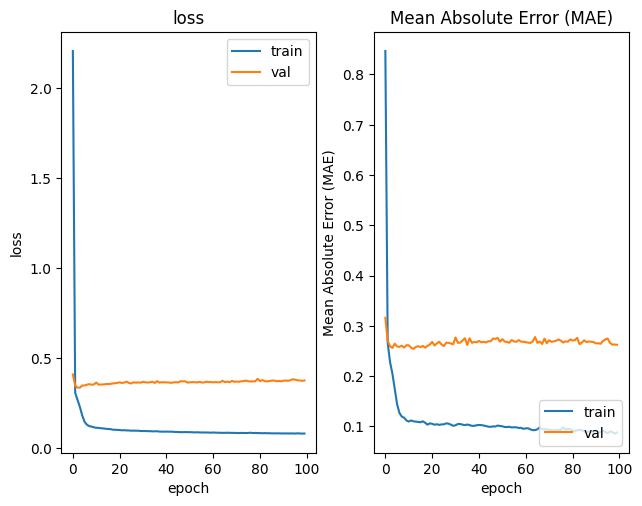

In [251]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

# summarize history for loss
ax1.plot(historyCatA.history['loss'])
ax1.plot(historyCatA.history['val_loss'])
ax1.set_title('loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper right')

# summarize history for mae
ax2.plot(historyCatA.history['mae'])
ax2.plot(historyCatA.history['val_mae'])
ax2.set_title('Mean Absolute Error (MAE)')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='lower right')

In [252]:
# summarize history for mae
# plt.plot(history.history['mae'])
# plt.plot(history.history['val_mae'])
# plt.title('Mean Absolute Error (MAE)')
# plt.ylabel('Mean Absolute Error (MAE)')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='lower right')
# plt.show()

In [253]:
valmaeCatA = historyCatA.history["val_mae"]
valAccCatA = historyCatA.history["val_accuracy"]
maeCatA = min(valmaeCatA)
accCatA = max(valAccCatA)
# loss, accuracy, f1scoreCatA, precisionCatA, recallCatA = modelCatA.evaluate(X_val, y_val, verbose=0)
errCatA = 1 - accCatA
algo = "Keras: Catgorical Embedding + Concatenation"

In [254]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', algo, 'allActivities', 'binlabelRFMTO', accCatA, errCatA, '-', '-', '-', maeCatA]
cocurricularClassification

Data                                    Algorithm  \
0              Imbalanced                Univariate LogisticRegression   
1              Imbalanced               Multinomial LogisticRegression   
2              Imbalanced                      Univariate DecisionTree   
3              Imbalanced                      Univariate DecisionTree   
4              Imbalanced                      Univariate DecisionTree   
5              Imbalanced                      Univariate DecisionTree   
6              Imbalanced                           TFIDF DecisionTree   
7              Imbalanced                TFIDF Multinomial Naive Bayes   
8              Imbalanced                          TFIDF Random Forest   
9              Imbalanced                                TFIDF XGBoost   
10   Oversampled Balanced                          TFIDF Random Forest   
11  Undersampled Balanced                          TFIDF Random Forest   
12             Imbalanced       Keras baseline: Softplus, Softmax, SGD   
13             Imbalanced            Keras scaled: relu, relu, softmax   
14             Imbalanced            Keras scaled: selu, selu, softmax   
15             Imbalanced            Keras scaled: relu, relu, softmax   
16             Imbalanced            Keras scaled: selu, selu, softmax   
17             Imbalanced            Keras scaled: relu, relu, softmax   
18             Imbalanced            Keras scaled: selu, selu, softmax   
19             Imbalanced            Keras scaled: tanh, selu, softmax   
20             Imbalanced            Keras scaled: selu, tanh, softmax   
21             Imbalanced            Keras scaled: tanh, tanh, softmax   
22             Imbalanced  Keras: Catgorical Embedding + Concatenation   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   
12        allActivities  binlabelRFMTO             0.727857  0.272143   
13        allActivities  binlabelRFMTO             0.735714  0.264286   
14        allActivities  binlabelRFMTO             0.705714  0.294286   
15        allActivities  binlabelRFMTO             0.750357  0.249643   
16        allActivities  binlabelRFMTO             0.743571  0.256429   
17        allActivities  binlabelRFMTO             0.755357  0.244643   
18        allActivities  binlabelRFMTO             0.766786  0.233214   
19        allActivities  binlabelRFMTO             0.766786  0.233214   
20        allActivities  binlabelRFMTO             0.766786  0.233214   
21        allActivities  binlabelRFMTO             0.766786  0.233214   
22        allActivities  binlabelRFMTO             0.742857  0.257143   

   Weighted Precision Weighted Recall Weighted f1-Score Mean Absolute Error  
0            0.828373        0.813929          0.782983            0.186071  
1            0.695876        0.771786          0.713785              0.4325  
2                 NaN             NaN               NaN                 NaN  
3                 NaN             NaN               NaN                 NaN  
4                 NaN             NaN               NaN                 NaN  
5            0.650218  

_[Table of Contents](#toc)_

<a id='embeddingB'></a>
### 7.4 Categorical Model >> B

In [255]:
# Dense layer with 10 neurons and relu activation function
model = Dense(38, activation = 'relu')(model_data)
# Dense layer with 5 neurons and relu activation function
model = Dense(38, activation = 'relu')(model)
# Dense layer with 2 neurons and relu activation function
model = Dense(16, activation = 'relu')(model)
# Output is linear
outputs = Dense(8, activation = 'softmax')(model)

# Use Model to group layers into an object with training and inference features
modelCatB = Model(inputs = input_data, outputs = outputs, name ='Entity_embedding_model_keras')

# Print out the model summary
modelCatB.summary()

Model: "Entity_embedding_model_keras"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_cat (Embedding)   (None, 1, 8)                 58368     ['input_1[0][0]']             
                                                                                                  
 reshape (Reshape)           (None, 8)                    0         ['embedding_cat[0][0]']       
                                                                                                  
 input_2 (InputLayer)        [(None, 38)]                 0         []                            
                                                                       

In [256]:
# compile model
# nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelCatB.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae', 'accuracy', f1_m, precision_m, recall_m])

# fit the model
historyCatB  =  modelCatB.fit(input_list_train, y_trainTrain, validation_data=(input_list_val, y_val), epochs=100, batch_size=64, verbose = 0, callbacks=[EpochOutput(interval = 10)])

Epoch:   0 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  10 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  20 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  30 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  40 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  50 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  60 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  70 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  80 | Loss: 4.0164e+00 | MAE: 1.5255e+00 | Validation loss: 4.3305e+00 | Validation MAE: 1.5854e+00
Epoch:  90 | Loss: 4.0164e+00 | MAE: 

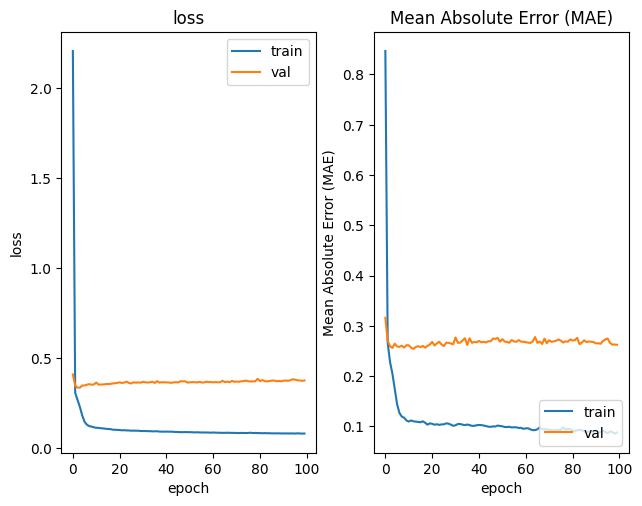

In [257]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

# summarize history for loss
ax1.plot(historyCatA.history['loss'])
ax1.plot(historyCatA.history['val_loss'])
ax1.set_title('loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper right')

# summarize history for mae
ax2.plot(historyCatA.history['mae'])
ax2.plot(historyCatA.history['val_mae'])
ax2.set_title('Mean Absolute Error (MAE)')
ax2.set_ylabel('Mean Absolute Error (MAE)')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='lower right')

In [258]:
valmaeCatB = historyCatB.history["val_mae"]
valAccCatB = historyCatB.history["val_accuracy"]
maeCatB = min(valmaeCatB)
accCatB = max(valAccCatB)
errCatB = 1 - accCatB
algo = "Keras: Catgorical Embedding + Concatenation"

In [259]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', algo, 'allActivities', 'binlabelRFMTO', accCatB, errCatB, '-', '-', '-', maeCatB]
cocurricularClassification

Data                                    Algorithm  \
0              Imbalanced                Univariate LogisticRegression   
1              Imbalanced               Multinomial LogisticRegression   
2              Imbalanced                      Univariate DecisionTree   
3              Imbalanced                      Univariate DecisionTree   
4              Imbalanced                      Univariate DecisionTree   
5              Imbalanced                      Univariate DecisionTree   
6              Imbalanced                           TFIDF DecisionTree   
7              Imbalanced                TFIDF Multinomial Naive Bayes   
8              Imbalanced                          TFIDF Random Forest   
9              Imbalanced                                TFIDF XGBoost   
10   Oversampled Balanced                          TFIDF Random Forest   
11  Undersampled Balanced                          TFIDF Random Forest   
12             Imbalanced       Keras baseline: Softplus, Softmax, SGD   
13             Imbalanced            Keras scaled: relu, relu, softmax   
14             Imbalanced            Keras scaled: selu, selu, softmax   
15             Imbalanced            Keras scaled: relu, relu, softmax   
16             Imbalanced            Keras scaled: selu, selu, softmax   
17             Imbalanced            Keras scaled: relu, relu, softmax   
18             Imbalanced            Keras scaled: selu, selu, softmax   
19             Imbalanced            Keras scaled: tanh, selu, softmax   
20             Imbalanced            Keras scaled: selu, tanh, softmax   
21             Imbalanced            Keras scaled: tanh, tanh, softmax   
22             Imbalanced  Keras: Catgorical Embedding + Concatenation   
23             Imbalanced  Keras: Catgorical Embedding + Concatenation   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   
12        allActivities  binlabelRFMTO             0.727857  0.272143   
13        allActivities  binlabelRFMTO             0.735714  0.264286   
14        allActivities  binlabelRFMTO             0.705714  0.294286   
15        allActivities  binlabelRFMTO             0.750357  0.249643   
16        allActivities  binlabelRFMTO             0.743571  0.256429   
17        allActivities  binlabelRFMTO             0.755357  0.244643   
18        allActivities  binlabelRFMTO             0.766786  0.233214   
19        allActivities  binlabelRFMTO             0.766786  0.233214   
20        allActivities  binlabelRFMTO             0.766786  0.233214   
21        allActivities  binlabelRFMTO             0.766786  0.233214   
22        allActivities  binlabelRFMTO             0.742857  0.257143   
23        allActivities  binlabelRFMTO             0.742504  0.257496   

   Weighted Precision Weighted Recall Weighted f1-Score Mean Absolute Error  
0            0.828373        0.813929          0.782983            0.186071  
1            0.695876        0.771786          0.713785              0.4325  
2                 NaN             NaN               NaN                 NaN  
3                 NaN           

_[Table of Contents](#toc)_

<a id='tuning'></a>
### 7.5 Model Turning

In [260]:
# Basesline code found on Stack Overflow, updated and modified for this requirement

class EpochOutput(Callback):
    def __init__(self, interval=10):
        super().__init__()
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (int(epoch) % self.interval) == 0:
            print(
                f"Epoch: {epoch:>3}"
                + f" | Loss: {logs['loss']:.4e}"
                + f" | Accuracy: {logs['accuracy']:.4e}"
                + f" | Validation loss: {logs['val_loss']:.4e}"
                + f" | Validation accuracy: {logs['val_accuracy']:.4e}"
            )

A baseline multi-class classification model using LSTM was built, based on input from the following Medium article:

Feldges, C. 2022. Text Classification with TF-IDF, LSTM, BERT: a comparison of performance. (April 2, 2022).

Retrieved January 2024 from https://medium.com/@claude.feldges/text-classification-with-tf-idf-lstm-bert-a-quantitative-comparison-b8409b556cb3



In [261]:
# input_ = layers.Input(shape = xDeepTrain_seq[0,:].shape, name='input')

# # Embedding layer (vocab size plus 1), using the pre-trained emb_matrix obtained from Word2Vec

# x = layers.Embedding(vocabLen + 1, emb_size, weights = [emb_matrix], trainable = False, name = 'embedding')(input_)
# x = layers.Bidirectional(layers.LSTM(15, dropout = 0.2), name = 'bidirectional-lstm')(x) # LSTM layer
# x = layers.Dropout(0.2, name = 'dropout')(x)
# x = layers.Dense(64, activation = 'relu', name = 'dense')(x)
# output = layers.Dense(numCategories, activation = 'softmax', name = 'classification')(x)

# modelLSTM = models.Model(input_, output)

# opt = optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9)
# modelLSTM.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])

In [262]:
input_ = layers.Input(shape = xDeepTrain_seq[0,:].shape, name='input')

# Embedding layer (vocab size plus 1), using the pre-trained emb_matrix obtained from Word2Vec

x = layers.Embedding(vocabLen + 1, emb_size, weights = [emb_matrix], trainable = False, name = 'embedding')(input_)
x = layers.Bidirectional(layers.LSTM(15, dropout = 0.2), name = 'bidirectional-lstm')(x) # LSTM layer
x = layers.Dropout(0.2, name = 'dropout')(x)
x = layers.Dense(64, activation = 'relu', name = 'dense')(x)
outputLSTM = layers.Dense(numCategories, activation = 'softmax', name = 'classification')(x)

modelLSTM = models.Model(input_, outputLSTM)

modelLSTM.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01, beta_1 = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])

In [263]:
modelLSTM.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 30)                37920     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 classification (Dense)      (None, 8)                 520       
                                                             

In [264]:
start_time = datetime.now()
historyLSTM = modelLSTM.fit(xDeepTrain_seq, yDeepTrain, batch_size = 64, shuffle=True, epochs = 40, validation_data = (xDeepVal_seq, yDeepVal), verbose = 0, callbacks=[EpochOutput(interval = 10)])
end_time = datetime.now()

Epoch:   0 | Loss: 5.3607e-01 | Accuracy: 8.0232e-01 | Validation loss: 3.7798e-01 | Validation accuracy: 8.2429e-01
Epoch:  10 | Loss: 3.1105e-01 | Accuracy: 8.6848e-01 | Validation loss: 3.3625e-01 | Validation accuracy: 8.5750e-01
Epoch:  20 | Loss: 3.0127e-01 | Accuracy: 8.7446e-01 | Validation loss: 3.3789e-01 | Validation accuracy: 8.5643e-01
Epoch:  30 | Loss: 2.9015e-01 | Accuracy: 8.7973e-01 | Validation loss: 3.3847e-01 | Validation accuracy: 8.6179e-01


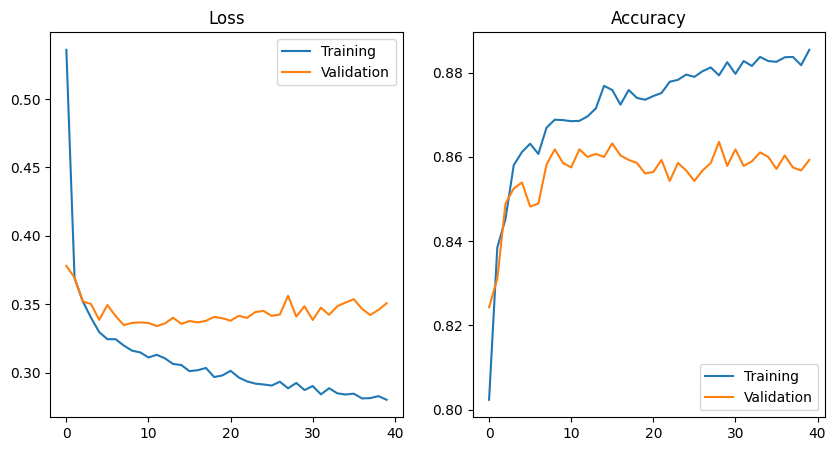

In [265]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].set(title='Loss')
ax[0].plot(historyLSTM.history['loss'], label='Training')
ax[0].plot(historyLSTM.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(historyLSTM.history['accuracy'], label='Training')
ax[1].plot(historyLSTM.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [266]:
lossLSTM = historyLSTM.history["loss"]
accLSTM = historyLSTM.history["accuracy"]
valLossLSTM = historyLSTM.history["val_loss"]
valAccLSTM = historyLSTM.history["val_accuracy"]
valLSTM = max(valAccLSTM)
loss, accuracy, f1scoreLSTM, precisionLSTM, recallLSTM = modelLSTM.evaluate(xDeepVal_seq, yDeepVal, verbose=0)
errLSTM = 1 - valLSTM
algo = "Keras scaled: LSTM"

In [267]:
cocurricularClassification.loc[len(cocurricularClassification.index)] = ['Imbalanced', algo, 'allActivities', 'binlabelRFMTO', valLSTM, errLSTM, precisionLSTM, recallLSTM, f1scoreLSTM, '-']
cocurricularClassification

Data                                    Algorithm  \
0              Imbalanced                Univariate LogisticRegression   
1              Imbalanced               Multinomial LogisticRegression   
2              Imbalanced                      Univariate DecisionTree   
3              Imbalanced                      Univariate DecisionTree   
4              Imbalanced                      Univariate DecisionTree   
5              Imbalanced                      Univariate DecisionTree   
6              Imbalanced                           TFIDF DecisionTree   
7              Imbalanced                TFIDF Multinomial Naive Bayes   
8              Imbalanced                          TFIDF Random Forest   
9              Imbalanced                                TFIDF XGBoost   
10   Oversampled Balanced                          TFIDF Random Forest   
11  Undersampled Balanced                          TFIDF Random Forest   
12             Imbalanced       Keras baseline: Softplus, Softmax, SGD   
13             Imbalanced            Keras scaled: relu, relu, softmax   
14             Imbalanced            Keras scaled: selu, selu, softmax   
15             Imbalanced            Keras scaled: relu, relu, softmax   
16             Imbalanced            Keras scaled: selu, selu, softmax   
17             Imbalanced            Keras scaled: relu, relu, softmax   
18             Imbalanced            Keras scaled: selu, selu, softmax   
19             Imbalanced            Keras scaled: tanh, selu, softmax   
20             Imbalanced            Keras scaled: selu, tanh, softmax   
21             Imbalanced            Keras scaled: tanh, tanh, softmax   
22             Imbalanced  Keras: Catgorical Embedding + Concatenation   
23             Imbalanced  Keras: Catgorical Embedding + Concatenation   
24             Imbalanced                           Keras scaled: LSTM   

          Co-Curricular          Label  Prediction Accuracy     Error  \
0           allAnalyzed    binaryRFMTO             0.813929  0.186071   
1           allAnalyzed     multiRFMTO             0.771786  0.228214   
2    categoriesAnalysed  binlabelRFMTO             0.698929  0.301071   
3   departmentsAnalysed  binlabelRFMTO             0.726071  0.273929   
4    activitiesAnalysed  binlabelRFMTO             0.724286  0.275714   
5           allAnalyzed  binlabelRFMTO             0.710000  0.290000   
6           allAnalyzed  binlabelRFMTO             0.846786  0.153214   
7         allActivities  binlabelRFMTO             0.852143  0.147857   
8         allActivities  binlabelRFMTO             0.875000  0.125000   
9         allActivities  binlabelRFMTO             0.876786  0.123214   
10        allActivities  binlabelRFMTO             0.870357  0.129643   
11        allActivities  binlabelRFMTO             0.870357  0.129643   
12        allActivities  binlabelRFMTO             0.727857  0.272143   
13        allActivities  binlabelRFMTO             0.735714  0.264286   
14        allActivities  binlabelRFMTO             0.705714  0.294286   
15        allActivities  binlabelRFMTO             0.750357  0.249643   
16        allActivities  binlabelRFMTO             0.743571  0.256429   
17        allActivities  binlabelRFMTO             0.755357  0.244643   
18        allActivities  binlabelRFMTO             0.766786  0.233214   
19        allActivities  binlabelRFMTO             0.766786  0.233214   
20        allActivities  binlabelRFMTO             0.766786  0.233214   
21        allActivities  binlabelRFMTO             0.766786  0.233214   
22        allActivities  binlabelRFMTO             0.742857  0.257143   
23        allActivities  binlabelRFMTO             0.742504  0.257496   
24        allActivities  binlabelRFMTO             0.863571  0.136429   

   Weighted Precision Weighted Recall Weighted f1-Score Mean Absolute Error  
0            0.828373        0.813929          0.782983            0.186071  
1            0.695876        0.771786    

**Regularisation**

Weight 'regularisation' is typically used for smaller models, while 'dropout' is generally used for larger models.

As this model is sufficiently large, only 'dropout' will be evaluated.

**Dropout**

The model will be evaluated using 'dropout' levels between 0.2 and 0.5.

**Learning Rate**

The model will be evaluated using a range of learning rates.

**Optimizers**

The model will be evaluated using optimizers best suited for multi-class classification, including RMSprop, Adam and Nadam.

In [268]:
outputsLSTM = [8, 64]
dropout1Combined = [0.3, 0.4]
dropout2Combined = [0.3, 0.4]
outputsDense = [64, 128]
lRateCombined = [0.002, 0.003]
batchCombined = [64, 128]

In [269]:
def modelTrainFinal(model, batch_size):

  '''
  Train the model, using training data and training labels.
  Epochs and batch size defined when function is called.
  Validation data and validation labels then used to validate the model.
  Callback defined to print outputs every 20 epochs.
  '''

  return model.fit(partialXtrain, partialYtrain, epochs = 6, batch_size = batch_size, validation_data = (xVal, yVal), verbose = 0, callbacks=[EpochOutput(interval = 1)])

def plotFinal():

  '''
  Create two vertical plots showing the training and validation loss and accuracy.
  A super title details the loss versus accuracy results, and the title shows the batch size.
  '''

  plt.figure(figsize = (4, 3))
  plt.subplot(1, 2, 1)
  plt.plot(range(1, len(lossFinal) + 1), lossFinal, "y.--", label = "Training Loss")
  plt.plot(range(1, len(lossFinal) + 1), valLossFinal, "g.-", label = "Validation Loss")
  plt.title("Training and Validation Loss", fontsize = 6)
  plt.xlabel("Epochs", fontsize = 8)
  plt.xticks(np.arange(1, len(lossFinal) + 2, 2))
  plt.ylabel("Loss", fontsize = 8)
  plt.legend(fontsize = 4)
  plt.tight_layout()

  plt.subplot(1, 2, 2)
  plt.plot(range(1, len(lossFinal) + 1), accFinal, "y.--", label = "Training Accuracy")
  plt.plot(range(1, len(lossFinal) + 1), valAccFinal, "g.-", label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy", fontsize = 6)
  plt.xlabel("Epochs", fontsize = 8)
  plt.xticks(np.arange(1, len(lossFinal) + 2, 2))
  plt.ylabel("Accuracy", fontsize = 8)
  plt.legend(fontsize = 4)

  plt.tight_layout()
  plt.show()


In [270]:
def modelBuildFinal(lstmVal, drop1, drop2, denseVal, lRate):
    input_ = layers.Input(shape = xDeepTrain_seq[0,:].shape, name='input')
    
    # Embedding layer (vocab size plus 1), using the pre-trained emb_matrix obtained from Word2Vec
    
    x = layers.Embedding(vocabLen + 1, emb_size, weights = [emb_matrix], trainable = False, name = 'embedding')(input_)
    x = layers.Bidirectional(layers.LSTM(lstmVal, dropout = drop1), name = 'bidirectional-lstm')(x) # LSTM layer
    x = layers.Dropout(drop2, name = 'dropout')(x)
    x = layers.Dense(denseVal, activation = 'relu', name = 'dense')(x)
    outputBuildFinal = layers.Dense(numCategories, activation = 'softmax', name = 'classification')(x)
    
    modelBuildFinal = models.Model(input_, outputLSTM)
    
    model = modelBuildFinal.compile(optimizer = keras.optimizers.Adam(learning_rate = lRate, beta_1 = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [271]:
# for denseValue in outputsDense:
#     print("Value: ", denseValue)
#     input_ = layers.Input(shape = xDeepTrain_seq[0,:].shape, name='input')
    
#     # Embedding layer (vocab size plus 1), using the pre-trained emb_matrix obtained from Word2Vec
    
#     x = layers.Embedding(vocabLen + 1, emb_size, weights = [emb_matrix], trainable = False, name = 'embedding')(input_)
#     x = layers.Bidirectional(layers.LSTM(64, dropout = 0.2), name = 'bidirectional-lstm')(x) # LSTM layer
#     x = layers.Dropout(0.2, name = 'dropout')(x)
#     x = layers.Dense(denseValue, activation = 'relu', name = 'dense')(x)
#     outputLSTM = layers.Dense(numCategories, activation = 'softmax', name = 'classification')(x)
    
#     modelLSTM = models.Model(input_, outputLSTM)
    
#     modelLSTM.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.002, beta_1 = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])
    
#     modelLSTM.summary()

LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 classification (Dense)      (None, 8)     

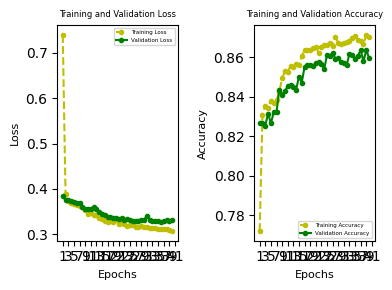



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

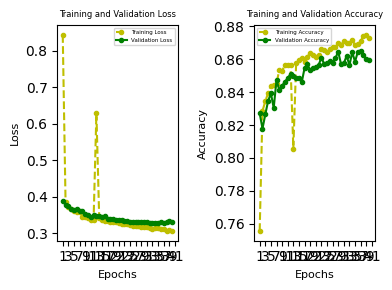



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
          

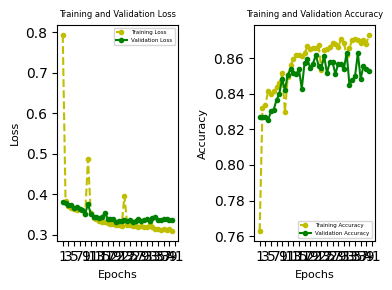



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

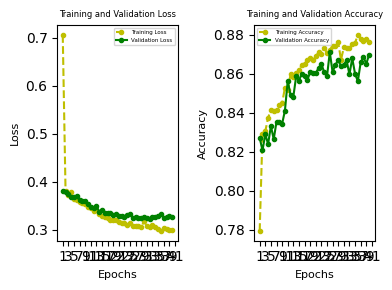



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
         

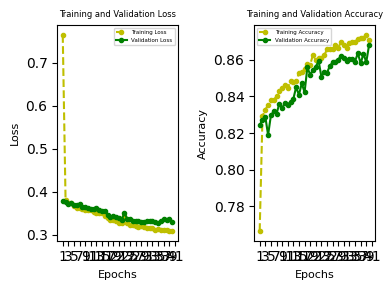



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

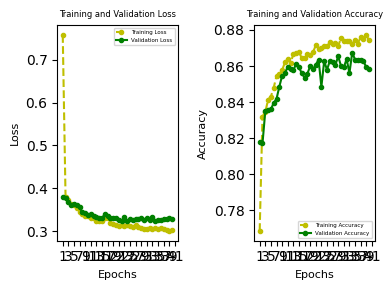



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
         

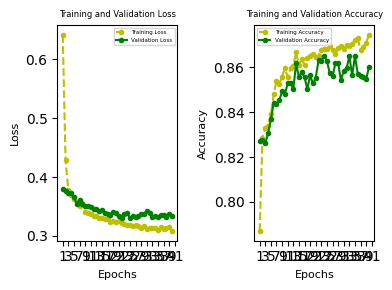



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

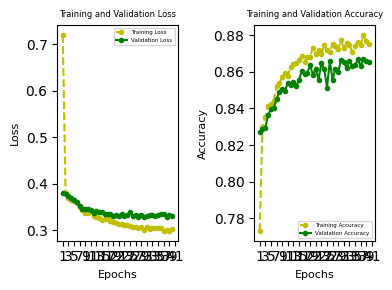



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
          

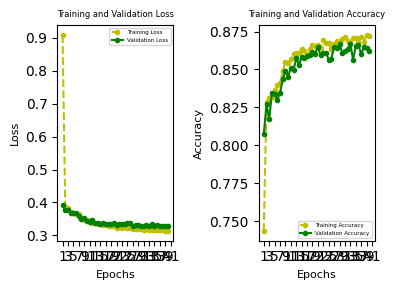



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
        

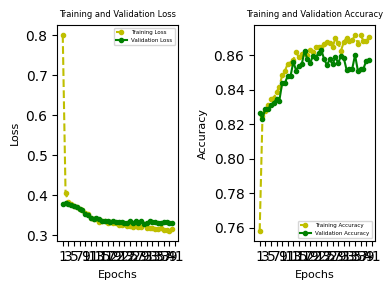



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

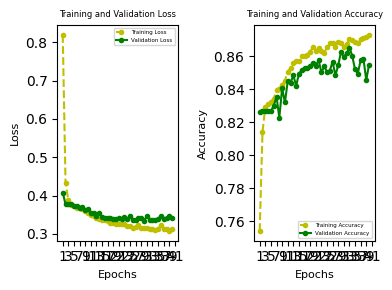



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
        

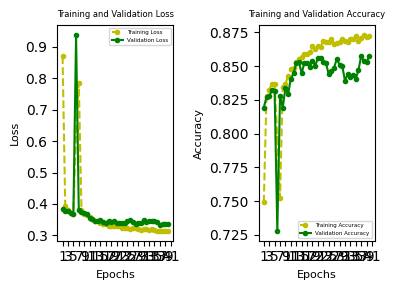



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

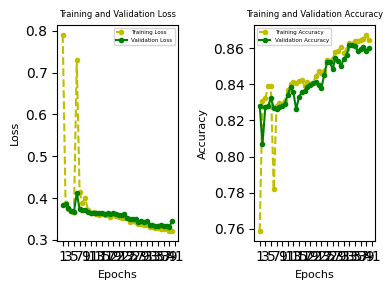



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
       

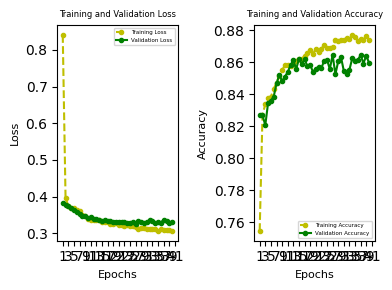



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

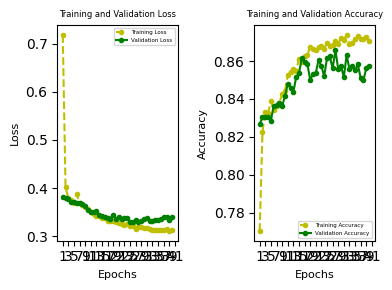



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
       

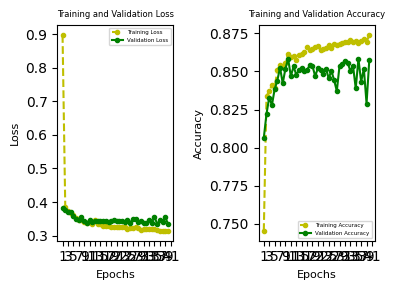



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

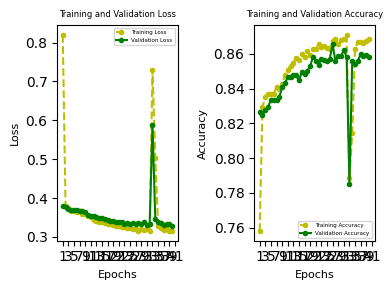



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
        

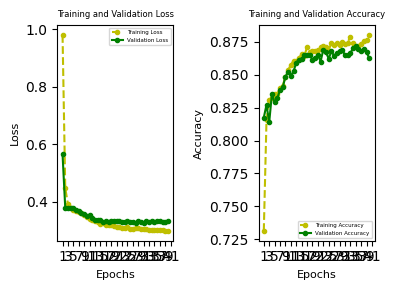



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

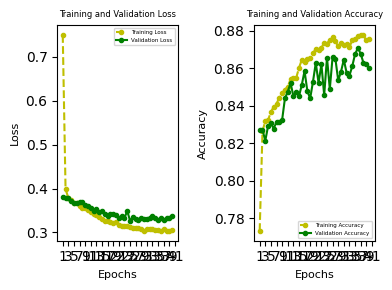



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
        

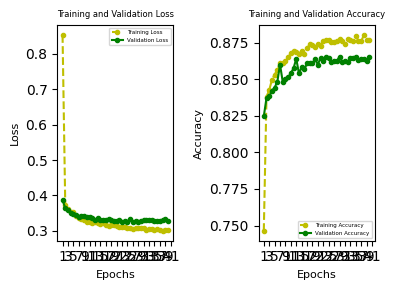



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

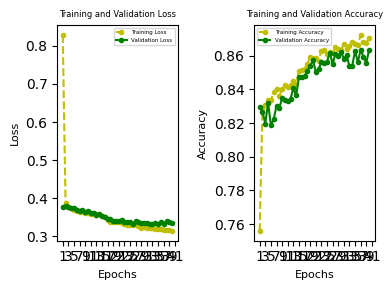



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
       

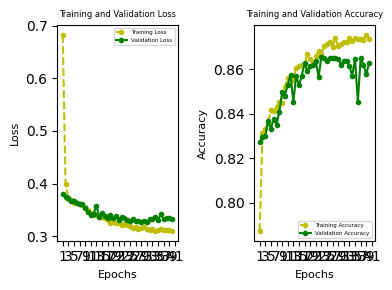



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

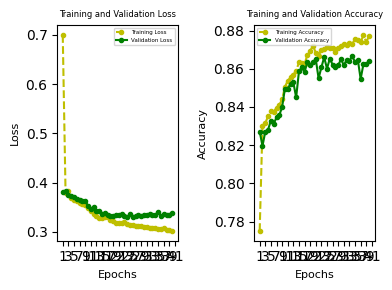



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
       

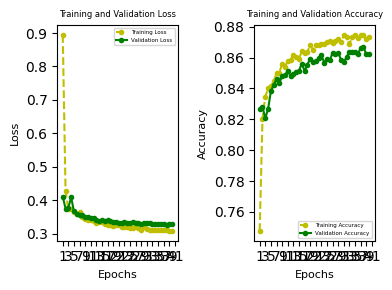



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

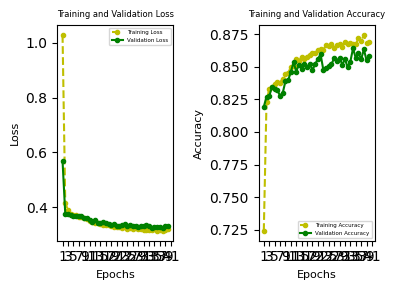



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
        

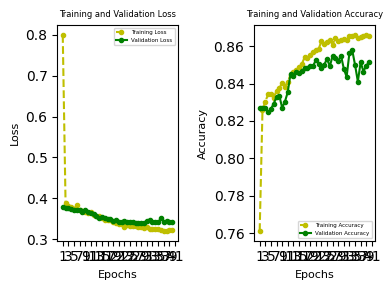



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
         

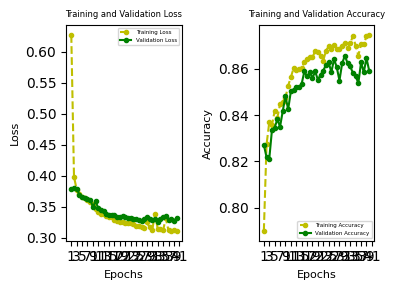



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 64)                1088      
        

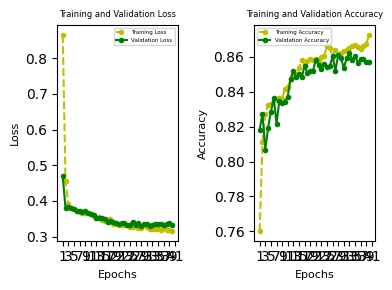



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

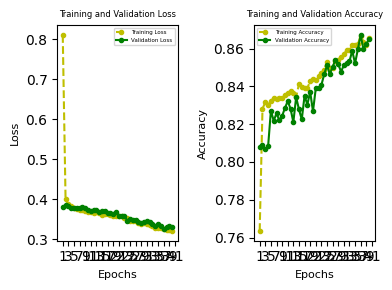



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
       

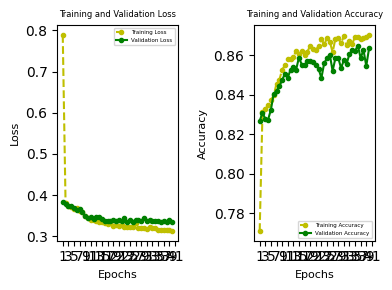



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
        

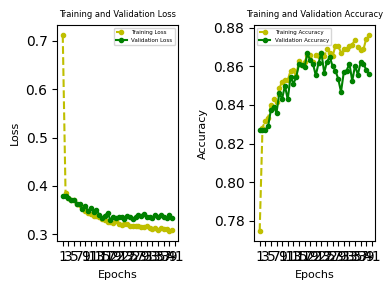



------------------------------------------------------------------------------------------------
LSTM:  8 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 16)                19776     
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
       

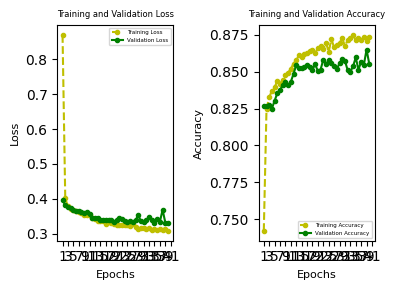



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

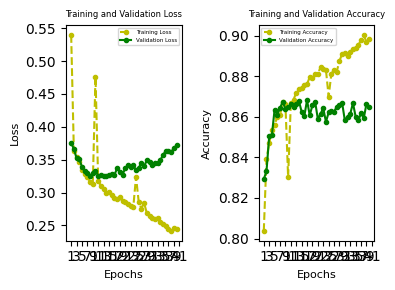



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

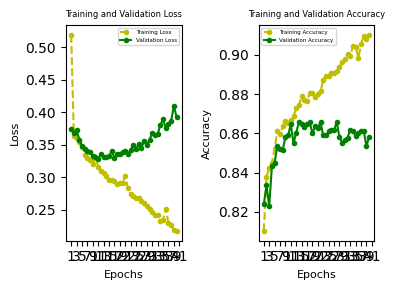



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

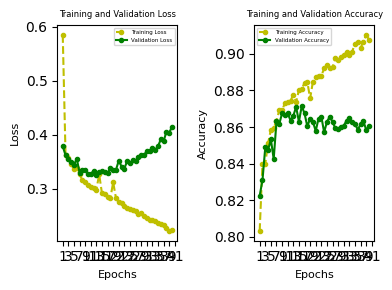



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

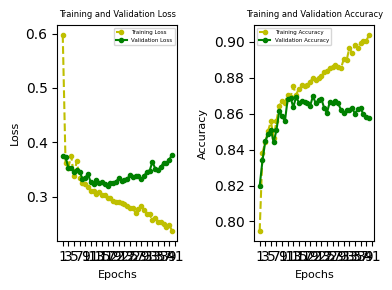



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

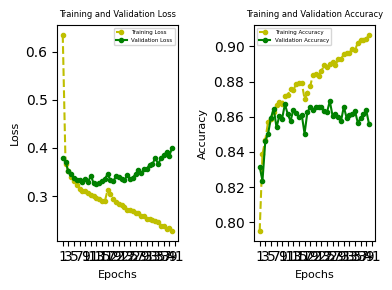



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

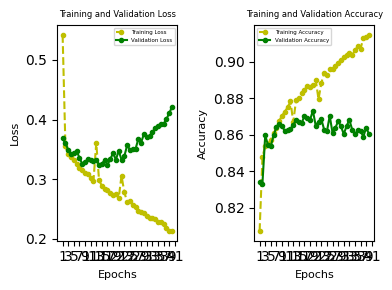



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

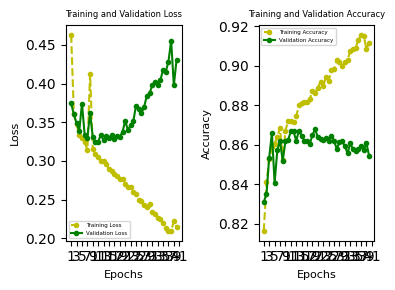



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

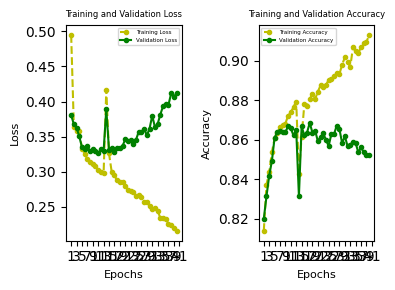



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

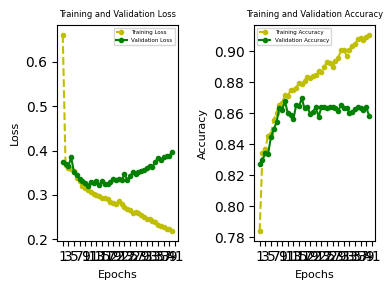



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

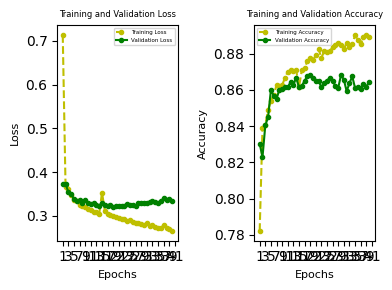



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

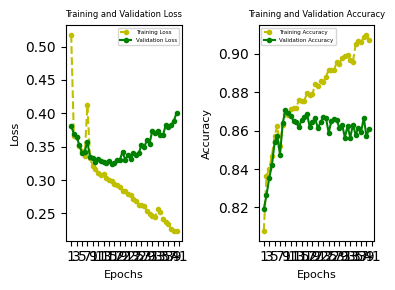



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

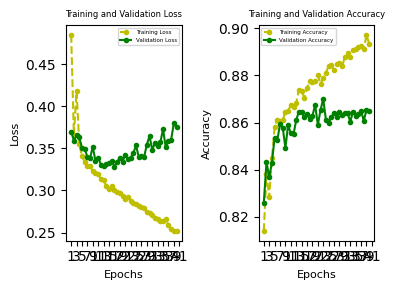



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

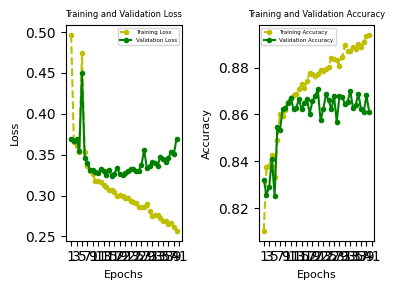



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

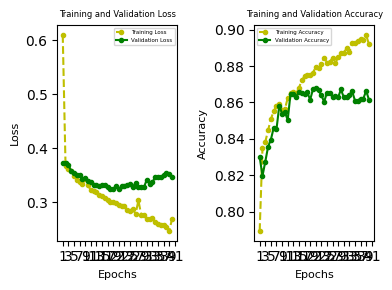



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

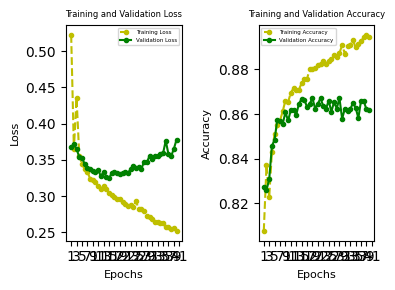



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.3 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

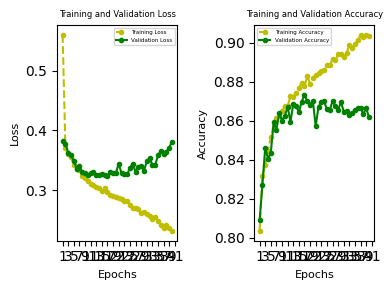



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

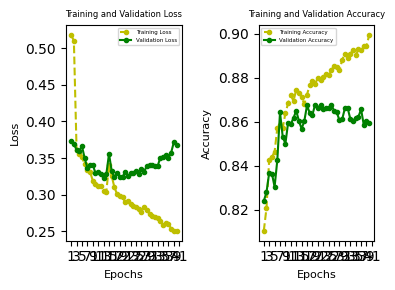



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

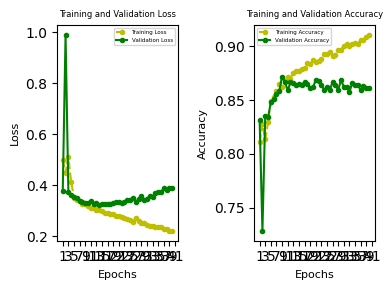



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

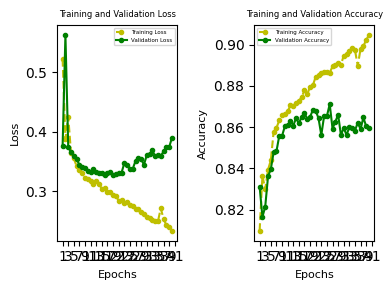



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

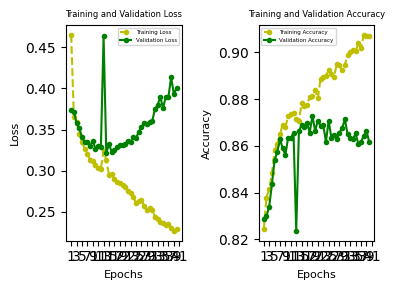



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

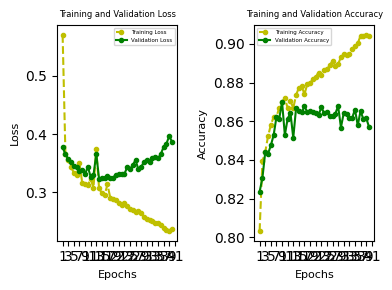



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

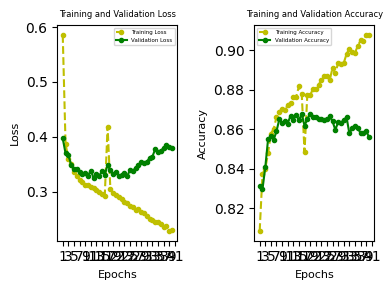



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

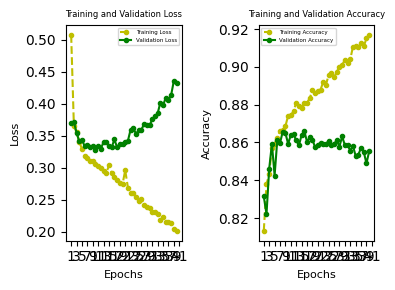



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.3 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

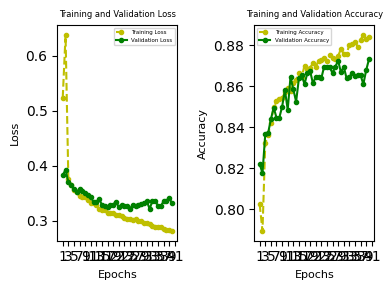



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  64
Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

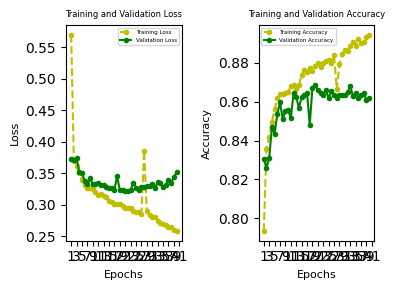



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.002 Batch:  128
Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

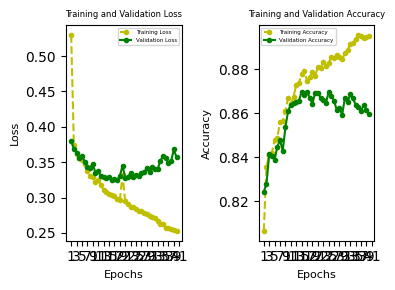



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  64
Model: "model_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
        

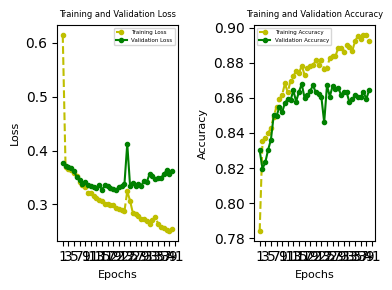



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  64 LearningRate:  0.003 Batch:  128
Model: "model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
       

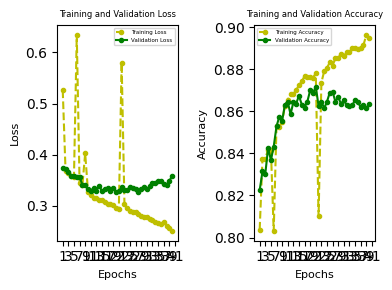



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  64
Model: "model_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

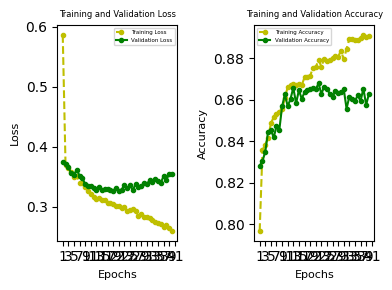



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.002 Batch:  128
Model: "model_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

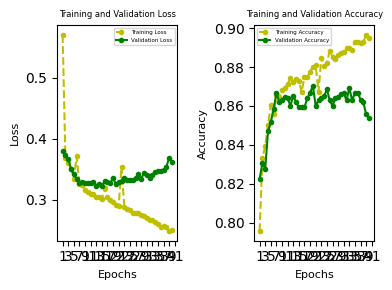



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  64
Model: "model_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
       

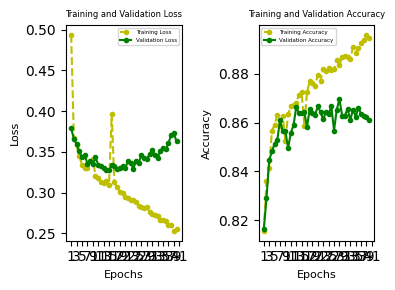



------------------------------------------------------------------------------------------------
LSTM:  64 Dropout1:  0.4 Dropout2:  0.4 Dense:  128 LearningRate:  0.003 Batch:  128
Model: "model_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 146)]             0         
                                                                 
 embedding (Embedding)       (None, 146, 300)          120000    
                                                                 
 bidirectional-lstm (Bidire  (None, 128)               186880    
 ctional)                                                        
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
      

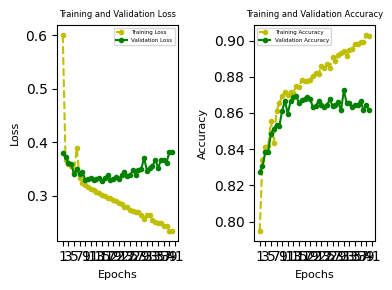



------------------------------------------------------------------------------------------------


In [272]:
# the following code is used to increase the output cell height, and it was found on Stack Overflow

modelFinalResults = []
for valA in outputsLSTM:
    for valB in dropout1Combined:
        for valC in dropout2Combined:
            for valD in outputsDense:
                for valE in lRateCombined:
                    for valF in batchCombined:
                        print("LSTM: ", valA, "Dropout1: ", valB, "Dropout2: ", valC, "Dense: ", valD, "LearningRate: ", valE, "Batch: ", valF)

                        input_ = layers.Input(shape = xDeepTrain_seq[0,:].shape, name='input')
                        
                        # Embedding layer (vocab size plus 1), using the pre-trained emb_matrix obtained from Word2Vec
                        
                        x = layers.Embedding(vocabLen + 1, emb_size, weights = [emb_matrix], trainable = False, name = 'embedding')(input_)
                        x = layers.Bidirectional(layers.LSTM(valA, dropout = valB), name = 'bidirectional-lstm')(x) # LSTM layer
                        x = layers.Dropout(valC, name = 'dropout')(x)
                        x = layers.Dense(valD, activation = 'relu', name = 'dense')(x)
                        outputLSTM = layers.Dense(numCategories, activation = 'softmax', name = 'classification')(x)
                        
                        modelLSTM = models.Model(input_, outputLSTM)
                        
                        modelLSTM.compile(optimizer = keras.optimizers.Adam(learning_rate = valE, beta_1 = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy', f1_m, precision_m, recall_m])
                        
                        modelLSTM.summary()
                        
                        historyFinal = modelLSTM.fit(xDeepTrain_seq, yDeepTrain, batch_size = 64, shuffle=True, epochs = 40, validation_data = (xDeepVal_seq, yDeepVal), verbose = 0, callbacks=[EpochOutput(interval = 10)])

                        lossFinal = historyFinal.history["loss"]
                        accFinal = historyFinal.history["accuracy"]
                        valLossFinal = historyFinal.history["val_loss"]
                        valAccFinal = historyFinal.history["val_accuracy"]
                        valFinal = max(valAccFinal)
                        loss, accuracy, f1scoreFinal, precisionFinal, recallFinal = modelLSTM.evaluate(xDeepVal_seq, yDeepVal, verbose=0)
                        errFinal = 1 - valFinal
                        algo = "Keras scaled: LSTM"
                        
                        rowDict = {'Data':'Imbalanced', 'Algorithm':'Keras scaled: LSTM', 'Co-Curricular':'allActivities', 'Label':'binlabelRFMTO', 'Prediction Accuracy':valFinal, 'Error':errFinal, 'Weighted Precision':precisionFinal, 'Weighted Recall':recallFinal, 'Weighted f1-Score':f1scoreFinal, 'Mean Absolute Error': '-'}
                        modelFinalResults.append(rowDict) # append returned accuracy score from each binary logistic regression model

                        print()
                        plotFinal()
                        print()
                        print()
                        print("------------------------------------------------------------------------------------------------")

In [274]:
len(modelFinalResults)

64